In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [4]:
df_X_0 = []
df_y_0 = []
df_X_1 = []
df_y_1 = []

for line in df:
    num = len(line['chiral_centers'])
    
    if num == 0:
        df_X_0.append(line['xyz'].flatten())
        df_y_0.append(0)
    else:
        df_X_1.append(line['xyz'].flatten())
        df_y_1.append(1)
    
df_X_0 = np.array(df_X_0)
df_y_0 = np.array(df_y_0)
df_X_1 = np.array(df_X_1)
df_y_1 = np.array(df_y_1)

idx_0 = np.random.choice(np.arange(len(df_y_0)), 36000, replace=False)
df_X_0 = df_X_0[idx_0]
df_y_0 = df_y_0[idx_0]

idx_1 = np.random.choice(np.arange(len(df_y_1)), 36000, replace=False)
df_X_1 = df_X_1[idx_1]
df_y_1 = df_y_1[idx_1]

df_X = np.concatenate((df_X_0, df_X_1), axis=0)
df_y = np.concatenate((df_y_0, df_y_1), axis=0)

In [5]:
print(len(df_X), len(df_y))

72000 72000


In [6]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_X, df_y, test_size = 0.2)

X_train = torch.from_numpy(X_train_raw).type('torch.FloatTensor')
X_train = X_train.to(device)

y_train = torch.from_numpy(y_train_raw).type('torch.LongTensor')
y_train = y_train.to(device)

X_test = torch.from_numpy(X_test_raw).type('torch.FloatTensor')
X_test = X_test.to(device)

y_test = torch.from_numpy(y_test_raw).type('torch.LongTensor')
y_test = y_test.to(device)

In [7]:
import torch.nn as nn

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden1 = nn.Linear(27*8,500)
        self.hidden2 = nn.Linear(500, 200)
        self.output = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.05)
        self.Tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.hidden2(x)
        x = self.dropout(x)
        x = self.Tanh(x)

        x = self.output(x)
        x = self.softmax(x)
        return x
    
    def predict(self,x):
        y_pred = self.forward(x).cpu().detach().numpy()
        y_pred = [np.argmax(sample) for sample in y_pred]
        
        return y_pred
    

net = Net()
net.to(device)

Net(
  (hidden1): Linear(in_features=216, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=2, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (Tanh): Tanh()
  (softmax): Softmax(dim=1)
)

In [8]:
net = Net()
net.to(device)
net.load_state_dict(torch.load('torch_has_chiral_dict.dict'))

<All keys matched successfully>

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0005)
epochs = 200
losses = []
train_accuracies = []
test_accuracies = []
f1s = []

epoch: 0
train_acc: 0.5904861111111112
test_acc: 0.5940972222222223
f1: 0.5937234656321474

epoch: 1
train_acc: 0.6334375
test_acc: 0.6321527777777778
f1: 0.6287789427082755

epoch: 2
train_acc: 0.6423958333333334
test_acc: 0.6415277777777778
f1: 0.6399546747996238

epoch: 3
train_acc: 0.6494791666666667
test_acc: 0.6488888888888888
f1: 0.6482786422720415

epoch: 4
train_acc: 0.6570486111111111
test_acc: 0.6547916666666667
f1: 0.6542895341487192

epoch: 5
train_acc: 0.6641145833333333
test_acc: 0.6616666666666666
f1: 0.6610264361762693

epoch: 6
train_acc: 0.6718923611111111
test_acc: 0.670625
f1: 0.6697556375118981

epoch: 7
train_acc: 0.6782291666666667
test_acc: 0.6757638888888889
f1: 0.6744671813125309

epoch: 8
train_acc: 0.6844097222222222
test_acc: 0.6797222222222222
f1: 0.6783226558908921

epoch: 9
train_acc: 0.6888020833333334
test_acc: 0.6872916666666666
f1: 0.6859908256690238

epoch: 10
train_acc: 0.6922395833333334
test_acc: 0.6920833333333334
f1: 0.6910223249243203

epoch:

epoch: 91
train_acc: 0.8190277777777778
test_acc: 0.8136805555555555
f1: 0.813679364985493

epoch: 92
train_acc: 0.8201736111111111
test_acc: 0.8147222222222222
f1: 0.814715159739832

epoch: 93
train_acc: 0.8205034722222222
test_acc: 0.8120138888888889
f1: 0.8120129560275862

epoch: 94
train_acc: 0.82171875
test_acc: 0.8155555555555556
f1: 0.8155557156636575

epoch: 95
train_acc: 0.8207118055555556
test_acc: 0.8159027777777778
f1: 0.8158781887539572

epoch: 96
train_acc: 0.8222222222222222
test_acc: 0.8138194444444444
f1: 0.8138194184064615

epoch: 97
train_acc: 0.8223090277777778
test_acc: 0.8170833333333334
f1: 0.8170833333333334

epoch: 98
train_acc: 0.8229861111111111
test_acc: 0.8172222222222222
f1: 0.8171912364416531

epoch: 99
train_acc: 0.8233854166666666
test_acc: 0.8153472222222222
f1: 0.8153473531250774

epoch: 100
train_acc: 0.825
test_acc: 0.8164583333333333
f1: 0.8164562045687568

epoch: 101
train_acc: 0.8246354166666666
test_acc: 0.8179861111111111
f1: 0.8179832276163962

epoch: 181
train_acc: 0.8532638888888889
test_acc: 0.8375694444444445
f1: 0.8375466889742859

epoch: 182
train_acc: 0.8528993055555556
test_acc: 0.8364583333333333
f1: 0.8363935014408223

epoch: 183
train_acc: 0.8522743055555555
test_acc: 0.835625
f1: 0.8355372022882444

epoch: 184
train_acc: 0.8543923611111112
test_acc: 0.840625
f1: 0.8405909258330471

epoch: 185
train_acc: 0.8540277777777778
test_acc: 0.8377083333333334
f1: 0.8377017173382101

epoch: 186
train_acc: 0.8545833333333334
test_acc: 0.8346527777777778
f1: 0.8346167482318868

epoch: 187
train_acc: 0.8543055555555555
test_acc: 0.8361805555555556
f1: 0.8361506650028535

epoch: 188
train_acc: 0.8546180555555556
test_acc: 0.8361805555555556
f1: 0.8361581428958371

epoch: 189
train_acc: 0.8571701388888889
test_acc: 0.8385416666666666
f1: 0.8385318760921239

epoch: 190
train_acc: 0.8552256944444444
test_acc: 0.8378472222222222
f1: 0.8378206082412498

epoch: 191
train_acc: 0.8562673611111111
test_acc: 0.8389583333333334
f1: 0.8389

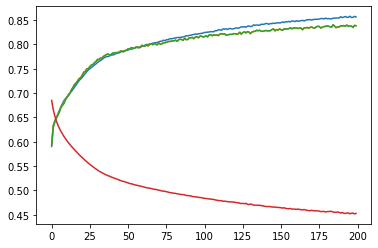

epoch: 0
train_acc: 0.8582986111111112
test_acc: 0.8361805555555556
f1: 0.8361679668909935

epoch: 1
train_acc: 0.8573958333333334
test_acc: 0.8420833333333333
f1: 0.8420781088034833

epoch: 2
train_acc: 0.85796875
test_acc: 0.8406944444444444
f1: 0.8406674378408633

epoch: 3
train_acc: 0.8593229166666667
test_acc: 0.8382638888888889
f1: 0.8382476407589345

epoch: 4
train_acc: 0.8590277777777777
test_acc: 0.8442361111111111
f1: 0.8442320328199414

epoch: 5
train_acc: 0.8598263888888888
test_acc: 0.8402083333333333
f1: 0.8402003087664565

epoch: 6
train_acc: 0.8587847222222222
test_acc: 0.8403472222222222
f1: 0.8403392044071623

epoch: 7
train_acc: 0.8596875
test_acc: 0.8402083333333333
f1: 0.8402056168937838

epoch: 8
train_acc: 0.8600694444444444
test_acc: 0.8388888888888889
f1: 0.8388696431371532

epoch: 9
train_acc: 0.8608506944444444
test_acc: 0.8396527777777778
f1: 0.8396275913145884

epoch: 10
train_acc: 0.8603819444444445
test_acc: 0.8404166666666667
f1: 0.8404111253114701

epoc

epoch: 91
train_acc: 0.8727430555555555
test_acc: 0.8452083333333333
f1: 0.8452047165442903

epoch: 92
train_acc: 0.8735069444444444
test_acc: 0.8481944444444445
f1: 0.8481739222324033

epoch: 93
train_acc: 0.8730729166666666
test_acc: 0.8490972222222222
f1: 0.8490966655008084

epoch: 94
train_acc: 0.8744965277777778
test_acc: 0.8488194444444445
f1: 0.848818110963939

epoch: 95
train_acc: 0.8734027777777778
test_acc: 0.8509722222222222
f1: 0.8509590687486184

epoch: 96
train_acc: 0.8730381944444444
test_acc: 0.85
f1: 0.8499998524297327

epoch: 97
train_acc: 0.8737673611111111
test_acc: 0.8467361111111111
f1: 0.8467362493267128

epoch: 98
train_acc: 0.8731423611111111
test_acc: 0.8469444444444445
f1: 0.8469324946745347

epoch: 99
train_acc: 0.8729166666666667
test_acc: 0.8480555555555556
f1: 0.8480555936589085

epoch: 100
train_acc: 0.8741666666666666
test_acc: 0.8515277777777778
f1: 0.8515104908418359

epoch: 101
train_acc: 0.8740451388888889
test_acc: 0.8488888888888889
f1: 0.84886381

epoch: 182
train_acc: 0.8838715277777778
test_acc: 0.8527083333333333
f1: 0.8527078751773337

epoch: 183
train_acc: 0.8848958333333333
test_acc: 0.8559027777777778
f1: 0.8559016290814313

epoch: 184
train_acc: 0.8823611111111112
test_acc: 0.8521527777777778
f1: 0.8521135304872544

epoch: 185
train_acc: 0.8837152777777778
test_acc: 0.8531944444444445
f1: 0.8531938582407894

epoch: 186
train_acc: 0.8857465277777777
test_acc: 0.853125
f1: 0.8531235741479524

epoch: 187
train_acc: 0.8841145833333334
test_acc: 0.853125
f1: 0.8530953652792929

epoch: 188
train_acc: 0.8832291666666666
test_acc: 0.8525
f1: 0.8524938539769747

epoch: 189
train_acc: 0.88484375
test_acc: 0.8514583333333333
f1: 0.8514511658267492

epoch: 190
train_acc: 0.8850520833333333
test_acc: 0.8531944444444445
f1: 0.853159050219246

epoch: 191
train_acc: 0.8827083333333333
test_acc: 0.8526388888888888
f1: 0.8526230370591356

epoch: 192
train_acc: 0.8849479166666666
test_acc: 0.8542361111111111
f1: 0.8542152067481048

epoch: 

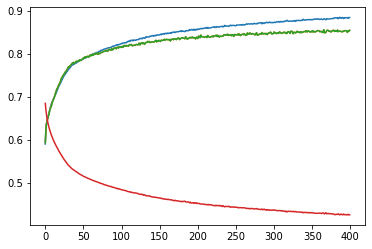

epoch: 0
train_acc: 0.8841840277777778
test_acc: 0.85625
f1: 0.8562384193874

epoch: 1
train_acc: 0.8857291666666667
test_acc: 0.8545833333333334
f1: 0.8545697242102915

epoch: 2
train_acc: 0.8853298611111111
test_acc: 0.8547222222222223
f1: 0.8547039700958071

epoch: 3
train_acc: 0.8840104166666667
test_acc: 0.8570833333333333
f1: 0.8570832919801303

epoch: 4
train_acc: 0.8863020833333334
test_acc: 0.8557638888888889
f1: 0.8557616038396892

epoch: 5
train_acc: 0.8846006944444444
test_acc: 0.8565972222222222
f1: 0.8565955589990477

epoch: 6
train_acc: 0.8880208333333334
test_acc: 0.8567361111111111
f1: 0.856736129765329

epoch: 7
train_acc: 0.8855034722222223
test_acc: 0.8524305555555556
f1: 0.8524103661100695

epoch: 8
train_acc: 0.8871701388888888
test_acc: 0.8549305555555555
f1: 0.8549306919780689

epoch: 9
train_acc: 0.8874305555555555
test_acc: 0.8552777777777778
f1: 0.8552764377339368

epoch: 10
train_acc: 0.8856770833333333
test_acc: 0.8554861111111111
f1: 0.8554681801266972

ep

epoch: 91
train_acc: 0.89359375
test_acc: 0.8579861111111111
f1: 0.8579850940809876

epoch: 92
train_acc: 0.89390625
test_acc: 0.8584027777777777
f1: 0.8584026651063633

epoch: 93
train_acc: 0.8931770833333333
test_acc: 0.8585416666666666
f1: 0.8585262438005761

epoch: 94
train_acc: 0.8945659722222222
test_acc: 0.8563194444444444
f1: 0.8563176338473214

epoch: 95
train_acc: 0.8937326388888889
test_acc: 0.8585416666666666
f1: 0.858540653603928

epoch: 96
train_acc: 0.8945659722222222
test_acc: 0.8588888888888889
f1: 0.8588634051768551

epoch: 97
train_acc: 0.8928819444444445
test_acc: 0.860625
f1: 0.8606247761772129

epoch: 98
train_acc: 0.8932118055555556
test_acc: 0.8569444444444444
f1: 0.8569371173224206

epoch: 99
train_acc: 0.8937847222222223
test_acc: 0.8569444444444444
f1: 0.8569129775795388

epoch: 100
train_acc: 0.8930555555555556
test_acc: 0.8584027777777777
f1: 0.8584026104777795

epoch: 101
train_acc: 0.8935416666666667
test_acc: 0.8593055555555555
f1: 0.8593051565922208

ep

epoch: 183
train_acc: 0.8984375
test_acc: 0.8620833333333333
f1: 0.8620028656773878

epoch: 184
train_acc: 0.8998958333333333
test_acc: 0.8623611111111111
f1: 0.8623610261488275

epoch: 185
train_acc: 0.8990451388888889
test_acc: 0.8649305555555555
f1: 0.8649261957921079

epoch: 186
train_acc: 0.8977777777777778
test_acc: 0.8595138888888889
f1: 0.8594699519993515

epoch: 187
train_acc: 0.8993923611111111
test_acc: 0.8579861111111111
f1: 0.8579858830505234

epoch: 188
train_acc: 0.8996875
test_acc: 0.8640277777777777
f1: 0.864013150473281

epoch: 189
train_acc: 0.89859375
test_acc: 0.8608333333333333
f1: 0.860792173729939

epoch: 190
train_acc: 0.8978645833333333
test_acc: 0.8625694444444445
f1: 0.8625567681450512

epoch: 191
train_acc: 0.9007465277777778
test_acc: 0.8610416666666667
f1: 0.8610152543816358

epoch: 192
train_acc: 0.9004340277777778
test_acc: 0.8610416666666667
f1: 0.8609534350643273

epoch: 193
train_acc: 0.89875
test_acc: 0.8653472222222223
f1: 0.865325121790057

epoch:

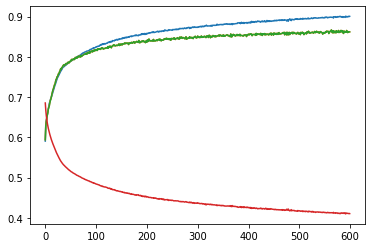

epoch: 0
train_acc: 0.90140625
test_acc: 0.8627083333333333
f1: 0.8627005962086228

epoch: 1
train_acc: 0.9010416666666666
test_acc: 0.8628472222222222
f1: 0.8628095590631938

epoch: 2
train_acc: 0.9003993055555556
test_acc: 0.8622222222222222
f1: 0.8622202687591021

epoch: 3
train_acc: 0.9003472222222222
test_acc: 0.8608333333333333
f1: 0.8608316500900259

epoch: 4
train_acc: 0.9001041666666667
test_acc: 0.8623611111111111
f1: 0.8623279269321408

epoch: 5
train_acc: 0.9015972222222223
test_acc: 0.8633333333333333
f1: 0.8633315405978833

epoch: 6
train_acc: 0.9029861111111112
test_acc: 0.8632638888888889
f1: 0.8632618756486499

epoch: 7
train_acc: 0.9018229166666667
test_acc: 0.8609722222222222
f1: 0.8609290829229181

epoch: 8
train_acc: 0.9016666666666666
test_acc: 0.8641666666666666
f1: 0.8641597094575995

epoch: 9
train_acc: 0.9009548611111111
test_acc: 0.8642361111111111
f1: 0.8642357621421115

epoch: 10
train_acc: 0.9006423611111111
test_acc: 0.8622916666666667
f1: 0.8622622231266

epoch: 90
train_acc: 0.9040277777777778
test_acc: 0.8640972222222222
f1: 0.8640540471815048

epoch: 91
train_acc: 0.90546875
test_acc: 0.863125
f1: 0.8631232751633979

epoch: 92
train_acc: 0.9073611111111111
test_acc: 0.8675
f1: 0.8674985277486962

epoch: 93
train_acc: 0.9052256944444445
test_acc: 0.8602083333333334
f1: 0.8601822968036394

epoch: 94
train_acc: 0.9058854166666667
test_acc: 0.8681944444444445
f1: 0.8681931045155281

epoch: 95
train_acc: 0.9057465277777778
test_acc: 0.8627083333333333
f1: 0.86270433081239

epoch: 96
train_acc: 0.9047395833333334
test_acc: 0.8654166666666666
f1: 0.8653179984041965

epoch: 97
train_acc: 0.9062152777777778
test_acc: 0.866875
f1: 0.8668751097819438

epoch: 98
train_acc: 0.9054861111111111
test_acc: 0.8690277777777777
f1: 0.8690256277295816

epoch: 99
train_acc: 0.9063368055555555
test_acc: 0.8620833333333333
f1: 0.8620552326385339

epoch: 100
train_acc: 0.9062673611111111
test_acc: 0.8646527777777778
f1: 0.8646439699497462

epoch: 101
train_a

epoch: 180
train_acc: 0.9112326388888888
test_acc: 0.8655555555555555
f1: 0.8655526845133831

epoch: 181
train_acc: 0.9094270833333333
test_acc: 0.8673611111111111
f1: 0.8673391027290073

epoch: 182
train_acc: 0.9099479166666666
test_acc: 0.8641666666666666
f1: 0.8641576732412161

epoch: 183
train_acc: 0.9096875
test_acc: 0.8677083333333333
f1: 0.8677000204163761

epoch: 184
train_acc: 0.9105902777777778
test_acc: 0.8674305555555556
f1: 0.8674161018239076

epoch: 185
train_acc: 0.9111458333333333
test_acc: 0.8688888888888889
f1: 0.8688890027007952

epoch: 186
train_acc: 0.9106076388888888
test_acc: 0.8713888888888889
f1: 0.8713757879916587

epoch: 187
train_acc: 0.9107638888888889
test_acc: 0.8652083333333334
f1: 0.8651847419605883

epoch: 188
train_acc: 0.9099305555555556
test_acc: 0.8672916666666667
f1: 0.86728838147791

epoch: 189
train_acc: 0.9109201388888889
test_acc: 0.8697916666666666
f1: 0.8697825953669974

epoch: 190
train_acc: 0.9109201388888889
test_acc: 0.8675
f1: 0.8674926

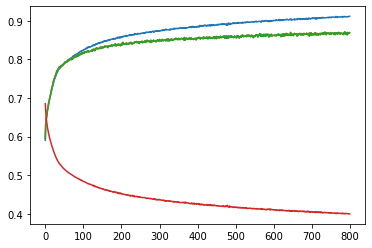

epoch: 0
train_acc: 0.9111805555555555
test_acc: 0.8686111111111111
f1: 0.8686018035679384

epoch: 1
train_acc: 0.911875
test_acc: 0.8686111111111111
f1: 0.8686105028224593

epoch: 2
train_acc: 0.91046875
test_acc: 0.8704166666666666
f1: 0.8703831436936911

epoch: 3
train_acc: 0.9121875
test_acc: 0.8665277777777778
f1: 0.866518005910355

epoch: 4
train_acc: 0.9114756944444444
test_acc: 0.8682638888888888
f1: 0.8682613292271926

epoch: 5
train_acc: 0.9118576388888889
test_acc: 0.866875
f1: 0.8668390544452599

epoch: 6
train_acc: 0.9115277777777778
test_acc: 0.8672916666666667
f1: 0.8672558336175753

epoch: 7
train_acc: 0.9109548611111111
test_acc: 0.8659722222222223
f1: 0.8659713147395184

epoch: 8
train_acc: 0.9104166666666667
test_acc: 0.864375
f1: 0.8643645779305257

epoch: 9
train_acc: 0.9105729166666666
test_acc: 0.8663888888888889
f1: 0.8663506412555517

epoch: 10
train_acc: 0.9098090277777777
test_acc: 0.8657638888888889
f1: 0.8657568783714249

epoch: 11
train_acc: 0.91078125
tes

epoch: 91
train_acc: 0.91421875
test_acc: 0.86875
f1: 0.8686968686815976

epoch: 92
train_acc: 0.9151215277777778
test_acc: 0.8692361111111111
f1: 0.8692281817984814

epoch: 93
train_acc: 0.9138368055555556
test_acc: 0.8715277777777778
f1: 0.8715243205618752

epoch: 94
train_acc: 0.9155902777777778
test_acc: 0.8713888888888889
f1: 0.8713550390426159

epoch: 95
train_acc: 0.9155034722222222
test_acc: 0.8730555555555556
f1: 0.87303215254273

epoch: 96
train_acc: 0.9144791666666666
test_acc: 0.8724305555555556
f1: 0.872430404829662

epoch: 97
train_acc: 0.9160069444444444
test_acc: 0.8684722222222222
f1: 0.8684595550977343

epoch: 98
train_acc: 0.9127777777777778
test_acc: 0.8708333333333333
f1: 0.8707553438706679

epoch: 99
train_acc: 0.9153645833333334
test_acc: 0.8707638888888889
f1: 0.8707606897179077

epoch: 100
train_acc: 0.9153819444444444
test_acc: 0.8670833333333333
f1: 0.8670827179715578

epoch: 101
train_acc: 0.9153993055555556
test_acc: 0.8674305555555556
f1: 0.867350964108873

epoch: 180
train_acc: 0.9197916666666667
test_acc: 0.8715277777777778
f1: 0.8715253614179793

epoch: 181
train_acc: 0.9201736111111111
test_acc: 0.8724305555555556
f1: 0.8724113989276292

epoch: 182
train_acc: 0.91890625
test_acc: 0.8710416666666667
f1: 0.8710343991701631

epoch: 183
train_acc: 0.9192534722222222
test_acc: 0.8711805555555555
f1: 0.8711668835111518

epoch: 184
train_acc: 0.9200173611111111
test_acc: 0.8698611111111111
f1: 0.8698340752599268

epoch: 185
train_acc: 0.9190104166666667
test_acc: 0.8700694444444445
f1: 0.8700588131973526

epoch: 186
train_acc: 0.9189583333333333
test_acc: 0.8752777777777778
f1: 0.8752778571728962

epoch: 187
train_acc: 0.9187673611111111
test_acc: 0.8740972222222222
f1: 0.8740770039263484

epoch: 188
train_acc: 0.9191666666666667
test_acc: 0.8728472222222222
f1: 0.8728240206602141

epoch: 189
train_acc: 0.9186631944444444
test_acc: 0.8733333333333333
f1: 0.8733332551440268

epoch: 190
train_acc: 0.9184375
test_acc: 0.8741666666666666
f1: 0.8

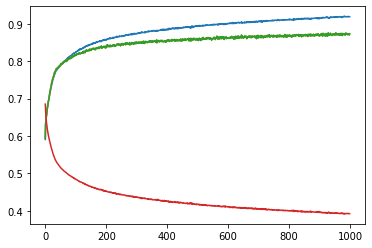

epoch: 0
train_acc: 0.9197395833333334
test_acc: 0.8725
f1: 0.8725001180556378

epoch: 1
train_acc: 0.9184548611111111
test_acc: 0.8684027777777777
f1: 0.8683562759661877

epoch: 2
train_acc: 0.9194270833333333
test_acc: 0.8740972222222222
f1: 0.8740913899949254

epoch: 3
train_acc: 0.9189756944444445
test_acc: 0.8740972222222222
f1: 0.8740965100028413

epoch: 4
train_acc: 0.9198958333333334
test_acc: 0.8711111111111111
f1: 0.8710838150685569

epoch: 5
train_acc: 0.9194097222222222
test_acc: 0.8720833333333333
f1: 0.8720684397243507

epoch: 6
train_acc: 0.92
test_acc: 0.8718055555555555
f1: 0.8718053206312096

epoch: 7
train_acc: 0.9194965277777778
test_acc: 0.8742361111111111
f1: 0.874215468572337

epoch: 8
train_acc: 0.9199826388888889
test_acc: 0.8725694444444444
f1: 0.8725338607661217

epoch: 9
train_acc: 0.9199479166666666
test_acc: 0.8697916666666666
f1: 0.8697909300911899

epoch: 10
train_acc: 0.9189756944444445
test_acc: 0.8722916666666667
f1: 0.8722844696143943

epoch: 11
trai

epoch: 92
train_acc: 0.9229166666666667
test_acc: 0.875
f1: 0.8749792591163419

epoch: 93
train_acc: 0.92328125
test_acc: 0.87375
f1: 0.8737480711323338

epoch: 94
train_acc: 0.9247916666666667
test_acc: 0.8733333333333333
f1: 0.8733243603107397

epoch: 95
train_acc: 0.9228819444444445
test_acc: 0.8754166666666666
f1: 0.8754127444244434

epoch: 96
train_acc: 0.9223784722222222
test_acc: 0.8733333333333333
f1: 0.8733234438685804

epoch: 97
train_acc: 0.9232118055555556
test_acc: 0.8711805555555555
f1: 0.8711589491152416

epoch: 98
train_acc: 0.9225520833333334
test_acc: 0.8753472222222223
f1: 0.8753435881680525

epoch: 99
train_acc: 0.9231423611111111
test_acc: 0.8728472222222222
f1: 0.8728442511734463

epoch: 100
train_acc: 0.9240277777777778
test_acc: 0.8729861111111111
f1: 0.8729506437826902

epoch: 101
train_acc: 0.9236458333333334
test_acc: 0.8760416666666667
f1: 0.8760302325868762

epoch: 102
train_acc: 0.9240451388888888
test_acc: 0.8747916666666666
f1: 0.8747915670356698

epoch:

epoch: 184
train_acc: 0.9264409722222222
test_acc: 0.8778472222222222
f1: 0.8778449995389234

epoch: 185
train_acc: 0.9274652777777778
test_acc: 0.8745833333333334
f1: 0.8745572785055646

epoch: 186
train_acc: 0.9266319444444444
test_acc: 0.8779166666666667
f1: 0.8779013285986755

epoch: 187
train_acc: 0.9265798611111111
test_acc: 0.8759027777777778
f1: 0.8758919869387207

epoch: 188
train_acc: 0.9268229166666667
test_acc: 0.8766666666666667
f1: 0.8766605947705918

epoch: 189
train_acc: 0.9273784722222222
test_acc: 0.8784722222222222
f1: 0.8784694652482644

epoch: 190
train_acc: 0.9265104166666667
test_acc: 0.8739583333333333
f1: 0.8739453160318778

epoch: 191
train_acc: 0.9268055555555555
test_acc: 0.8740277777777777
f1: 0.87400821013748

epoch: 192
train_acc: 0.9272222222222222
test_acc: 0.8767361111111112
f1: 0.876731932567376

epoch: 193
train_acc: 0.9261111111111111
test_acc: 0.8759027777777778
f1: 0.8759013384456954

epoch: 194
train_acc: 0.9269618055555555
test_acc: 0.8752083333

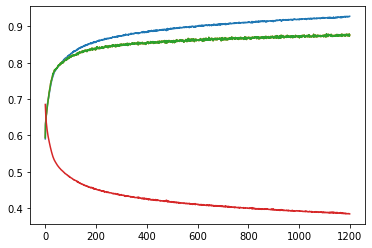

epoch: 0
train_acc: 0.9261805555555556
test_acc: 0.8776388888888889
f1: 0.8776313351370424

epoch: 1
train_acc: 0.9267534722222223
test_acc: 0.8784027777777778
f1: 0.8783990451388576

epoch: 2
train_acc: 0.9278993055555556
test_acc: 0.8754166666666666
f1: 0.8753990072051179

epoch: 3
train_acc: 0.9270138888888889
test_acc: 0.8761111111111111
f1: 0.8760905545908633

epoch: 4
train_acc: 0.9283333333333333
test_acc: 0.8744444444444445
f1: 0.874442925829724

epoch: 5
train_acc: 0.9271701388888889
test_acc: 0.8771527777777778
f1: 0.8771439301522449

epoch: 6
train_acc: 0.9275520833333334
test_acc: 0.8725
f1: 0.8724862841005843

epoch: 7
train_acc: 0.9273958333333333
test_acc: 0.8778472222222222
f1: 0.8778342577337553

epoch: 8
train_acc: 0.9272916666666666
test_acc: 0.8756944444444444
f1: 0.8756859288724117

epoch: 9
train_acc: 0.9283159722222222
test_acc: 0.8752777777777778
f1: 0.8752747775046562

epoch: 10
train_acc: 0.9277777777777778
test_acc: 0.8755555555555555
f1: 0.8755489295810152



epoch: 91
train_acc: 0.9300868055555556
test_acc: 0.8769444444444444
f1: 0.8769226797612016

epoch: 92
train_acc: 0.9300520833333333
test_acc: 0.875
f1: 0.8749935976603676

epoch: 93
train_acc: 0.9291319444444445
test_acc: 0.8756944444444444
f1: 0.875690530947466

epoch: 94
train_acc: 0.9303125
test_acc: 0.8786805555555556
f1: 0.8786751650151499

epoch: 95
train_acc: 0.9308854166666667
test_acc: 0.8752083333333334
f1: 0.8752020662547498

epoch: 96
train_acc: 0.9295138888888889
test_acc: 0.8792361111111111
f1: 0.8792140753293896

epoch: 97
train_acc: 0.9300868055555556
test_acc: 0.8765277777777778
f1: 0.8764935860080987

epoch: 98
train_acc: 0.9300173611111111
test_acc: 0.8780555555555556
f1: 0.8780509071220758

epoch: 99
train_acc: 0.9313194444444445
test_acc: 0.8798611111111111
f1: 0.8798567377805099

epoch: 100
train_acc: 0.9296354166666667
test_acc: 0.8783333333333333
f1: 0.8783018583876456

epoch: 101
train_acc: 0.9309548611111111
test_acc: 0.8763194444444444
f1: 0.8763134765485929

epoch: 180
train_acc: 0.9322569444444444
test_acc: 0.8800694444444445
f1: 0.8800684883858285

epoch: 181
train_acc: 0.93421875
test_acc: 0.87875
f1: 0.8787298813428517

epoch: 182
train_acc: 0.9322743055555556
test_acc: 0.8801388888888889
f1: 0.8801238300121239

epoch: 183
train_acc: 0.9331944444444444
test_acc: 0.8765972222222222
f1: 0.8765926247336367

epoch: 184
train_acc: 0.9315972222222222
test_acc: 0.8795833333333334
f1: 0.879568948179155

epoch: 185
train_acc: 0.9337152777777777
test_acc: 0.8795138888888889
f1: 0.8794966096750652

epoch: 186
train_acc: 0.9328472222222223
test_acc: 0.8818055555555555
f1: 0.8817992623587543

epoch: 187
train_acc: 0.9317881944444445
test_acc: 0.8798611111111111
f1: 0.8798523154135871

epoch: 188
train_acc: 0.9322222222222222
test_acc: 0.8759722222222223
f1: 0.8759558548885916

epoch: 189
train_acc: 0.9331423611111112
test_acc: 0.8802777777777778
f1: 0.880273214053792

epoch: 190
train_acc: 0.9334027777777778
test_acc: 0.8776388888888889
f1: 0.87762

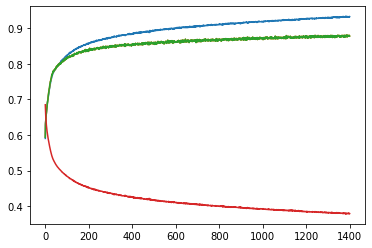

epoch: 0
train_acc: 0.93203125
test_acc: 0.8786805555555556
f1: 0.8786786335618378

epoch: 1
train_acc: 0.9334027777777778
test_acc: 0.8805555555555555
f1: 0.8805450131629188

epoch: 2
train_acc: 0.9332118055555556
test_acc: 0.88125
f1: 0.8812289968350198

epoch: 3
train_acc: 0.9330902777777778
test_acc: 0.8803472222222222
f1: 0.880343733935128

epoch: 4
train_acc: 0.9339930555555556
test_acc: 0.8773611111111111
f1: 0.877359975546129

epoch: 5
train_acc: 0.9331944444444444
test_acc: 0.8784027777777778
f1: 0.8783857427934907

epoch: 6
train_acc: 0.9331944444444444
test_acc: 0.8772916666666667
f1: 0.8772688119483512

epoch: 7
train_acc: 0.9328819444444445
test_acc: 0.8781944444444445
f1: 0.8781877075309447

epoch: 8
train_acc: 0.9330902777777778
test_acc: 0.88
f1: 0.8799967707071892

epoch: 9
train_acc: 0.93375
test_acc: 0.8793055555555556
f1: 0.8792900123739542

epoch: 10
train_acc: 0.9338715277777778
test_acc: 0.8775694444444444
f1: 0.8775591150611691

epoch: 11
train_acc: 0.9332986111

epoch: 93
train_acc: 0.9348263888888889
test_acc: 0.878125
f1: 0.8780812937190507

epoch: 94
train_acc: 0.9360763888888889
test_acc: 0.8829861111111111
f1: 0.88298269975664

epoch: 95
train_acc: 0.9366145833333334
test_acc: 0.8781944444444445
f1: 0.878190010443361

epoch: 96
train_acc: 0.9363368055555555
test_acc: 0.8794444444444445
f1: 0.8794222192637742

epoch: 97
train_acc: 0.9351388888888889
test_acc: 0.8817361111111112
f1: 0.8817154124466161

epoch: 98
train_acc: 0.9364409722222222
test_acc: 0.8785416666666667
f1: 0.8785350749077212

epoch: 99
train_acc: 0.9369618055555555
test_acc: 0.8804861111111111
f1: 0.8804775035568191

epoch: 100
train_acc: 0.9354166666666667
test_acc: 0.8799305555555555
f1: 0.8799216207364584

epoch: 101
train_acc: 0.9353993055555555
test_acc: 0.8824305555555556
f1: 0.8824285568888206

epoch: 102
train_acc: 0.9371006944444444
test_acc: 0.8772916666666667
f1: 0.877238853342286

epoch: 103
train_acc: 0.9362673611111111
test_acc: 0.8828472222222222
f1: 0.88282

epoch: 182
train_acc: 0.93859375
test_acc: 0.8820138888888889
f1: 0.8820069893450878

epoch: 183
train_acc: 0.9386805555555555
test_acc: 0.8829166666666667
f1: 0.8828988841843488

epoch: 184
train_acc: 0.9390277777777778
test_acc: 0.8824305555555556
f1: 0.8824091026639775

epoch: 185
train_acc: 0.9385590277777778
test_acc: 0.8824305555555556
f1: 0.8824286929709168

epoch: 186
train_acc: 0.9380729166666667
test_acc: 0.8783333333333333
f1: 0.8783271017227579

epoch: 187
train_acc: 0.9381944444444444
test_acc: 0.8806944444444444
f1: 0.8806816100679761

epoch: 188
train_acc: 0.9393576388888889
test_acc: 0.8809722222222223
f1: 0.8809455466739389

epoch: 189
train_acc: 0.9393055555555555
test_acc: 0.8798611111111111
f1: 0.8798549577513533

epoch: 190
train_acc: 0.9388368055555556
test_acc: 0.8797222222222222
f1: 0.8797186234802671

epoch: 191
train_acc: 0.9393229166666667
test_acc: 0.880625
f1: 0.8806090549081205

epoch: 192
train_acc: 0.9389756944444444
test_acc: 0.8832638888888888
f1: 0.88

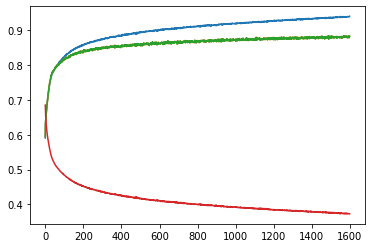

epoch: 0
train_acc: 0.9397395833333333
test_acc: 0.8815972222222223
f1: 0.8815886946916773

epoch: 1
train_acc: 0.93921875
test_acc: 0.8797916666666666
f1: 0.8797881621832306

epoch: 2
train_acc: 0.9378298611111111
test_acc: 0.8755555555555555
f1: 0.8755286940008643

epoch: 3
train_acc: 0.9388020833333334
test_acc: 0.8777083333333333
f1: 0.8776869297231302

epoch: 4
train_acc: 0.9389236111111111
test_acc: 0.8817361111111112
f1: 0.881735524233455

epoch: 5
train_acc: 0.9394097222222222
test_acc: 0.8801388888888889
f1: 0.8801312235345399

epoch: 6
train_acc: 0.9383680555555556
test_acc: 0.8808333333333334
f1: 0.8808030364402207

epoch: 7
train_acc: 0.9397395833333333
test_acc: 0.8775
f1: 0.8774948955462077

epoch: 8
train_acc: 0.9398090277777778
test_acc: 0.8808333333333334
f1: 0.8808274665688826

epoch: 9
train_acc: 0.9393402777777777
test_acc: 0.8820833333333333
f1: 0.8820629121824527

epoch: 10
train_acc: 0.9397048611111111
test_acc: 0.8809722222222223
f1: 0.8809381492266193

epoch: 1

epoch: 91
train_acc: 0.9424826388888888
test_acc: 0.8823611111111112
f1: 0.882354105342286

epoch: 92
train_acc: 0.9436979166666667
test_acc: 0.8831944444444444
f1: 0.883181193862601

epoch: 93
train_acc: 0.9410763888888889
test_acc: 0.8850694444444445
f1: 0.8850662667670266

epoch: 94
train_acc: 0.9408680555555555
test_acc: 0.8834027777777778
f1: 0.8834017493253304

epoch: 95
train_acc: 0.9419965277777778
test_acc: 0.8813888888888889
f1: 0.8813820792275656

epoch: 96
train_acc: 0.9405902777777778
test_acc: 0.8808333333333334
f1: 0.8808095244269493

epoch: 97
train_acc: 0.9423263888888889
test_acc: 0.8820138888888889
f1: 0.8819872002949538

epoch: 98
train_acc: 0.9428645833333333
test_acc: 0.8810416666666666
f1: 0.8810406173879041

epoch: 99
train_acc: 0.9415972222222222
test_acc: 0.8836111111111111
f1: 0.8836099278919459

epoch: 100
train_acc: 0.9422395833333334
test_acc: 0.8834722222222222
f1: 0.8834388648788023

epoch: 101
train_acc: 0.9422916666666666
test_acc: 0.8811111111111111
f

epoch: 181
train_acc: 0.9432986111111111
test_acc: 0.8808333333333334
f1: 0.880788371931502

epoch: 182
train_acc: 0.9443402777777777
test_acc: 0.8847916666666666
f1: 0.8847787678878486

epoch: 183
train_acc: 0.9438888888888889
test_acc: 0.8823611111111112
f1: 0.8823609953783877

epoch: 184
train_acc: 0.9453472222222222
test_acc: 0.8860416666666666
f1: 0.8860200062170238

epoch: 185
train_acc: 0.9453472222222222
test_acc: 0.8822222222222222
f1: 0.8821718703955366

epoch: 186
train_acc: 0.9432465277777777
test_acc: 0.8836111111111111
f1: 0.8836002186133947

epoch: 187
train_acc: 0.9439409722222222
test_acc: 0.8832638888888888
f1: 0.883258918199355

epoch: 188
train_acc: 0.9451215277777778
test_acc: 0.8803472222222222
f1: 0.8803414486767129

epoch: 189
train_acc: 0.9449826388888889
test_acc: 0.8817361111111112
f1: 0.8817322937108109

epoch: 190
train_acc: 0.9437673611111111
test_acc: 0.8851388888888889
f1: 0.8851315432943968

epoch: 191
train_acc: 0.9456770833333333
test_acc: 0.881736111

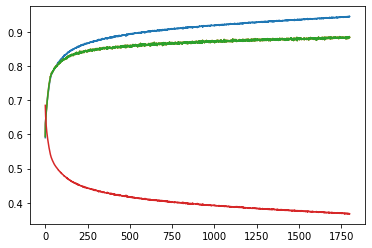

epoch: 0
train_acc: 0.9441493055555555
test_acc: 0.8832638888888888
f1: 0.8832635888269114

epoch: 1
train_acc: 0.9453819444444445
test_acc: 0.886875
f1: 0.8868693188252574

epoch: 2
train_acc: 0.9445138888888889
test_acc: 0.8845138888888889
f1: 0.8844832321279023

epoch: 3
train_acc: 0.9445659722222223
test_acc: 0.8828472222222222
f1: 0.8828216943583341

epoch: 4
train_acc: 0.94390625
test_acc: 0.8847222222222222
f1: 0.8847222956052382

epoch: 5
train_acc: 0.9445659722222223
test_acc: 0.8840277777777777
f1: 0.8840213634986759

epoch: 6
train_acc: 0.9442534722222222
test_acc: 0.8852083333333334
f1: 0.8851873873027492

epoch: 7
train_acc: 0.9444965277777778
test_acc: 0.8827083333333333
f1: 0.8827052623418997

epoch: 8
train_acc: 0.9456597222222223
test_acc: 0.8847222222222222
f1: 0.8847200540291058

epoch: 9
train_acc: 0.9448090277777778
test_acc: 0.8799305555555555
f1: 0.8799077335461511

epoch: 10
train_acc: 0.9450520833333333
test_acc: 0.8842361111111111
f1: 0.8842059034578493

epoch

epoch: 90
train_acc: 0.9469618055555555
test_acc: 0.8843055555555556
f1: 0.8842970852479977

epoch: 91
train_acc: 0.948125
test_acc: 0.8843055555555556
f1: 0.8842917345250708

epoch: 92
train_acc: 0.9474479166666666
test_acc: 0.8847222222222222
f1: 0.884688677550273

epoch: 93
train_acc: 0.9471875
test_acc: 0.8852777777777778
f1: 0.8852693786492749

epoch: 94
train_acc: 0.9485416666666666
test_acc: 0.8863194444444444
f1: 0.8863159548214219

epoch: 95
train_acc: 0.9467361111111111
test_acc: 0.8834027777777778
f1: 0.8833910643341568

epoch: 96
train_acc: 0.9473958333333333
test_acc: 0.8858333333333334
f1: 0.8858175271260853

epoch: 97
train_acc: 0.94828125
test_acc: 0.8829861111111111
f1: 0.8829858103351255

epoch: 98
train_acc: 0.9474305555555556
test_acc: 0.8858333333333334
f1: 0.8858317146125978

epoch: 99
train_acc: 0.9471354166666667
test_acc: 0.8845138888888889
f1: 0.8844923793266032

epoch: 100
train_acc: 0.9473958333333333
test_acc: 0.8855555555555555
f1: 0.8855418838519306

epoc

epoch: 180
train_acc: 0.9502256944444445
test_acc: 0.8874305555555555
f1: 0.8874259664252756

epoch: 181
train_acc: 0.9494618055555556
test_acc: 0.8868055555555555
f1: 0.8867937040121918

epoch: 182
train_acc: 0.9492013888888889
test_acc: 0.8843055555555556
f1: 0.8842899151139909

epoch: 183
train_acc: 0.9494270833333334
test_acc: 0.8875694444444444
f1: 0.8875568566669241

epoch: 184
train_acc: 0.9495486111111111
test_acc: 0.8851388888888889
f1: 0.8851268628442732

epoch: 185
train_acc: 0.9503472222222222
test_acc: 0.8868055555555555
f1: 0.8867964362022621

epoch: 186
train_acc: 0.9493402777777777
test_acc: 0.8870138888888889
f1: 0.8870031617027495

epoch: 187
train_acc: 0.95015625
test_acc: 0.8853472222222222
f1: 0.8853307795812867

epoch: 188
train_acc: 0.9494965277777778
test_acc: 0.8881944444444444
f1: 0.8881796900171516

epoch: 189
train_acc: 0.9506770833333333
test_acc: 0.8854166666666666
f1: 0.8854158002055175

epoch: 190
train_acc: 0.9499305555555555
test_acc: 0.887708333333333

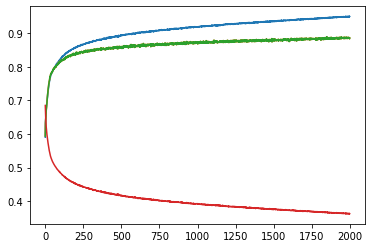

epoch: 0
train_acc: 0.9504166666666667
test_acc: 0.8872916666666667
f1: 0.8872848322139859

epoch: 1
train_acc: 0.9494791666666667
test_acc: 0.8865972222222223
f1: 0.8865794095351767

epoch: 2
train_acc: 0.9495833333333333
test_acc: 0.8895833333333333
f1: 0.8895778973452932

epoch: 3
train_acc: 0.9499479166666667
test_acc: 0.8827777777777778
f1: 0.8827664883869986

epoch: 4
train_acc: 0.9512152777777778
test_acc: 0.8853472222222222
f1: 0.8853347219021852

epoch: 5
train_acc: 0.9504861111111111
test_acc: 0.8875
f1: 0.8874872378462624

epoch: 6
train_acc: 0.9502083333333333
test_acc: 0.88875
f1: 0.8887433747097652

epoch: 7
train_acc: 0.9502604166666667
test_acc: 0.885625
f1: 0.8856147544343936

epoch: 8
train_acc: 0.9503645833333333
test_acc: 0.8874305555555555
f1: 0.8874192467454843

epoch: 9
train_acc: 0.9504513888888889
test_acc: 0.8853472222222222
f1: 0.8853284034306618

epoch: 10
train_acc: 0.9502430555555555
test_acc: 0.8874305555555555
f1: 0.8874286418882328

epoch: 11
train_acc:

epoch: 91
train_acc: 0.9530034722222223
test_acc: 0.8876388888888889
f1: 0.8876247722825122

epoch: 92
train_acc: 0.9522916666666666
test_acc: 0.8842361111111111
f1: 0.8842248030248134

epoch: 93
train_acc: 0.9517013888888889
test_acc: 0.886875
f1: 0.8868657438260221

epoch: 94
train_acc: 0.9523784722222223
test_acc: 0.8879166666666667
f1: 0.8879094987165397

epoch: 95
train_acc: 0.9519444444444445
test_acc: 0.8871527777777778
f1: 0.8871401433500626

epoch: 96
train_acc: 0.9529340277777778
test_acc: 0.8852083333333334
f1: 0.8851856239391026

epoch: 97
train_acc: 0.9528472222222222
test_acc: 0.8889583333333333
f1: 0.8889498003640096

epoch: 98
train_acc: 0.9529513888888889
test_acc: 0.8875694444444444
f1: 0.8875565225850235

epoch: 99
train_acc: 0.9514583333333333
test_acc: 0.8884027777777778
f1: 0.8883848567620748

epoch: 100
train_acc: 0.951875
test_acc: 0.8896527777777777
f1: 0.8896400953598532

epoch: 101
train_acc: 0.9527256944444444
test_acc: 0.8885416666666667
f1: 0.8885209072875

epoch: 182
train_acc: 0.9543229166666667
test_acc: 0.8866666666666667
f1: 0.8866615243802815

epoch: 183
train_acc: 0.9553993055555555
test_acc: 0.8885416666666667
f1: 0.8885390623339057

epoch: 184
train_acc: 0.9549305555555555
test_acc: 0.8894444444444445
f1: 0.8894192046111008

epoch: 185
train_acc: 0.9547743055555555
test_acc: 0.8868055555555555
f1: 0.8867923760861519

epoch: 186
train_acc: 0.9553298611111111
test_acc: 0.8906944444444445
f1: 0.890691340579754

epoch: 187
train_acc: 0.9543055555555555
test_acc: 0.8895138888888889
f1: 0.8895059315275419

epoch: 188
train_acc: 0.9549479166666667
test_acc: 0.8895833333333333
f1: 0.8895694610192798

epoch: 189
train_acc: 0.9552951388888888
test_acc: 0.8879166666666667
f1: 0.8878951468435482

epoch: 190
train_acc: 0.9558159722222223
test_acc: 0.8876388888888889
f1: 0.8876292643511322

epoch: 191
train_acc: 0.9555902777777778
test_acc: 0.8890972222222222
f1: 0.8890875787023711

epoch: 192
train_acc: 0.9548611111111112
test_acc: 0.88888888

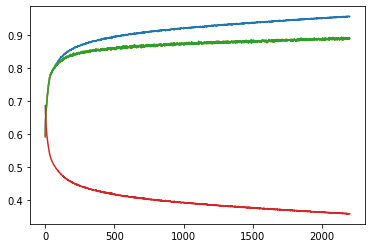

epoch: 0
train_acc: 0.9551215277777778
test_acc: 0.8883333333333333
f1: 0.8883178732474118

epoch: 1
train_acc: 0.95515625
test_acc: 0.8881944444444444
f1: 0.8881914356704712

epoch: 2
train_acc: 0.9554166666666667
test_acc: 0.8909027777777778
f1: 0.8908946594430169

epoch: 3
train_acc: 0.9560069444444445
test_acc: 0.8907638888888889
f1: 0.8907455670934098

epoch: 4
train_acc: 0.9553472222222222
test_acc: 0.8891666666666667
f1: 0.8891571729940712

epoch: 5
train_acc: 0.9555902777777778
test_acc: 0.8878472222222222
f1: 0.8878418105704535

epoch: 6
train_acc: 0.9554166666666667
test_acc: 0.8884722222222222
f1: 0.8884582103125556

epoch: 7
train_acc: 0.9563715277777778
test_acc: 0.8895138888888889
f1: 0.8895036975046049

epoch: 8
train_acc: 0.9565104166666667
test_acc: 0.8909027777777778
f1: 0.8908874939626349

epoch: 9
train_acc: 0.9546354166666666
test_acc: 0.889375
f1: 0.8893678009902237

epoch: 10
train_acc: 0.9548611111111112
test_acc: 0.88875
f1: 0.8887377080742848

epoch: 11
train_

epoch: 91
train_acc: 0.9567013888888889
test_acc: 0.8891666666666667
f1: 0.8891605366131057

epoch: 92
train_acc: 0.9572569444444444
test_acc: 0.8877083333333333
f1: 0.8876964154380228

epoch: 93
train_acc: 0.9576388888888889
test_acc: 0.89125
f1: 0.8912417758430099

epoch: 94
train_acc: 0.9565972222222222
test_acc: 0.8908333333333334
f1: 0.8908263519097894

epoch: 95
train_acc: 0.9573958333333333
test_acc: 0.8886805555555556
f1: 0.8886764082431174

epoch: 96
train_acc: 0.9576736111111112
test_acc: 0.8893055555555556
f1: 0.8892847275029665

epoch: 97
train_acc: 0.9585416666666666
test_acc: 0.8908333333333334
f1: 0.8908174947283324

epoch: 98
train_acc: 0.9576041666666667
test_acc: 0.8900694444444445
f1: 0.8900587061717335

epoch: 99
train_acc: 0.9571180555555555
test_acc: 0.8902777777777777
f1: 0.8902739677946574

epoch: 100
train_acc: 0.9574131944444444
test_acc: 0.8907638888888889
f1: 0.8907492980631025

epoch: 101
train_acc: 0.9571354166666667
test_acc: 0.8926388888888889
f1: 0.8926

epoch: 181
train_acc: 0.9598611111111112
test_acc: 0.8899305555555556
f1: 0.8899147702218895

epoch: 182
train_acc: 0.9595138888888889
test_acc: 0.8899305555555556
f1: 0.8899290538502703

epoch: 183
train_acc: 0.9586979166666667
test_acc: 0.8917361111111111
f1: 0.8917340074829423

epoch: 184
train_acc: 0.9600868055555556
test_acc: 0.8920833333333333
f1: 0.892073233726262

epoch: 185
train_acc: 0.9598263888888889
test_acc: 0.8895833333333333
f1: 0.8895657963266702

epoch: 186
train_acc: 0.9591493055555556
test_acc: 0.8886111111111111
f1: 0.8886090160618588

epoch: 187
train_acc: 0.9594444444444444
test_acc: 0.8927777777777778
f1: 0.8927677431617432

epoch: 188
train_acc: 0.9595659722222222
test_acc: 0.8921527777777778
f1: 0.8921163422583802

epoch: 189
train_acc: 0.9594618055555556
test_acc: 0.8904166666666666
f1: 0.8904058106063014

epoch: 190
train_acc: 0.96
test_acc: 0.8927083333333333
f1: 0.8927055241671019

epoch: 191
train_acc: 0.9597048611111111
test_acc: 0.8932638888888889
f1: 0

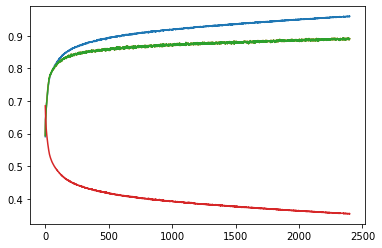

epoch: 0
train_acc: 0.9596354166666666
test_acc: 0.8909027777777778
f1: 0.8908767101808489

epoch: 1
train_acc: 0.9601388888888889
test_acc: 0.8915972222222223
f1: 0.8915926063707275

epoch: 2
train_acc: 0.9595138888888889
test_acc: 0.8906944444444445
f1: 0.890691173994192

epoch: 3
train_acc: 0.9593576388888889
test_acc: 0.8922222222222222
f1: 0.8922051043389888

epoch: 4
train_acc: 0.9595833333333333
test_acc: 0.8927777777777778
f1: 0.8927656143423637

epoch: 5
train_acc: 0.9599131944444445
test_acc: 0.8927083333333333
f1: 0.8927056773330042

epoch: 6
train_acc: 0.9605208333333334
test_acc: 0.8903472222222222
f1: 0.890334289556621

epoch: 7
train_acc: 0.9597395833333333
test_acc: 0.8889583333333333
f1: 0.888935041448895

epoch: 8
train_acc: 0.9600694444444444
test_acc: 0.889375
f1: 0.8893602236583105

epoch: 9
train_acc: 0.9599305555555555
test_acc: 0.8915972222222223
f1: 0.8915969435804931

epoch: 10
train_acc: 0.9603125
test_acc: 0.8909722222222223
f1: 0.8909661920316894

epoch: 11

epoch: 90
train_acc: 0.9622048611111111
test_acc: 0.8911111111111111
f1: 0.8911000192067607

epoch: 91
train_acc: 0.9614756944444445
test_acc: 0.8932638888888889
f1: 0.8932612466413122

epoch: 92
train_acc: 0.9615277777777778
test_acc: 0.8925
f1: 0.8924964434598909

epoch: 93
train_acc: 0.9611111111111111
test_acc: 0.8911111111111111
f1: 0.8910843855803566

epoch: 94
train_acc: 0.9621354166666667
test_acc: 0.8925
f1: 0.8924871578900416

epoch: 95
train_acc: 0.9617881944444444
test_acc: 0.8936805555555556
f1: 0.893677123705961

epoch: 96
train_acc: 0.9626909722222222
test_acc: 0.8919444444444444
f1: 0.891936272804421

epoch: 97
train_acc: 0.9628298611111111
test_acc: 0.8911805555555555
f1: 0.891177861735157

epoch: 98
train_acc: 0.9626909722222222
test_acc: 0.8923611111111112
f1: 0.8923547008739925

epoch: 99
train_acc: 0.9625868055555555
test_acc: 0.8885416666666667
f1: 0.8885339016341497

epoch: 100
train_acc: 0.9625520833333333
test_acc: 0.8898611111111111
f1: 0.8898420369383805

epo

epoch: 180
train_acc: 0.9636284722222223
test_acc: 0.8951388888888889
f1: 0.8951226005003279

epoch: 181
train_acc: 0.9634722222222222
test_acc: 0.8945138888888889
f1: 0.8945038737716512

epoch: 182
train_acc: 0.9639756944444444
test_acc: 0.8935416666666667
f1: 0.8935375156182952

epoch: 183
train_acc: 0.9635590277777778
test_acc: 0.8936111111111111
f1: 0.893609364596153

epoch: 184
train_acc: 0.9638541666666667
test_acc: 0.893125
f1: 0.8931034360117408

epoch: 185
train_acc: 0.9638194444444445
test_acc: 0.8911805555555555
f1: 0.8911649494875085

epoch: 186
train_acc: 0.9631944444444445
test_acc: 0.8909027777777778
f1: 0.8908932912595022

epoch: 187
train_acc: 0.9639409722222222
test_acc: 0.8925
f1: 0.8924923847374041

epoch: 188
train_acc: 0.9638541666666667
test_acc: 0.8941666666666667
f1: 0.8941576012800531

epoch: 189
train_acc: 0.9638715277777777
test_acc: 0.8893055555555556
f1: 0.8892974513117096

epoch: 190
train_acc: 0.9635763888888889
test_acc: 0.8880555555555556
f1: 0.8880425

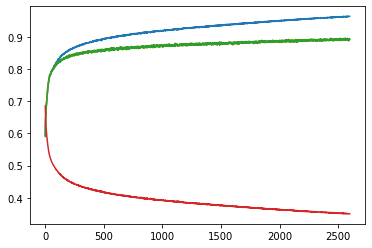

epoch: 0
train_acc: 0.9633159722222222
test_acc: 0.895
f1: 0.8949840527204835

epoch: 1
train_acc: 0.9653819444444445
test_acc: 0.8924305555555555
f1: 0.8924071159223826

epoch: 2
train_acc: 0.9636458333333333
test_acc: 0.8920138888888889
f1: 0.8920044989869673

epoch: 3
train_acc: 0.9638888888888889
test_acc: 0.893125
f1: 0.8931182842103952

epoch: 4
train_acc: 0.96390625
test_acc: 0.8953472222222222
f1: 0.8953325610449973

epoch: 5
train_acc: 0.9645486111111111
test_acc: 0.8940277777777778
f1: 0.894010572436737

epoch: 6
train_acc: 0.9636805555555555
test_acc: 0.8914583333333334
f1: 0.8914502563395514

epoch: 7
train_acc: 0.9638368055555555
test_acc: 0.8955555555555555
f1: 0.8955515742093406

epoch: 8
train_acc: 0.9639409722222222
test_acc: 0.8949305555555556
f1: 0.8949229883099752

epoch: 9
train_acc: 0.9642361111111111
test_acc: 0.8916666666666667
f1: 0.8916483003017884

epoch: 10
train_acc: 0.9645138888888889
test_acc: 0.8905555555555555
f1: 0.8905411127124416

epoch: 11
train_acc

epoch: 92
train_acc: 0.9658854166666667
test_acc: 0.8927777777777778
f1: 0.8927632826746711

epoch: 93
train_acc: 0.9658854166666667
test_acc: 0.8916666666666667
f1: 0.8916441608353713

epoch: 94
train_acc: 0.9650173611111111
test_acc: 0.8915277777777778
f1: 0.8915210814324972

epoch: 95
train_acc: 0.9656423611111111
test_acc: 0.8940972222222222
f1: 0.8940930928362036

epoch: 96
train_acc: 0.9658333333333333
test_acc: 0.890625
f1: 0.8906146156618504

epoch: 97
train_acc: 0.9663020833333333
test_acc: 0.8940277777777778
f1: 0.8940113167970202

epoch: 98
train_acc: 0.9656770833333334
test_acc: 0.8948611111111111
f1: 0.8948479018762199

epoch: 99
train_acc: 0.9665972222222222
test_acc: 0.8913888888888889
f1: 0.8913759140439438

epoch: 100
train_acc: 0.9657986111111111
test_acc: 0.8910416666666666
f1: 0.8910377922969034

epoch: 101
train_acc: 0.9660416666666667
test_acc: 0.8950694444444445
f1: 0.8950613810819378

epoch: 102
train_acc: 0.9659201388888888
test_acc: 0.8966666666666666
f1: 0.89

epoch: 182
train_acc: 0.966875
test_acc: 0.895
f1: 0.8949963539908368

epoch: 183
train_acc: 0.9669618055555556
test_acc: 0.8931944444444444
f1: 0.8931813576169457

epoch: 184
train_acc: 0.9670138888888888
test_acc: 0.8940277777777778
f1: 0.8940098117054673

epoch: 185
train_acc: 0.9673958333333333
test_acc: 0.8939583333333333
f1: 0.8939536216245758

epoch: 186
train_acc: 0.9674826388888889
test_acc: 0.8931944444444444
f1: 0.8931932576926074

epoch: 187
train_acc: 0.9671180555555555
test_acc: 0.8920138888888889
f1: 0.8920092907792962

epoch: 188
train_acc: 0.9679166666666666
test_acc: 0.8921527777777778
f1: 0.8921335026569991

epoch: 189
train_acc: 0.9679166666666666
test_acc: 0.8943055555555556
f1: 0.8942965020657746

epoch: 190
train_acc: 0.9667534722222222
test_acc: 0.8941666666666667
f1: 0.8941530373175526

epoch: 191
train_acc: 0.9674479166666666
test_acc: 0.8967361111111111
f1: 0.8967276617982166

epoch: 192
train_acc: 0.9676215277777778
test_acc: 0.8947222222222222
f1: 0.8947108

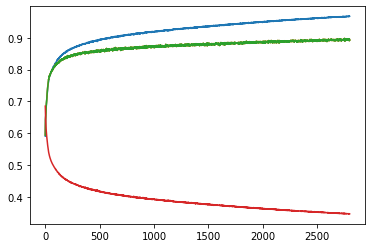

epoch: 0
train_acc: 0.9675868055555555
test_acc: 0.8913888888888889
f1: 0.8913831059512878

epoch: 1
train_acc: 0.9681597222222222
test_acc: 0.895
f1: 0.8949847659219076

epoch: 2
train_acc: 0.9679166666666666
test_acc: 0.8943055555555556
f1: 0.8942916075814314

epoch: 3
train_acc: 0.9672395833333334
test_acc: 0.8925
f1: 0.8924905118466268

epoch: 4
train_acc: 0.9684201388888889
test_acc: 0.8925694444444444
f1: 0.8925510357393401

epoch: 5
train_acc: 0.9681423611111111
test_acc: 0.8922916666666667
f1: 0.8922779657546737

epoch: 6
train_acc: 0.9677256944444445
test_acc: 0.8919444444444444
f1: 0.8919318633067804

epoch: 7
train_acc: 0.9675173611111111
test_acc: 0.8955555555555555
f1: 0.8955530430773959

epoch: 8
train_acc: 0.9681597222222222
test_acc: 0.895
f1: 0.8949939717752219

epoch: 9
train_acc: 0.9685069444444444
test_acc: 0.89375
f1: 0.8937449761753008

epoch: 10
train_acc: 0.9667534722222222
test_acc: 0.895
f1: 0.8949836900374145

epoch: 11
train_acc: 0.9669791666666666
test_acc:

epoch: 92
train_acc: 0.9690277777777778
test_acc: 0.894375
f1: 0.894370693974611

epoch: 93
train_acc: 0.9693402777777778
test_acc: 0.8922916666666667
f1: 0.8922853681425726

epoch: 94
train_acc: 0.9692708333333333
test_acc: 0.8947916666666667
f1: 0.8947808009852865

epoch: 95
train_acc: 0.9692881944444445
test_acc: 0.8966666666666666
f1: 0.8966632479769494

epoch: 96
train_acc: 0.9690972222222223
test_acc: 0.8935416666666667
f1: 0.8935380578173451

epoch: 97
train_acc: 0.9696527777777778
test_acc: 0.8929166666666667
f1: 0.8929038743323282

epoch: 98
train_acc: 0.96890625
test_acc: 0.8930555555555556
f1: 0.8930354330957141

epoch: 99
train_acc: 0.9698263888888888
test_acc: 0.895
f1: 0.8949895979953915

epoch: 100
train_acc: 0.9693055555555555
test_acc: 0.894375
f1: 0.8943747284983535

epoch: 101
train_acc: 0.9699131944444445
test_acc: 0.8959722222222222
f1: 0.8959697197672467

epoch: 102
train_acc: 0.9691840277777778
test_acc: 0.8925
f1: 0.8924789431788819

epoch: 103
train_acc: 0.9695

epoch: 182
train_acc: 0.9707638888888889
test_acc: 0.8920833333333333
f1: 0.8920717241243509

epoch: 183
train_acc: 0.9709722222222222
test_acc: 0.89625
f1: 0.8962352936256668

epoch: 184
train_acc: 0.9716493055555555
test_acc: 0.8952083333333334
f1: 0.8952042472720205

epoch: 185
train_acc: 0.97078125
test_acc: 0.8963888888888889
f1: 0.8963861006337536

epoch: 186
train_acc: 0.9700694444444444
test_acc: 0.8934027777777778
f1: 0.8933935086462991

epoch: 187
train_acc: 0.9709201388888888
test_acc: 0.8975
f1: 0.8974867999217241

epoch: 188
train_acc: 0.9705555555555555
test_acc: 0.8957638888888889
f1: 0.8957452591681621

epoch: 189
train_acc: 0.9708159722222223
test_acc: 0.8946527777777777
f1: 0.8946486700541121

epoch: 190
train_acc: 0.9707638888888889
test_acc: 0.89625
f1: 0.8962405685864999

epoch: 191
train_acc: 0.9709895833333333
test_acc: 0.8935416666666667
f1: 0.893528786203747

epoch: 192
train_acc: 0.9710243055555555
test_acc: 0.8940972222222222
f1: 0.8940840820246099

epoch: 19

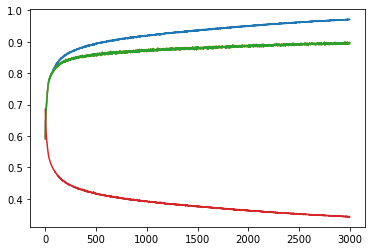

epoch: 0
train_acc: 0.9714756944444445
test_acc: 0.8975694444444444
f1: 0.8975634545520921

epoch: 1
train_acc: 0.9712673611111111
test_acc: 0.8964583333333334
f1: 0.8964445031227501

epoch: 2
train_acc: 0.9710416666666667
test_acc: 0.8961111111111111
f1: 0.8961005285288993

epoch: 3
train_acc: 0.9715798611111112
test_acc: 0.8972222222222223
f1: 0.89720625744403

epoch: 4
train_acc: 0.9713368055555556
test_acc: 0.8972916666666667
f1: 0.8972845112254876

epoch: 5
train_acc: 0.9703298611111111
test_acc: 0.8973611111111112
f1: 0.8973570184012392

epoch: 6
train_acc: 0.9710069444444445
test_acc: 0.8919444444444444
f1: 0.8919397438368613

epoch: 7
train_acc: 0.9710243055555555
test_acc: 0.8950694444444445
f1: 0.8950567488283506

epoch: 8
train_acc: 0.9705208333333334
test_acc: 0.8945833333333333
f1: 0.8945658418547815

epoch: 9
train_acc: 0.9710590277777778
test_acc: 0.8965972222222223
f1: 0.896585645198919

epoch: 10
train_acc: 0.9717013888888889
test_acc: 0.8943055555555556
f1: 0.89430170

epoch: 91
train_acc: 0.9723263888888889
test_acc: 0.895
f1: 0.8949851164404339

epoch: 92
train_acc: 0.9725694444444445
test_acc: 0.8951388888888889
f1: 0.8951282072718169

epoch: 93
train_acc: 0.9718576388888889
test_acc: 0.8954166666666666
f1: 0.8954068790165707

epoch: 94
train_acc: 0.9728125
test_acc: 0.8945138888888889
f1: 0.8945083796917778

epoch: 95
train_acc: 0.9715798611111112
test_acc: 0.8963194444444444
f1: 0.8963090286187588

epoch: 96
train_acc: 0.9722048611111112
test_acc: 0.8951388888888889
f1: 0.8951214895920423

epoch: 97
train_acc: 0.9716319444444445
test_acc: 0.8977083333333333
f1: 0.8977009661471208

epoch: 98
train_acc: 0.9728645833333334
test_acc: 0.898125
f1: 0.8981206621049695

epoch: 99
train_acc: 0.9725347222222223
test_acc: 0.8950694444444445
f1: 0.8950603202374969

epoch: 100
train_acc: 0.9730034722222223
test_acc: 0.8917361111111111
f1: 0.8917261247075294

epoch: 101
train_acc: 0.9718923611111111
test_acc: 0.8957638888888889
f1: 0.8957464057261336

epoch: 

epoch: 181
train_acc: 0.9731944444444445
test_acc: 0.8958333333333334
f1: 0.8958264365346749

epoch: 182
train_acc: 0.9732638888888889
test_acc: 0.8951388888888889
f1: 0.8951266796871715

epoch: 183
train_acc: 0.9730729166666666
test_acc: 0.8983333333333333
f1: 0.8983256448494037

epoch: 184
train_acc: 0.9736805555555555
test_acc: 0.8974305555555555
f1: 0.897415845815603

epoch: 185
train_acc: 0.9739409722222222
test_acc: 0.8952777777777777
f1: 0.895265267505286

epoch: 186
train_acc: 0.9736458333333333
test_acc: 0.8961111111111111
f1: 0.8960931193315367

epoch: 187
train_acc: 0.9737326388888888
test_acc: 0.8950694444444445
f1: 0.8950621341864177

epoch: 188
train_acc: 0.9738368055555555
test_acc: 0.8981944444444444
f1: 0.8981857240659826

epoch: 189
train_acc: 0.97265625
test_acc: 0.8963888888888889
f1: 0.8963794701011095

epoch: 190
train_acc: 0.9734722222222222
test_acc: 0.8968055555555555
f1: 0.896791268436352

epoch: 191
train_acc: 0.97421875
test_acc: 0.8967361111111111
f1: 0.896

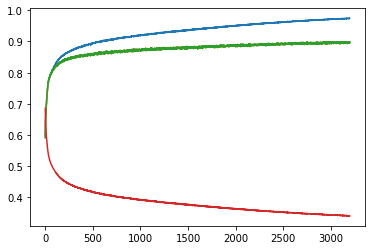

epoch: 0
train_acc: 0.9738194444444445
test_acc: 0.8970138888888889
f1: 0.8969958641563895

epoch: 1
train_acc: 0.9738368055555555
test_acc: 0.8988194444444444
f1: 0.8988035515571049

epoch: 2
train_acc: 0.9735590277777778
test_acc: 0.8975
f1: 0.8974970893873678

epoch: 3
train_acc: 0.9734375
test_acc: 0.8959722222222222
f1: 0.8959638413687049

epoch: 4
train_acc: 0.9736111111111111
test_acc: 0.8952083333333334
f1: 0.8951975106843546

epoch: 5
train_acc: 0.9735763888888889
test_acc: 0.8935416666666667
f1: 0.893535667166322

epoch: 6
train_acc: 0.9739236111111111
test_acc: 0.8955555555555555
f1: 0.8955437072350485

epoch: 7
train_acc: 0.9740104166666667
test_acc: 0.8945138888888889
f1: 0.8945060392704919

epoch: 8
train_acc: 0.9736805555555555
test_acc: 0.8968055555555555
f1: 0.8968024679513147

epoch: 9
train_acc: 0.9742013888888889
test_acc: 0.8967361111111111
f1: 0.896728175823191

epoch: 10
train_acc: 0.9740104166666667
test_acc: 0.8947222222222222
f1: 0.8947120831722097

epoch: 11


epoch: 91
train_acc: 0.9750173611111111
test_acc: 0.8973611111111112
f1: 0.8973564540649853

epoch: 92
train_acc: 0.9751041666666667
test_acc: 0.8952083333333334
f1: 0.8951953310000893

epoch: 93
train_acc: 0.97515625
test_acc: 0.8968055555555555
f1: 0.8967876840418874

epoch: 94
train_acc: 0.9751736111111111
test_acc: 0.8933333333333333
f1: 0.8933174972430417

epoch: 95
train_acc: 0.9749826388888889
test_acc: 0.8954861111111111
f1: 0.8954818503825047

epoch: 96
train_acc: 0.9751909722222222
test_acc: 0.8972916666666667
f1: 0.8972847490150399

epoch: 97
train_acc: 0.9752951388888889
test_acc: 0.8945138888888889
f1: 0.8945038737716512

epoch: 98
train_acc: 0.9746701388888889
test_acc: 0.8977083333333333
f1: 0.8976968807105491

epoch: 99
train_acc: 0.9753993055555555
test_acc: 0.89875
f1: 0.8987313339208426

epoch: 100
train_acc: 0.9744444444444444
test_acc: 0.8951388888888889
f1: 0.8951296336488415

epoch: 101
train_acc: 0.9749131944444445
test_acc: 0.8959722222222222
f1: 0.895968256759

epoch: 182
train_acc: 0.9760243055555555
test_acc: 0.8951388888888889
f1: 0.8951243710221343

epoch: 183
train_acc: 0.9761631944444444
test_acc: 0.8958333333333334
f1: 0.8958286069671705

epoch: 184
train_acc: 0.9761458333333334
test_acc: 0.8950694444444445
f1: 0.8950645837188815

epoch: 185
train_acc: 0.9761805555555556
test_acc: 0.8983333333333333
f1: 0.8983243600409959

epoch: 186
train_acc: 0.9758333333333333
test_acc: 0.8981944444444444
f1: 0.8981857240659826

epoch: 187
train_acc: 0.9763888888888889
test_acc: 0.8952083333333334
f1: 0.8951969081468185

epoch: 188
train_acc: 0.9754861111111112
test_acc: 0.8979166666666667
f1: 0.8979108058925768

epoch: 189
train_acc: 0.9764236111111111
test_acc: 0.8980555555555556
f1: 0.8980483338465821

epoch: 190
train_acc: 0.9760243055555555
test_acc: 0.8965277777777778
f1: 0.8965150993818266

epoch: 191
train_acc: 0.9763194444444444
test_acc: 0.8929861111111111
f1: 0.8929784038239735

epoch: 192
train_acc: 0.9755034722222222
test_acc: 0.8966666

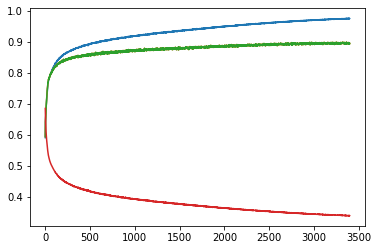

epoch: 0
train_acc: 0.97640625
test_acc: 0.8970138888888889
f1: 0.897009312946461

epoch: 1
train_acc: 0.9762847222222222
test_acc: 0.8968055555555555
f1: 0.8967861386884618

epoch: 2
train_acc: 0.9761631944444444
test_acc: 0.8993055555555556
f1: 0.8992808412573451

epoch: 3
train_acc: 0.9764583333333333
test_acc: 0.8988888888888888
f1: 0.8988837101074972

epoch: 4
train_acc: 0.9769618055555556
test_acc: 0.89625
f1: 0.8962440435398026

epoch: 5
train_acc: 0.9763715277777778
test_acc: 0.8976388888888889
f1: 0.8976358262181949

epoch: 6
train_acc: 0.9756076388888889
test_acc: 0.8955555555555555
f1: 0.8955417725377616

epoch: 7
train_acc: 0.9756597222222222
test_acc: 0.8947916666666667
f1: 0.8947751411180604

epoch: 8
train_acc: 0.9764409722222223
test_acc: 0.8956944444444445
f1: 0.8956838194187211

epoch: 9
train_acc: 0.97671875
test_acc: 0.8965972222222223
f1: 0.896592432268309

epoch: 10
train_acc: 0.9759722222222222
test_acc: 0.8960416666666666
f1: 0.896037047525861

epoch: 11
train_a

epoch: 91
train_acc: 0.9771527777777778
test_acc: 0.8993055555555556
f1: 0.8992862223811307

epoch: 92
train_acc: 0.9775173611111111
test_acc: 0.8978472222222222
f1: 0.8978300884897685

epoch: 93
train_acc: 0.9770659722222222
test_acc: 0.895625
f1: 0.8956182077139399

epoch: 94
train_acc: 0.9770486111111111
test_acc: 0.8973611111111112
f1: 0.8973596558378464

epoch: 95
train_acc: 0.97703125
test_acc: 0.8938888888888888
f1: 0.8938734936036207

epoch: 96
train_acc: 0.9774826388888889
test_acc: 0.8964583333333334
f1: 0.896438253178465

epoch: 97
train_acc: 0.9761979166666667
test_acc: 0.89625
f1: 0.8962342425690493

epoch: 98
train_acc: 0.9769965277777778
test_acc: 0.8974305555555555
f1: 0.8974254044842881

epoch: 99
train_acc: 0.9779513888888889
test_acc: 0.8948611111111111
f1: 0.8948546205434065

epoch: 100
train_acc: 0.9768923611111111
test_acc: 0.8963194444444444
f1: 0.896305595682271

epoch: 101
train_acc: 0.9761805555555556
test_acc: 0.8970138888888889
f1: 0.8969958641563895

epoch:

epoch: 181
train_acc: 0.9783680555555555
test_acc: 0.8965972222222223
f1: 0.896577963209448

epoch: 182
train_acc: 0.9775520833333333
test_acc: 0.8945138888888889
f1: 0.8945014476481996

epoch: 183
train_acc: 0.9782638888888889
test_acc: 0.8972222222222223
f1: 0.8972154173808792

epoch: 184
train_acc: 0.9782291666666667
test_acc: 0.8980555555555556
f1: 0.898055083585291

epoch: 185
train_acc: 0.9781770833333333
test_acc: 0.8982638888888889
f1: 0.8982606049831697

epoch: 186
train_acc: 0.9784027777777777
test_acc: 0.8977083333333333
f1: 0.8976929725750667

epoch: 187
train_acc: 0.9776388888888888
test_acc: 0.8953472222222222
f1: 0.8953235496436112

epoch: 188
train_acc: 0.9783333333333334
test_acc: 0.8952777777777777
f1: 0.8952737858428762

epoch: 189
train_acc: 0.9784895833333334
test_acc: 0.8984722222222222
f1: 0.8984676155906687

epoch: 190
train_acc: 0.9784548611111111
test_acc: 0.8973611111111112
f1: 0.8973586420667495

epoch: 191
train_acc: 0.97828125
test_acc: 0.8952083333333334


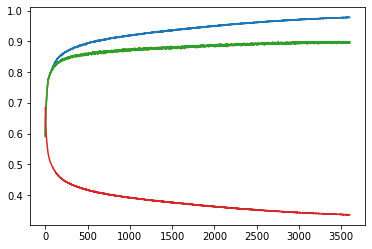

epoch: 0
train_acc: 0.9781597222222222
test_acc: 0.8966666666666666
f1: 0.8966578154230438

epoch: 1
train_acc: 0.978125
test_acc: 0.9014583333333334
f1: 0.9014448515342064

epoch: 2
train_acc: 0.9786111111111111
test_acc: 0.8958333333333334
f1: 0.8958249412904254

epoch: 3
train_acc: 0.9789583333333334
test_acc: 0.8958333333333334
f1: 0.8958218240395924

epoch: 4
train_acc: 0.978125
test_acc: 0.8984722222222222
f1: 0.8984581658505697

epoch: 5
train_acc: 0.9780381944444444
test_acc: 0.8955555555555555
f1: 0.8955463370912965

epoch: 6
train_acc: 0.9784027777777777
test_acc: 0.8974305555555555
f1: 0.8974274070074771

epoch: 7
train_acc: 0.9785763888888889
test_acc: 0.8980555555555556
f1: 0.8980521828159691

epoch: 8
train_acc: 0.978125
test_acc: 0.8972222222222223
f1: 0.897211165832715

epoch: 9
train_acc: 0.9785069444444444
test_acc: 0.8981944444444444
f1: 0.898168561434361

epoch: 10
train_acc: 0.9786458333333333
test_acc: 0.8969444444444444
f1: 0.8969277126449003

epoch: 11
train_acc

epoch: 91
train_acc: 0.9786805555555556
test_acc: 0.8989583333333333
f1: 0.8989534578204396

epoch: 92
train_acc: 0.9790625
test_acc: 0.8989583333333333
f1: 0.8989457962923327

epoch: 93
train_acc: 0.9792881944444445
test_acc: 0.8970138888888889
f1: 0.89700325271365

epoch: 94
train_acc: 0.9794965277777777
test_acc: 0.8940972222222222
f1: 0.8940890841495401

epoch: 95
train_acc: 0.9790277777777778
test_acc: 0.8966666666666666
f1: 0.8966621714840937

epoch: 96
train_acc: 0.9795833333333334
test_acc: 0.899375
f1: 0.899368898261285

epoch: 97
train_acc: 0.9794965277777777
test_acc: 0.8975
f1: 0.897483720363626

epoch: 98
train_acc: 0.9793923611111112
test_acc: 0.8963194444444444
f1: 0.896307528239308

epoch: 99
train_acc: 0.9788888888888889
test_acc: 0.8976388888888889
f1: 0.8976338494886555

epoch: 100
train_acc: 0.97953125
test_acc: 0.8957638888888889
f1: 0.8957580146227329

epoch: 101
train_acc: 0.9791493055555556
test_acc: 0.8960416666666666
f1: 0.8960274437961289

epoch: 102
train_ac

epoch: 181
train_acc: 0.9788715277777778
test_acc: 0.8988194444444444
f1: 0.8988056016105275

epoch: 182
train_acc: 0.9795659722222222
test_acc: 0.8965972222222223
f1: 0.8965874049019016

epoch: 183
train_acc: 0.9794965277777777
test_acc: 0.8963888888888889
f1: 0.8963835820607047

epoch: 184
train_acc: 0.9798784722222222
test_acc: 0.8985416666666667
f1: 0.898529077926528

epoch: 185
train_acc: 0.9799652777777778
test_acc: 0.8967361111111111
f1: 0.8967176551519368

epoch: 186
train_acc: 0.9803125
test_acc: 0.8984027777777778
f1: 0.8983911010141378

epoch: 187
train_acc: 0.9792361111111111
test_acc: 0.8986111111111111
f1: 0.8986024264231478

epoch: 188
train_acc: 0.9792708333333333
test_acc: 0.8974305555555555
f1: 0.8974238807674579

epoch: 189
train_acc: 0.9795833333333334
test_acc: 0.8964583333333334
f1: 0.8964501209942011

epoch: 190
train_acc: 0.9800173611111112
test_acc: 0.8959027777777778
f1: 0.8958928945251515

epoch: 191
train_acc: 0.9798958333333333
test_acc: 0.8971527777777778


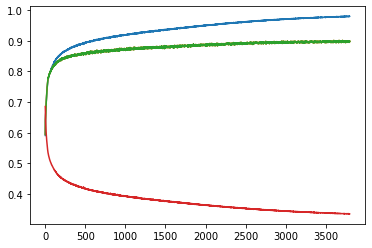

epoch: 0
train_acc: 0.9796354166666666
test_acc: 0.8975
f1: 0.8974874407299168

epoch: 1
train_acc: 0.9798263888888888
test_acc: 0.8980555555555556
f1: 0.8980478460648393

epoch: 2
train_acc: 0.9799826388888889
test_acc: 0.8991666666666667
f1: 0.8991602181762177

epoch: 3
train_acc: 0.9793055555555555
test_acc: 0.8972916666666667
f1: 0.8972858784990154

epoch: 4
train_acc: 0.9804166666666667
test_acc: 0.8990277777777778
f1: 0.8990174923001468

epoch: 5
train_acc: 0.9800868055555556
test_acc: 0.8984027777777778
f1: 0.8983861018891934

epoch: 6
train_acc: 0.9798958333333333
test_acc: 0.8978472222222222
f1: 0.8978329112788263

epoch: 7
train_acc: 0.9802256944444444
test_acc: 0.8959722222222222
f1: 0.8959650957826104

epoch: 8
train_acc: 0.9797395833333333
test_acc: 0.8991666666666667
f1: 0.8991626459530443

epoch: 9
train_acc: 0.98015625
test_acc: 0.8961805555555555
f1: 0.8961666882417917

epoch: 10
train_acc: 0.9800694444444444
test_acc: 0.895625
f1: 0.8956120493658942

epoch: 11
train_a

epoch: 91
train_acc: 0.9808506944444444
test_acc: 0.8983333333333333
f1: 0.8983178923166588

epoch: 92
train_acc: 0.9810069444444445
test_acc: 0.8970833333333333
f1: 0.897061952793603

epoch: 93
train_acc: 0.98078125
test_acc: 0.8979861111111112
f1: 0.8979769728379625

epoch: 94
train_acc: 0.9802777777777778
test_acc: 0.8988194444444444
f1: 0.898813309017731

epoch: 95
train_acc: 0.9807291666666667
test_acc: 0.8972916666666667
f1: 0.897285212701218

epoch: 96
train_acc: 0.9805208333333333
test_acc: 0.8955555555555555
f1: 0.8955443198732456

epoch: 97
train_acc: 0.9803125
test_acc: 0.8990277777777778
f1: 0.8990180533854836

epoch: 98
train_acc: 0.9806076388888889
test_acc: 0.8971527777777778
f1: 0.8971482080065466

epoch: 99
train_acc: 0.9803819444444445
test_acc: 0.9005555555555556
f1: 0.9005472926069545

epoch: 100
train_acc: 0.98078125
test_acc: 0.89625
f1: 0.8962331554524806

epoch: 101
train_acc: 0.9806076388888889
test_acc: 0.8961805555555555
f1: 0.896165317967897

epoch: 102
trai

epoch: 182
train_acc: 0.9813888888888889
test_acc: 0.8976388888888889
f1: 0.8976188386599948

epoch: 183
train_acc: 0.9806597222222222
test_acc: 0.8967361111111111
f1: 0.8967131831794688

epoch: 184
train_acc: 0.9811631944444444
test_acc: 0.8972222222222223
f1: 0.8972183044081278

epoch: 185
train_acc: 0.9811631944444444
test_acc: 0.8999305555555556
f1: 0.899926827372634

epoch: 186
train_acc: 0.9810416666666667
test_acc: 0.8989583333333333
f1: 0.8989517579665885

epoch: 187
train_acc: 0.9813541666666666
test_acc: 0.8994444444444445
f1: 0.8994382368209066

epoch: 188
train_acc: 0.9812847222222222
test_acc: 0.9007638888888889
f1: 0.9007506337776057

epoch: 189
train_acc: 0.9807291666666667
test_acc: 0.9005555555555556
f1: 0.9005510434513255

epoch: 190
train_acc: 0.9811111111111112
test_acc: 0.8984722222222222
f1: 0.8984640427777346

epoch: 191
train_acc: 0.9807291666666667
test_acc: 0.8959722222222222
f1: 0.8959526485567401

epoch: 192
train_acc: 0.9812152777777777
test_acc: 0.89659722

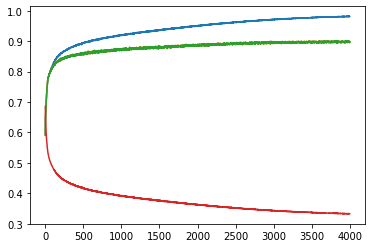

epoch: 0
train_acc: 0.9811805555555555
test_acc: 0.8990972222222222
f1: 0.899091103639508

epoch: 1
train_acc: 0.9809375
test_acc: 0.8997916666666667
f1: 0.8997766187548006

epoch: 2
train_acc: 0.98140625
test_acc: 0.8966666666666666
f1: 0.8966468268297396

epoch: 3
train_acc: 0.9813888888888889
test_acc: 0.8999305555555556
f1: 0.899924487504839

epoch: 4
train_acc: 0.9807638888888889
test_acc: 0.900625
f1: 0.9006211251466278

epoch: 5
train_acc: 0.9813020833333334
test_acc: 0.8973611111111112
f1: 0.8973465622347628

epoch: 6
train_acc: 0.9814930555555555
test_acc: 0.8983333333333333
f1: 0.8983109704740023

epoch: 7
train_acc: 0.9814930555555555
test_acc: 0.8971527777777778
f1: 0.8971430132033018

epoch: 8
train_acc: 0.9816319444444445
test_acc: 0.8979861111111112
f1: 0.8979846091050617

epoch: 9
train_acc: 0.98078125
test_acc: 0.8989583333333333
f1: 0.8989558320514699

epoch: 10
train_acc: 0.9811111111111112
test_acc: 0.8979166666666667
f1: 0.897889798808124

epoch: 11
train_acc: 0.98

epoch: 91
train_acc: 0.9819965277777778
test_acc: 0.8968055555555555
f1: 0.8967925906129873

epoch: 92
train_acc: 0.9817881944444444
test_acc: 0.8972222222222223
f1: 0.8972083279524048

epoch: 93
train_acc: 0.9816145833333333
test_acc: 0.8965277777777778
f1: 0.8965172376390776

epoch: 94
train_acc: 0.9813368055555556
test_acc: 0.8983333333333333
f1: 0.8983283281217039

epoch: 95
train_acc: 0.9819965277777778
test_acc: 0.8997916666666667
f1: 0.8997837187086735

epoch: 96
train_acc: 0.9813368055555556
test_acc: 0.8992361111111111
f1: 0.8992245301240698

epoch: 97
train_acc: 0.9815625
test_acc: 0.8975694444444444
f1: 0.8975499751188972

epoch: 98
train_acc: 0.9818055555555556
test_acc: 0.8950694444444445
f1: 0.8950518448049221

epoch: 99
train_acc: 0.98109375
test_acc: 0.8954861111111111
f1: 0.895471812233249

epoch: 100
train_acc: 0.9816493055555555
test_acc: 0.8965972222222223
f1: 0.8965843922194389

epoch: 101
train_acc: 0.9817013888888889
test_acc: 0.8986111111111111
f1: 0.89860216233

epoch: 182
train_acc: 0.9822395833333334
test_acc: 0.9002777777777777
f1: 0.9002741476605851

epoch: 183
train_acc: 0.98203125
test_acc: 0.9003472222222222
f1: 0.900346427813355

epoch: 184
train_acc: 0.9823090277777777
test_acc: 0.8988194444444444
f1: 0.8988164946857119

epoch: 185
train_acc: 0.9823611111111111
test_acc: 0.8980555555555556
f1: 0.8980411051154478

epoch: 186
train_acc: 0.9823611111111111
test_acc: 0.8988888888888888
f1: 0.8988777172010977

epoch: 187
train_acc: 0.9820659722222222
test_acc: 0.8972916666666667
f1: 0.8972807658830154

epoch: 188
train_acc: 0.9820659722222222
test_acc: 0.8979861111111112
f1: 0.8979811886860658

epoch: 189
train_acc: 0.9819618055555556
test_acc: 0.8970138888888889
f1: 0.8970052000202574

epoch: 190
train_acc: 0.9819965277777778
test_acc: 0.8983333333333333
f1: 0.8983248857378362

epoch: 191
train_acc: 0.9823611111111111
test_acc: 0.8992361111111111
f1: 0.8992257044420136

epoch: 192
train_acc: 0.9821527777777778
test_acc: 0.8982638888888889

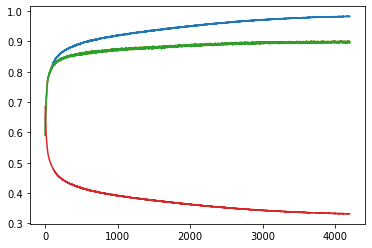

epoch: 0
train_acc: 0.9822916666666667
test_acc: 0.8974305555555555
f1: 0.8974106639467424

epoch: 1
train_acc: 0.9821875
test_acc: 0.8977777777777778
f1: 0.8977719090298457

epoch: 2
train_acc: 0.9830902777777778
test_acc: 0.8990972222222222
f1: 0.8990887091230169

epoch: 3
train_acc: 0.9824479166666666
test_acc: 0.8954166666666666
f1: 0.8954068790165707

epoch: 4
train_acc: 0.9822395833333334
test_acc: 0.8979166666666667
f1: 0.8979015110333798

epoch: 5
train_acc: 0.9824826388888889
test_acc: 0.8975
f1: 0.897490128471096

epoch: 6
train_acc: 0.9821354166666667
test_acc: 0.8965972222222223
f1: 0.8965874049019016

epoch: 7
train_acc: 0.9826909722222222
test_acc: 0.8986805555555556
f1: 0.8986727696879863

epoch: 8
train_acc: 0.9825
test_acc: 0.898125
f1: 0.8981181384753641

epoch: 9
train_acc: 0.9826736111111111
test_acc: 0.8995138888888888
f1: 0.8995029331268698

epoch: 10
train_acc: 0.9824826388888889
test_acc: 0.8982638888888889
f1: 0.8982555645826412

epoch: 11
train_acc: 0.98229166

epoch: 92
train_acc: 0.98265625
test_acc: 0.8967361111111111
f1: 0.8967263069772516

epoch: 93
train_acc: 0.9826041666666666
test_acc: 0.8952083333333334
f1: 0.8951915051984884

epoch: 94
train_acc: 0.9827430555555555
test_acc: 0.8979166666666667
f1: 0.8978907130344548

epoch: 95
train_acc: 0.9827604166666667
test_acc: 0.8991666666666667
f1: 0.8991499356871824

epoch: 96
train_acc: 0.9828472222222222
test_acc: 0.8969444444444444
f1: 0.8969339467492559

epoch: 97
train_acc: 0.9827777777777778
test_acc: 0.8949305555555556
f1: 0.8949184797227551

epoch: 98
train_acc: 0.9827256944444445
test_acc: 0.8984722222222222
f1: 0.8984571490685722

epoch: 99
train_acc: 0.9830729166666666
test_acc: 0.8981944444444444
f1: 0.8981764382223034

epoch: 100
train_acc: 0.9828472222222222
test_acc: 0.8972916666666667
f1: 0.8972832628107347

epoch: 101
train_acc: 0.9826388888888888
test_acc: 0.8970833333333333
f1: 0.8970765192962588

epoch: 102
train_acc: 0.9830208333333333
test_acc: 0.8988888888888888
f1: 0.

epoch: 182
train_acc: 0.9834201388888889
test_acc: 0.8984722222222222
f1: 0.8984507207059432

epoch: 183
train_acc: 0.98296875
test_acc: 0.8976388888888889
f1: 0.8976247171434609

epoch: 184
train_acc: 0.983125
test_acc: 0.8952777777777777
f1: 0.8952690762927985

epoch: 185
train_acc: 0.9834201388888889
test_acc: 0.8984722222222222
f1: 0.8984659545802247

epoch: 186
train_acc: 0.9834375
test_acc: 0.8979861111111112
f1: 0.8979663272429008

epoch: 187
train_acc: 0.9829513888888889
test_acc: 0.8964583333333334
f1: 0.8964493298968286

epoch: 188
train_acc: 0.9831944444444445
test_acc: 0.8986805555555556
f1: 0.8986762413163943

epoch: 189
train_acc: 0.98296875
test_acc: 0.8997916666666667
f1: 0.8997804472948557

epoch: 190
train_acc: 0.9836284722222223
test_acc: 0.8985416666666667
f1: 0.8985260825563389

epoch: 191
train_acc: 0.98359375
test_acc: 0.89875
f1: 0.8987305601597854

epoch: 192
train_acc: 0.983125
test_acc: 0.8969444444444444
f1: 0.8969269728511885

epoch: 193
train_acc: 0.983142

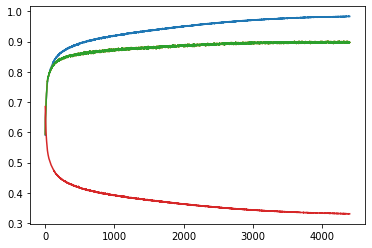

epoch: 0
train_acc: 0.9833159722222222
test_acc: 0.8981944444444444
f1: 0.8981816539963926

epoch: 1
train_acc: 0.9831770833333333
test_acc: 0.898125
f1: 0.8981183704034262

epoch: 2
train_acc: 0.98328125
test_acc: 0.8979166666666667
f1: 0.8979144866914633

epoch: 3
train_acc: 0.9833159722222222
test_acc: 0.8988888888888888
f1: 0.8988774187062705

epoch: 4
train_acc: 0.9833159722222222
test_acc: 0.8970833333333333
f1: 0.897052894943997

epoch: 5
train_acc: 0.9832465277777778
test_acc: 0.8974305555555555
f1: 0.8974114517530926

epoch: 6
train_acc: 0.9835763888888889
test_acc: 0.8983333333333333
f1: 0.8983261313020411

epoch: 7
train_acc: 0.9834895833333334
test_acc: 0.8995138888888888
f1: 0.8995084353296012

epoch: 8
train_acc: 0.9832986111111112
test_acc: 0.8985416666666667
f1: 0.8985345983099643

epoch: 9
train_acc: 0.9832638888888889
test_acc: 0.8970833333333333
f1: 0.8970762830105665

epoch: 10
train_acc: 0.9832465277777778
test_acc: 0.8999305555555556
f1: 0.8999215914632428

epoch:

epoch: 91
train_acc: 0.9836111111111111
test_acc: 0.8972916666666667
f1: 0.8972697065074842

epoch: 92
train_acc: 0.9834201388888889
test_acc: 0.8979166666666667
f1: 0.8978946317975841

epoch: 93
train_acc: 0.9838715277777778
test_acc: 0.8961805555555555
f1: 0.8961730783366908

epoch: 94
train_acc: 0.98375
test_acc: 0.9
f1: 0.8999956498233163

epoch: 95
train_acc: 0.9837847222222222
test_acc: 0.9001388888888889
f1: 0.9001315777830857

epoch: 96
train_acc: 0.9836458333333333
test_acc: 0.8968055555555555
f1: 0.8967964474186612

epoch: 97
train_acc: 0.9834201388888889
test_acc: 0.8952083333333334
f1: 0.8951939964518093

epoch: 98
train_acc: 0.9835416666666666
test_acc: 0.8977777777777778
f1: 0.8977670750343228

epoch: 99
train_acc: 0.9834027777777777
test_acc: 0.8975694444444444
f1: 0.8975675806253053

epoch: 100
train_acc: 0.9838020833333333
test_acc: 0.896875
f1: 0.8968687466652921

epoch: 101
train_acc: 0.98359375
test_acc: 0.898125
f1: 0.8981086402426658

epoch: 102
train_acc: 0.98371

epoch: 181
train_acc: 0.9840277777777777
test_acc: 0.9009027777777778
f1: 0.9008885659978778

epoch: 182
train_acc: 0.9841840277777778
test_acc: 0.9005555555555556
f1: 0.9005531633556056

epoch: 183
train_acc: 0.9844965277777777
test_acc: 0.8986805555555556
f1: 0.8986769528114608

epoch: 184
train_acc: 0.9839409722222222
test_acc: 0.8989583333333333
f1: 0.8989508144427686

epoch: 185
train_acc: 0.9839409722222222
test_acc: 0.8985416666666667
f1: 0.898510433124841

epoch: 186
train_acc: 0.9833333333333333
test_acc: 0.8984027777777778
f1: 0.898385737226738

epoch: 187
train_acc: 0.9841840277777778
test_acc: 0.9
f1: 0.8999965276103207

epoch: 188
train_acc: 0.9835069444444444
test_acc: 0.8996527777777777
f1: 0.8996511880348345

epoch: 189
train_acc: 0.9838888888888889
test_acc: 0.9013194444444445
f1: 0.9013125696088019

epoch: 190
train_acc: 0.9842361111111111
test_acc: 0.899375
f1: 0.8993648911376969

epoch: 191
train_acc: 0.98390625
test_acc: 0.8982638888888889
f1: 0.8982441588909802

e

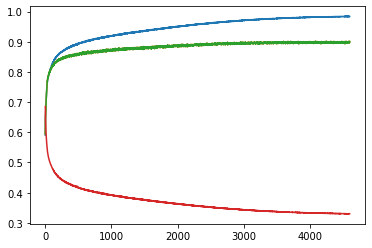

epoch: 0
train_acc: 0.9839583333333334
test_acc: 0.8979861111111112
f1: 0.8979772405220934

epoch: 1
train_acc: 0.9840625
test_acc: 0.8969444444444444
f1: 0.8969273447381397

epoch: 2
train_acc: 0.9840451388888889
test_acc: 0.8967361111111111
f1: 0.8967180377616665

epoch: 3
train_acc: 0.9839756944444444
test_acc: 0.8998611111111111
f1: 0.899853043560529

epoch: 4
train_acc: 0.9841145833333333
test_acc: 0.8968055555555555
f1: 0.8968008733021434

epoch: 5
train_acc: 0.9838020833333333
test_acc: 0.89875
f1: 0.8987385140616362

epoch: 6
train_acc: 0.9838194444444445
test_acc: 0.8995833333333333
f1: 0.8995719419294417

epoch: 7
train_acc: 0.9842708333333333
test_acc: 0.8985416666666667
f1: 0.898521595024216

epoch: 8
train_acc: 0.98421875
test_acc: 0.8984722222222222
f1: 0.8984600935628169

epoch: 9
train_acc: 0.9842013888888889
test_acc: 0.8986111111111111
f1: 0.898605073081309

epoch: 10
train_acc: 0.9842534722222223
test_acc: 0.8998611111111111
f1: 0.8998540173070649

epoch: 11
train_ac

epoch: 90
train_acc: 0.9846875
test_acc: 0.8984722222222222
f1: 0.8984613003023171

epoch: 91
train_acc: 0.9841840277777778
test_acc: 0.8972916666666667
f1: 0.8972744397527993

epoch: 92
train_acc: 0.9843055555555555
test_acc: 0.8986111111111111
f1: 0.8985964009563392

epoch: 93
train_acc: 0.9846527777777778
test_acc: 0.8978472222222222
f1: 0.8978372437009601

epoch: 94
train_acc: 0.9844097222222222
test_acc: 0.9002083333333334
f1: 0.9002024977568519

epoch: 95
train_acc: 0.9846875
test_acc: 0.8990277777777778
f1: 0.8990185988786953

epoch: 96
train_acc: 0.9839236111111112
test_acc: 0.8961111111111111
f1: 0.8961042327039157

epoch: 97
train_acc: 0.98484375
test_acc: 0.8981944444444444
f1: 0.8981862426211757

epoch: 98
train_acc: 0.9844097222222222
test_acc: 0.8994444444444445
f1: 0.8994330372848075

epoch: 99
train_acc: 0.9843402777777778
test_acc: 0.8961111111111111
f1: 0.8961008191806253

epoch: 100
train_acc: 0.9843923611111111
test_acc: 0.8988888888888888
f1: 0.89887711630763

epoc

epoch: 181
train_acc: 0.9848090277777778
test_acc: 0.89875
f1: 0.8987369608982886

epoch: 182
train_acc: 0.9850520833333334
test_acc: 0.899375
f1: 0.8993562583549298

epoch: 183
train_acc: 0.9847569444444444
test_acc: 0.8970138888888889
f1: 0.8970007886616255

epoch: 184
train_acc: 0.9845486111111111
test_acc: 0.8995833333333333
f1: 0.899577779412626

epoch: 185
train_acc: 0.9846180555555556
test_acc: 0.8996527777777777
f1: 0.8996435216179474

epoch: 186
train_acc: 0.9847395833333333
test_acc: 0.8978472222222222
f1: 0.8978335775275422

epoch: 187
train_acc: 0.9848958333333333
test_acc: 0.8989583333333333
f1: 0.8989457962923327

epoch: 188
train_acc: 0.9846701388888889
test_acc: 0.8963888888888889
f1: 0.896377440978048

epoch: 189
train_acc: 0.9845486111111111
test_acc: 0.8975694444444444
f1: 0.8975645019141912

epoch: 190
train_acc: 0.9846527777777778
test_acc: 0.8986805555555556
f1: 0.8986703769288475

epoch: 191
train_acc: 0.9849826388888889
test_acc: 0.8975
f1: 0.897475287664904

ep

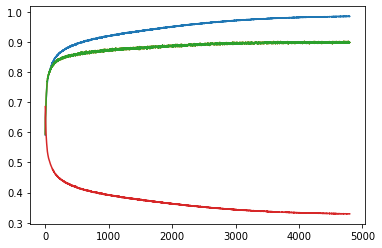

epoch: 0
train_acc: 0.9849131944444445
test_acc: 0.8986111111111111
f1: 0.898605073081309

epoch: 1
train_acc: 0.9847916666666666
test_acc: 0.8997222222222222
f1: 0.8997044862162389

epoch: 2
train_acc: 0.9845138888888889
test_acc: 0.8986805555555556
f1: 0.8986554663954226

epoch: 3
train_acc: 0.9849479166666667
test_acc: 0.8972222222222223
f1: 0.8972073105584809

epoch: 4
train_acc: 0.9849131944444445
test_acc: 0.8965972222222223
f1: 0.8965926277662041

epoch: 5
train_acc: 0.9847916666666666
test_acc: 0.9006944444444445
f1: 0.9006895554740687

epoch: 6
train_acc: 0.9850868055555555
test_acc: 0.8990277777777778
f1: 0.8990188657784208

epoch: 7
train_acc: 0.9849826388888889
test_acc: 0.8984722222222222
f1: 0.8984574919165534

epoch: 8
train_acc: 0.9847048611111111
test_acc: 0.8991666666666667
f1: 0.8991543116123571

epoch: 9
train_acc: 0.9848784722222222
test_acc: 0.9006944444444445
f1: 0.9006895554740687

epoch: 10
train_acc: 0.9850868055555555
test_acc: 0.8998611111111111
f1: 0.899857

epoch: 90
train_acc: 0.9853819444444445
test_acc: 0.8972916666666667
f1: 0.8972688620863715

epoch: 91
train_acc: 0.9850173611111112
test_acc: 0.8997222222222222
f1: 0.899705221561399

epoch: 92
train_acc: 0.9851736111111111
test_acc: 0.8959722222222222
f1: 0.895967100769339

epoch: 93
train_acc: 0.9846875
test_acc: 0.8968055555555555
f1: 0.8968008733021434

epoch: 94
train_acc: 0.9849826388888889
test_acc: 0.8997222222222222
f1: 0.8997164651080822

epoch: 95
train_acc: 0.9851909722222222
test_acc: 0.8975
f1: 0.8974880657074602

epoch: 96
train_acc: 0.9852604166666666
test_acc: 0.8978472222222222
f1: 0.8978232516124041

epoch: 97
train_acc: 0.9850173611111112
test_acc: 0.8985416666666667
f1: 0.8985325781594712

epoch: 98
train_acc: 0.9852430555555556
test_acc: 0.9009027777777778
f1: 0.9008913883439336

epoch: 99
train_acc: 0.98546875
test_acc: 0.8981944444444444
f1: 0.8981857240659826

epoch: 100
train_acc: 0.9851388888888889
test_acc: 0.8974305555555555
f1: 0.8974196695126531

epoch: 

epoch: 180
train_acc: 0.9852256944444444
test_acc: 0.8985416666666667
f1: 0.8985271162739309

epoch: 181
train_acc: 0.9851215277777777
test_acc: 0.9006944444444445
f1: 0.9006876415014239

epoch: 182
train_acc: 0.9852777777777778
test_acc: 0.9004166666666666
f1: 0.9004078772532706

epoch: 183
train_acc: 0.9848090277777778
test_acc: 0.8986805555555556
f1: 0.8986601125023584

epoch: 184
train_acc: 0.9852604166666666
test_acc: 0.9003472222222222
f1: 0.9003278962515742

epoch: 185
train_acc: 0.9853298611111111
test_acc: 0.8991666666666667
f1: 0.8991563953368727

epoch: 186
train_acc: 0.9852256944444444
test_acc: 0.8980555555555556
f1: 0.8980514905365489

epoch: 187
train_acc: 0.9855902777777777
test_acc: 0.8972916666666667
f1: 0.8972845112254876

epoch: 188
train_acc: 0.98546875
test_acc: 0.8988888888888888
f1: 0.8988735322493546

epoch: 189
train_acc: 0.9855555555555555
test_acc: 0.8988194444444444
f1: 0.8988021067047308

epoch: 190
train_acc: 0.9856076388888889
test_acc: 0.899513888888888

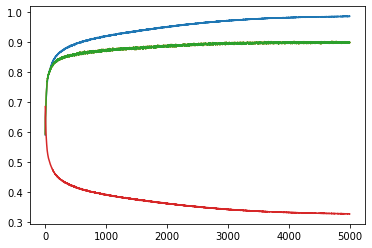

epoch: 0
train_acc: 0.9852777777777778
test_acc: 0.8992361111111111
f1: 0.8992219947420647

epoch: 1
train_acc: 0.9851041666666667
test_acc: 0.8996527777777777
f1: 0.8996471226714517

epoch: 2
train_acc: 0.9851041666666667
test_acc: 0.8977083333333333
f1: 0.8977009661471208

epoch: 3
train_acc: 0.9853472222222223
test_acc: 0.8989583333333333
f1: 0.8989431602829071

epoch: 4
train_acc: 0.9853819444444445
test_acc: 0.8993055555555556
f1: 0.8992858317890045

epoch: 5
train_acc: 0.9848611111111111
test_acc: 0.8994444444444445
f1: 0.899427396690378

epoch: 6
train_acc: 0.9850868055555555
test_acc: 0.8983333333333333
f1: 0.8983287203999583

epoch: 7
train_acc: 0.98546875
test_acc: 0.8970833333333333
f1: 0.8970797596656218

epoch: 8
train_acc: 0.9852951388888889
test_acc: 0.8981944444444444
f1: 0.8981834926424055

epoch: 9
train_acc: 0.9852083333333334
test_acc: 0.9003472222222222
f1: 0.9003193952040243

epoch: 10
train_acc: 0.9853993055555555
test_acc: 0.9008333333333334
f1: 0.90081992724056

epoch: 91
train_acc: 0.9856597222222222
test_acc: 0.8982638888888889
f1: 0.8982527968423387

epoch: 92
train_acc: 0.98578125
test_acc: 0.8990972222222222
f1: 0.8990873658038715

epoch: 93
train_acc: 0.9854166666666667
test_acc: 0.8964583333333334
f1: 0.896443484164566

epoch: 94
train_acc: 0.9858333333333333
test_acc: 0.8980555555555556
f1: 0.898040764797196

epoch: 95
train_acc: 0.9855381944444445
test_acc: 0.8978472222222222
f1: 0.8978245409932742

epoch: 96
train_acc: 0.985625
test_acc: 0.8981944444444444
f1: 0.8981800136915848

epoch: 97
train_acc: 0.9855555555555555
test_acc: 0.8976388888888889
f1: 0.897628748310322

epoch: 98
train_acc: 0.9854166666666667
test_acc: 0.9000694444444445
f1: 0.9000617653056973

epoch: 99
train_acc: 0.9852430555555556
test_acc: 0.8973611111111112
f1: 0.8973560580354363

epoch: 100
train_acc: 0.9856944444444444
test_acc: 0.8986805555555556
f1: 0.8986692117832256

epoch: 101
train_acc: 0.9860590277777778
test_acc: 0.8963888888888889
f1: 0.89637521584198

epoch: 180
train_acc: 0.9858506944444444
test_acc: 0.8989583333333333
f1: 0.8989371390294824

epoch: 181
train_acc: 0.9857465277777778
test_acc: 0.8985416666666667
f1: 0.898529077926528

epoch: 182
train_acc: 0.9860243055555555
test_acc: 0.900625
f1: 0.9006211251466278

epoch: 183
train_acc: 0.9857638888888889
test_acc: 0.8992361111111111
f1: 0.899232858587426

epoch: 184
train_acc: 0.9861805555555555
test_acc: 0.9003472222222222
f1: 0.9003345460077089

epoch: 185
train_acc: 0.9859722222222222
test_acc: 0.8983333333333333
f1: 0.8983182395597742

epoch: 186
train_acc: 0.9855381944444445
test_acc: 0.8999305555555556
f1: 0.8999099668808577

epoch: 187
train_acc: 0.9857986111111111
test_acc: 0.9004166666666666
f1: 0.9004022184735552

epoch: 188
train_acc: 0.9860243055555555
test_acc: 0.8988888888888888
f1: 0.8988777172010977

epoch: 189
train_acc: 0.9857465277777778
test_acc: 0.9
f1: 0.899997453608607

epoch: 190
train_acc: 0.9859895833333333
test_acc: 0.8972222222222223
f1: 0.897218986481

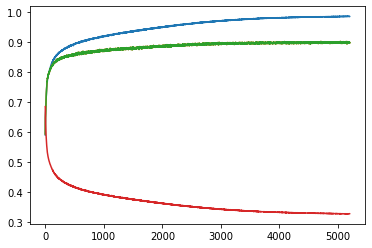

epoch: 0
train_acc: 0.9858854166666666
test_acc: 0.9000694444444445
f1: 0.9000519544983443

epoch: 1
train_acc: 0.9863715277777778
test_acc: 0.8991666666666667
f1: 0.8991572299681677

epoch: 2
train_acc: 0.9860416666666667
test_acc: 0.8986805555555556
f1: 0.8986771209103107

epoch: 3
train_acc: 0.9856770833333334
test_acc: 0.8989583333333333
f1: 0.8989503192800554

epoch: 4
train_acc: 0.9857465277777778
test_acc: 0.8986805555555556
f1: 0.8986612974226922

epoch: 5
train_acc: 0.9858506944444444
test_acc: 0.8978472222222222
f1: 0.8978281960249147

epoch: 6
train_acc: 0.9860763888888889
test_acc: 0.898125
f1: 0.8981196793994983

epoch: 7
train_acc: 0.9861979166666667
test_acc: 0.9009027777777778
f1: 0.9008987378709861

epoch: 8
train_acc: 0.9861284722222222
test_acc: 0.9006944444444445
f1: 0.9006874096734417

epoch: 9
train_acc: 0.9858333333333333
test_acc: 0.8997222222222222
f1: 0.8997080080290917

epoch: 10
train_acc: 0.9857465277777778
test_acc: 0.8997222222222222
f1: 0.899708008029091

epoch: 91
train_acc: 0.9860590277777778
test_acc: 0.8996527777777777
f1: 0.8996453105634371

epoch: 92
train_acc: 0.9860763888888889
test_acc: 0.8984722222222222
f1: 0.8984681738177346

epoch: 93
train_acc: 0.9862673611111111
test_acc: 0.8986805555555556
f1: 0.8986642850129852

epoch: 94
train_acc: 0.9860416666666667
test_acc: 0.8971527777777778
f1: 0.8971320264674385

epoch: 95
train_acc: 0.9863541666666666
test_acc: 0.89875
f1: 0.8987366385372714

epoch: 96
train_acc: 0.9860069444444445
test_acc: 0.8960416666666666
f1: 0.8960246032317993

epoch: 97
train_acc: 0.98625
test_acc: 0.8993055555555556
f1: 0.8992916145576788

epoch: 98
train_acc: 0.9863368055555556
test_acc: 0.8979166666666667
f1: 0.8979094351188527

epoch: 99
train_acc: 0.9861458333333334
test_acc: 0.8975694444444444
f1: 0.8975564148859727

epoch: 100
train_acc: 0.9860763888888889
test_acc: 0.8982638888888889
f1: 0.8982572683306201

epoch: 101
train_acc: 0.9856076388888889
test_acc: 0.8988194444444444
f1: 0.898816795282503

epoch: 182
train_acc: 0.9859201388888889
test_acc: 0.9004861111111111
f1: 0.9004752613481717

epoch: 183
train_acc: 0.9860763888888889
test_acc: 0.8988194444444444
f1: 0.8988130864811863

epoch: 184
train_acc: 0.98640625
test_acc: 0.9008333333333334
f1: 0.9008293790777874

epoch: 185
train_acc: 0.9864756944444445
test_acc: 0.8991666666666667
f1: 0.8991476940616733

epoch: 186
train_acc: 0.9862326388888889
test_acc: 0.8995138888888888
f1: 0.8994919927305923

epoch: 187
train_acc: 0.9863888888888889
test_acc: 0.8958333333333334
f1: 0.8958133334977214

epoch: 188
train_acc: 0.9862673611111111
test_acc: 0.8993055555555556
f1: 0.8992941326401732

epoch: 189
train_acc: 0.9859895833333333
test_acc: 0.8998611111111111
f1: 0.8998579584504167

epoch: 190
train_acc: 0.9864930555555556
test_acc: 0.9009027777777778
f1: 0.9008872121290246

epoch: 191
train_acc: 0.9860243055555555
test_acc: 0.8980555555555556
f1: 0.8980331315955159

epoch: 192
train_acc: 0.9864409722222223
test_acc: 0.900694444444444

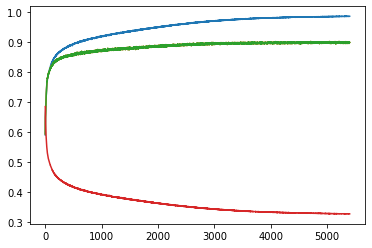

epoch: 0
train_acc: 0.9864236111111111
test_acc: 0.8984027777777778
f1: 0.8983952175462341

epoch: 1
train_acc: 0.98640625
test_acc: 0.8990277777777778
f1: 0.8990206249406884

epoch: 2
train_acc: 0.9866666666666667
test_acc: 0.9
f1: 0.8999895299248811

epoch: 3
train_acc: 0.9866145833333333
test_acc: 0.8983333333333333
f1: 0.898320240572767

epoch: 4
train_acc: 0.9862673611111111
test_acc: 0.9005555555555556
f1: 0.900546515539403

epoch: 5
train_acc: 0.9866666666666667
test_acc: 0.9014583333333334
f1: 0.9014425088645827

epoch: 6
train_acc: 0.9863715277777778
test_acc: 0.9025
f1: 0.9024911367439397

epoch: 7
train_acc: 0.9865277777777778
test_acc: 0.8984722222222222
f1: 0.8984647890951817

epoch: 8
train_acc: 0.9866319444444445
test_acc: 0.9005555555555556
f1: 0.9005457039215612

epoch: 9
train_acc: 0.9861979166666667
test_acc: 0.9002083333333334
f1: 0.9001953236602948

epoch: 10
train_acc: 0.9864583333333333
test_acc: 0.8985416666666667
f1: 0.8985293911569956

epoch: 11
train_acc: 0.9

epoch: 91
train_acc: 0.9867361111111111
test_acc: 0.899375
f1: 0.8993659861417342

epoch: 92
train_acc: 0.9863888888888889
test_acc: 0.9022222222222223
f1: 0.9022052887826227

epoch: 93
train_acc: 0.9864583333333333
test_acc: 0.8993055555555556
f1: 0.8992952983735989

epoch: 94
train_acc: 0.9866666666666667
test_acc: 0.8999305555555556
f1: 0.8999107586789153

epoch: 95
train_acc: 0.9866666666666667
test_acc: 0.8994444444444445
f1: 0.8994347601803165

epoch: 96
train_acc: 0.9865798611111111
test_acc: 0.9007638888888889
f1: 0.9007512656759694

epoch: 97
train_acc: 0.9861805555555555
test_acc: 0.8979861111111112
f1: 0.8979740793911819

epoch: 98
train_acc: 0.9865277777777778
test_acc: 0.8988888888888888
f1: 0.8988731829989915

epoch: 99
train_acc: 0.9864583333333333
test_acc: 0.9000694444444445
f1: 0.900053042117942

epoch: 100
train_acc: 0.9869444444444444
test_acc: 0.8995833333333333
f1: 0.8995704015493313

epoch: 101
train_acc: 0.9865798611111111
test_acc: 0.8998611111111111
f1: 0.8998

epoch: 181
train_acc: 0.9865451388888888
test_acc: 0.8986111111111111
f1: 0.898591644604449

epoch: 182
train_acc: 0.9869097222222222
test_acc: 0.8979861111111112
f1: 0.8979746895884567

epoch: 183
train_acc: 0.9869097222222222
test_acc: 0.9000694444444445
f1: 0.9000557726270069

epoch: 184
train_acc: 0.9867708333333334
test_acc: 0.8974305555555555
f1: 0.8974210944150229

epoch: 185
train_acc: 0.9868402777777778
test_acc: 0.8994444444444445
f1: 0.8994347601803165

epoch: 186
train_acc: 0.9865104166666666
test_acc: 0.8995833333333333
f1: 0.8995687642348403

epoch: 187
train_acc: 0.9868229166666667
test_acc: 0.8992361111111111
f1: 0.8992202836714888

epoch: 188
train_acc: 0.9867013888888889
test_acc: 0.8990972222222222
f1: 0.8990827515030949

epoch: 189
train_acc: 0.9867361111111111
test_acc: 0.8998611111111111
f1: 0.8998555725539464

epoch: 190
train_acc: 0.9865625
test_acc: 0.8966666666666666
f1: 0.8966555505128919

epoch: 191
train_acc: 0.9865625
test_acc: 0.9001388888888889
f1: 0.900

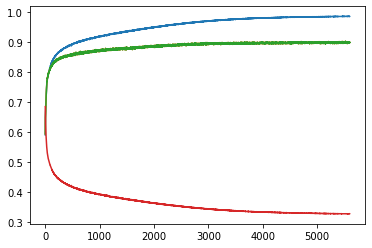

epoch: 0
train_acc: 0.9867881944444444
test_acc: 0.8994444444444445
f1: 0.89942702994122

epoch: 1
train_acc: 0.9868923611111111
test_acc: 0.8990972222222222
f1: 0.8990850139295786

epoch: 2
train_acc: 0.9864409722222223
test_acc: 0.8986111111111111
f1: 0.8985879640277684

epoch: 3
train_acc: 0.9867013888888889
test_acc: 0.8993055555555556
f1: 0.8992964019079148

epoch: 4
train_acc: 0.9868229166666667
test_acc: 0.8985416666666667
f1: 0.8985363678273123

epoch: 5
train_acc: 0.9866666666666667
test_acc: 0.8997222222222222
f1: 0.899712564710205

epoch: 6
train_acc: 0.9866666666666667
test_acc: 0.9031944444444444
f1: 0.9031783817823225

epoch: 7
train_acc: 0.9864583333333333
test_acc: 0.8976388888888889
f1: 0.8976159485398982

epoch: 8
train_acc: 0.9869270833333333
test_acc: 0.8980555555555556
f1: 0.8980367614511637

epoch: 9
train_acc: 0.9867013888888889
test_acc: 0.8999305555555556
f1: 0.899911917384026

epoch: 10
train_acc: 0.9871006944444445
test_acc: 0.8986111111111111
f1: 0.898597404

epoch: 91
train_acc: 0.9868229166666667
test_acc: 0.8988888888888888
f1: 0.8988731829989915

epoch: 92
train_acc: 0.9866840277777778
test_acc: 0.9004861111111111
f1: 0.9004728188966472

epoch: 93
train_acc: 0.9868923611111111
test_acc: 0.8995138888888888
f1: 0.8995064113393033

epoch: 94
train_acc: 0.9867361111111111
test_acc: 0.9004861111111111
f1: 0.9004782182325218

epoch: 95
train_acc: 0.98671875
test_acc: 0.9003472222222222
f1: 0.9003234112727677

epoch: 96
train_acc: 0.9865798611111111
test_acc: 0.8977083333333333
f1: 0.8976802432911819

epoch: 97
train_acc: 0.9870833333333333
test_acc: 0.898125
f1: 0.8980997732707916

epoch: 98
train_acc: 0.9870486111111111
test_acc: 0.8991666666666667
f1: 0.8991639531636798

epoch: 99
train_acc: 0.9866493055555555
test_acc: 0.8986111111111111
f1: 0.8986031952018242

epoch: 100
train_acc: 0.9871527777777778
test_acc: 0.899375
f1: 0.8993566389604863

epoch: 101
train_acc: 0.9866493055555555
test_acc: 0.8976388888888889
f1: 0.8976176237636778

epo

epoch: 182
train_acc: 0.9872048611111112
test_acc: 0.8990277777777778
f1: 0.8990110237528673

epoch: 183
train_acc: 0.9869097222222222
test_acc: 0.9009722222222222
f1: 0.9009508469002415

epoch: 184
train_acc: 0.9871875
test_acc: 0.8977777777777778
f1: 0.8977573542869868

epoch: 185
train_acc: 0.9871875
test_acc: 0.9027083333333333
f1: 0.9026962615845762

epoch: 186
train_acc: 0.9868923611111111
test_acc: 0.8990277777777778
f1: 0.8990231963535106

epoch: 187
train_acc: 0.9871006944444445
test_acc: 0.9002777777777777
f1: 0.9002692358518084

epoch: 188
train_acc: 0.9871875
test_acc: 0.9005555555555556
f1: 0.9005340902953334

epoch: 189
train_acc: 0.9869097222222222
test_acc: 0.9009027777777778
f1: 0.900877362898594

epoch: 190
train_acc: 0.9868055555555556
test_acc: 0.9011111111111111
f1: 0.9010913536037156

epoch: 191
train_acc: 0.9867534722222222
test_acc: 0.9011805555555555
f1: 0.9011717034366376

epoch: 192
train_acc: 0.986875
test_acc: 0.89875
f1: 0.898739969495556

epoch: 193
train

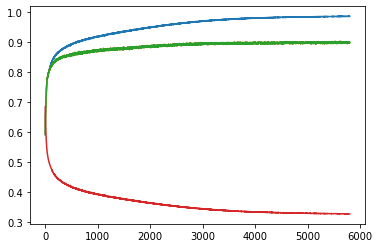

epoch: 0
train_acc: 0.9872569444444445
test_acc: 0.9003472222222222
f1: 0.9003329307687137

epoch: 1
train_acc: 0.9871875
test_acc: 0.9027083333333333
f1: 0.9026962615845762

epoch: 2
train_acc: 0.9870659722222223
test_acc: 0.9009722222222222
f1: 0.9009621348143118

epoch: 3
train_acc: 0.9870833333333333
test_acc: 0.9011111111111111
f1: 0.9010905673266466

epoch: 4
train_acc: 0.9870486111111111
test_acc: 0.8985416666666667
f1: 0.8985235334075181

epoch: 5
train_acc: 0.9871701388888889
test_acc: 0.9010416666666666
f1: 0.9010314464713091

epoch: 6
train_acc: 0.9868576388888889
test_acc: 0.8996527777777777
f1: 0.8996455506331225

epoch: 7
train_acc: 0.98703125
test_acc: 0.8965277777777778
f1: 0.8965087020178707

epoch: 8
train_acc: 0.9870659722222223
test_acc: 0.8979166666666667
f1: 0.897898611314315

epoch: 9
train_acc: 0.9871180555555555
test_acc: 0.9013194444444445
f1: 0.9012999223336147

epoch: 10
train_acc: 0.9869618055555556
test_acc: 0.9000694444444445
f1: 0.900053042117942

epoch:

epoch: 91
train_acc: 0.9872569444444445
test_acc: 0.9006944444444445
f1: 0.9006790190168669

epoch: 92
train_acc: 0.9872048611111112
test_acc: 0.9000694444444445
f1: 0.9000564166646934

epoch: 93
train_acc: 0.9873263888888889
test_acc: 0.9002083333333334
f1: 0.9001926586050514

epoch: 94
train_acc: 0.9871527777777778
test_acc: 0.9015972222222223
f1: 0.9015884074277692

epoch: 95
train_acc: 0.9871527777777778
test_acc: 0.8979166666666667
f1: 0.8979004532076764

epoch: 96
train_acc: 0.9873611111111111
test_acc: 0.8996527777777777
f1: 0.8996359468849189

epoch: 97
train_acc: 0.9874479166666666
test_acc: 0.9000694444444445
f1: 0.9000492816250129

epoch: 98
train_acc: 0.9872916666666667
test_acc: 0.8989583333333333
f1: 0.8989417486321096

epoch: 99
train_acc: 0.98734375
test_acc: 0.8991666666666667
f1: 0.8991572299681677

epoch: 100
train_acc: 0.9870486111111111
test_acc: 0.9017361111111111
f1: 0.9017287989254417

epoch: 101
train_acc: 0.9872916666666667
test_acc: 0.8979861111111112
f1: 0.8

epoch: 181
train_acc: 0.9872743055555555
test_acc: 0.8986805555555556
f1: 0.8986642850129852

epoch: 182
train_acc: 0.9876388888888888
test_acc: 0.8986111111111111
f1: 0.8985896390086708

epoch: 183
train_acc: 0.9878298611111112
test_acc: 0.8980555555555556
f1: 0.898029637234408

epoch: 184
train_acc: 0.9870833333333333
test_acc: 0.8988194444444444
f1: 0.8988065738907539

epoch: 185
train_acc: 0.9874305555555556
test_acc: 0.8975694444444444
f1: 0.8975627786946515

epoch: 186
train_acc: 0.9873090277777777
test_acc: 0.901875
f1: 0.9018643016643172

epoch: 187
train_acc: 0.9873263888888889
test_acc: 0.8996527777777777
f1: 0.8996366633610444

epoch: 188
train_acc: 0.9873263888888889
test_acc: 0.899375
f1: 0.8993550932170358

epoch: 189
train_acc: 0.9876736111111111
test_acc: 0.8989583333333333
f1: 0.8989476094386664

epoch: 190
train_acc: 0.9874652777777778
test_acc: 0.903125
f1: 0.903119334983165

epoch: 191
train_acc: 0.9875520833333333
test_acc: 0.9013888888888889
f1: 0.9013816692990135

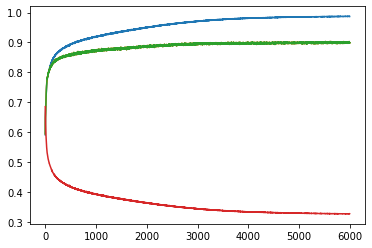

epoch: 0
train_acc: 0.9876388888888888
test_acc: 0.89875
f1: 0.898747968687305

epoch: 1
train_acc: 0.9875868055555556
test_acc: 0.9004861111111111
f1: 0.9004761138718562

epoch: 2
train_acc: 0.9874305555555556
test_acc: 0.8998611111111111
f1: 0.8998437687674306

epoch: 3
train_acc: 0.9875347222222223
test_acc: 0.8991666666666667
f1: 0.8991513522157025

epoch: 4
train_acc: 0.9871875
test_acc: 0.8995138888888888
f1: 0.8995073496753633

epoch: 5
train_acc: 0.9872916666666667
test_acc: 0.899375
f1: 0.8993699465793727

epoch: 6
train_acc: 0.9873263888888889
test_acc: 0.8994444444444445
f1: 0.89943867138262

epoch: 7
train_acc: 0.9874305555555556
test_acc: 0.8946527777777777
f1: 0.8946323474659501

epoch: 8
train_acc: 0.9872222222222222
test_acc: 0.8986111111111111
f1: 0.898591644604449

epoch: 9
train_acc: 0.9873611111111111
test_acc: 0.9002777777777777
f1: 0.9002619393239613

epoch: 10
train_acc: 0.9872569444444445
test_acc: 0.9007638888888889
f1: 0.9007567417679806

epoch: 11
train_acc: 

epoch: 91
train_acc: 0.9876215277777778
test_acc: 0.9013888888888889
f1: 0.9013809444216025

epoch: 92
train_acc: 0.98765625
test_acc: 0.9013194444444445
f1: 0.9013106047670147

epoch: 93
train_acc: 0.9875868055555556
test_acc: 0.9005555555555556
f1: 0.9005445680164644

epoch: 94
train_acc: 0.9876736111111111
test_acc: 0.8988888888888888
f1: 0.8988796973640855

epoch: 95
train_acc: 0.98734375
test_acc: 0.8982638888888889
f1: 0.8982530912904784

epoch: 96
train_acc: 0.9876909722222222
test_acc: 0.8972222222222223
f1: 0.8972066124512671

epoch: 97
train_acc: 0.9878819444444444
test_acc: 0.9008333333333334
f1: 0.9008253441084849

epoch: 98
train_acc: 0.9871875
test_acc: 0.8982638888888889
f1: 0.8982545046161196

epoch: 99
train_acc: 0.9876736111111111
test_acc: 0.9002083333333334
f1: 0.900197160611717

epoch: 100
train_acc: 0.9877256944444445
test_acc: 0.8979166666666667
f1: 0.8978911642303659

epoch: 101
train_acc: 0.9876909722222222
test_acc: 0.8982638888888889
f1: 0.8982413001734512

e

epoch: 182
train_acc: 0.98765625
test_acc: 0.8997916666666667
f1: 0.8997813173741045

epoch: 183
train_acc: 0.9875694444444445
test_acc: 0.8988888888888888
f1: 0.8988832965593245

epoch: 184
train_acc: 0.9875520833333333
test_acc: 0.9007638888888889
f1: 0.9007442568717349

epoch: 185
train_acc: 0.9874305555555556
test_acc: 0.9006944444444445
f1: 0.9006726009411361

epoch: 186
train_acc: 0.9877256944444445
test_acc: 0.9039583333333333
f1: 0.9039370089692034

epoch: 187
train_acc: 0.9875868055555556
test_acc: 0.9013888888888889
f1: 0.9013816692990135

epoch: 188
train_acc: 0.9873784722222222
test_acc: 0.9022222222222223
f1: 0.9022197324173047

epoch: 189
train_acc: 0.98765625
test_acc: 0.9017361111111111
f1: 0.9017321051769063

epoch: 190
train_acc: 0.9875347222222223
test_acc: 0.8986111111111111
f1: 0.898605073081309

epoch: 191
train_acc: 0.9875520833333333
test_acc: 0.8999305555555556
f1: 0.8999175096690917

epoch: 192
train_acc: 0.9875868055555556
test_acc: 0.899375
f1: 0.89935954389

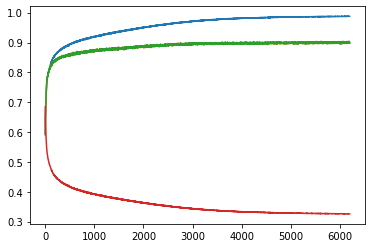

epoch: 0
train_acc: 0.98765625
test_acc: 0.8977083333333333
f1: 0.8977007214255658

epoch: 1
train_acc: 0.9877951388888889
test_acc: 0.8986111111111111
f1: 0.8986039287575

epoch: 2
train_acc: 0.9877777777777778
test_acc: 0.8994444444444445
f1: 0.8994288248506456

epoch: 3
train_acc: 0.98765625
test_acc: 0.8983333333333333
f1: 0.8983130208397748

epoch: 4
train_acc: 0.9876215277777778
test_acc: 0.9002777777777777
f1: 0.9002673367862009

epoch: 5
train_acc: 0.9875347222222223
test_acc: 0.8989583333333333
f1: 0.8989517579665885

epoch: 6
train_acc: 0.9878125
test_acc: 0.9023611111111111
f1: 0.9023546465118353

epoch: 7
train_acc: 0.9877430555555555
test_acc: 0.8968055555555555
f1: 0.8967969810153174

epoch: 8
train_acc: 0.9875
test_acc: 0.90125
f1: 0.9012425320873308

epoch: 9
train_acc: 0.9876909722222222
test_acc: 0.8995138888888888
f1: 0.8994932144875788

epoch: 10
train_acc: 0.9877777777777778
test_acc: 0.9008333333333334
f1: 0.9008161593619214

epoch: 11
train_acc: 0.987673611111111

epoch: 91
train_acc: 0.9876736111111111
test_acc: 0.9007638888888889
f1: 0.9007518822473285

epoch: 92
train_acc: 0.9877951388888889
test_acc: 0.8990972222222222
f1: 0.8990856252724145

epoch: 93
train_acc: 0.9878819444444444
test_acc: 0.9022916666666667
f1: 0.902275278385523

epoch: 94
train_acc: 0.9874479166666666
test_acc: 0.8999305555555556
f1: 0.899923348416837

epoch: 95
train_acc: 0.98765625
test_acc: 0.901875
f1: 0.9018676981495755

epoch: 96
train_acc: 0.9874479166666666
test_acc: 0.9001388888888889
f1: 0.9001320478874458

epoch: 97
train_acc: 0.9876909722222222
test_acc: 0.9
f1: 0.8999784148221232

epoch: 98
train_acc: 0.9876041666666666
test_acc: 0.9004166666666666
f1: 0.9003979292592559

epoch: 99
train_acc: 0.9876041666666666
test_acc: 0.9013194444444445
f1: 0.9013018076468744

epoch: 100
train_acc: 0.9880555555555556
test_acc: 0.8996527777777777
f1: 0.8996426968212368

epoch: 101
train_acc: 0.9876736111111111
test_acc: 0.9020138888888889
f1: 0.9020107260281588

epoch: 102

epoch: 182
train_acc: 0.9878993055555556
test_acc: 0.8975
f1: 0.8974743934721224

epoch: 183
train_acc: 0.9878993055555556
test_acc: 0.9014583333333334
f1: 0.9014421589752326

epoch: 184
train_acc: 0.9877430555555555
test_acc: 0.9006944444444445
f1: 0.9006843287408596

epoch: 185
train_acc: 0.9878472222222222
test_acc: 0.9013888888888889
f1: 0.9013845991313256

epoch: 186
train_acc: 0.9876041666666666
test_acc: 0.8986805555555556
f1: 0.8986760536674893

epoch: 187
train_acc: 0.9877430555555555
test_acc: 0.8994444444444445
f1: 0.8994288248506456

epoch: 188
train_acc: 0.98796875
test_acc: 0.8984722222222222
f1: 0.8984450400725743

epoch: 189
train_acc: 0.9877604166666667
test_acc: 0.8993055555555556
f1: 0.8992884842548675

epoch: 190
train_acc: 0.9880034722222222
test_acc: 0.9015277777777778
f1: 0.9015180224586407

epoch: 191
train_acc: 0.9876736111111111
test_acc: 0.8982638888888889
f1: 0.8982600986127056

epoch: 192
train_acc: 0.98765625
test_acc: 0.9008333333333334
f1: 0.900826073069

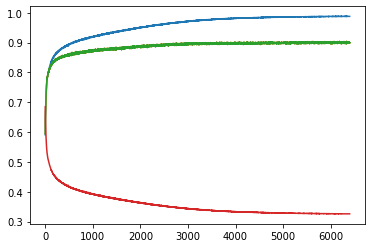

epoch: 0
train_acc: 0.9877430555555555
test_acc: 0.900625
f1: 0.9006107483832958

epoch: 1
train_acc: 0.9878472222222222
test_acc: 0.9007638888888889
f1: 0.9007582963996571

epoch: 2
train_acc: 0.9879166666666667
test_acc: 0.8993055555555556
f1: 0.8992981834391336

epoch: 3
train_acc: 0.9879340277777777
test_acc: 0.9005555555555556
f1: 0.9005480351259196

epoch: 4
train_acc: 0.9879340277777777
test_acc: 0.8982638888888889
f1: 0.898236882181225

epoch: 5
train_acc: 0.9879166666666667
test_acc: 0.9000694444444445
f1: 0.9000464195940286

epoch: 6
train_acc: 0.9877604166666667
test_acc: 0.8995138888888888
f1: 0.8994907360337452

epoch: 7
train_acc: 0.9877256944444445
test_acc: 0.9005555555555556
f1: 0.9005421119107051

epoch: 8
train_acc: 0.9878472222222222
test_acc: 0.8997222222222222
f1: 0.8997209068208046

epoch: 9
train_acc: 0.9879166666666667
test_acc: 0.9
f1: 0.8999952716944007

epoch: 10
train_acc: 0.9880208333333333
test_acc: 0.8998611111111111
f1: 0.8998459021315723

epoch: 11
tra

epoch: 91
train_acc: 0.9878993055555556
test_acc: 0.9005555555555556
f1: 0.9005506597474591

epoch: 92
train_acc: 0.9876388888888888
test_acc: 0.901875
f1: 0.9018622076075132

epoch: 93
train_acc: 0.9878819444444444
test_acc: 0.9013194444444445
f1: 0.9012927993566585

epoch: 94
train_acc: 0.9881423611111111
test_acc: 0.8995833333333333
f1: 0.8995728196329015

epoch: 95
train_acc: 0.9876909722222222
test_acc: 0.8980555555555556
f1: 0.8980516695075214

epoch: 96
train_acc: 0.9880902777777778
test_acc: 0.900625
f1: 0.900620009354784

epoch: 97
train_acc: 0.9878645833333334
test_acc: 0.9009722222222222
f1: 0.9009632200832322

epoch: 98
train_acc: 0.98796875
test_acc: 0.9025
f1: 0.9024752116329078

epoch: 99
train_acc: 0.9878819444444444
test_acc: 0.8999305555555556
f1: 0.8999044432410082

epoch: 100
train_acc: 0.98796875
test_acc: 0.898125
f1: 0.8981006580746692

epoch: 101
train_acc: 0.9877256944444445
test_acc: 0.9002083333333334
f1: 0.9002009074599715

epoch: 102
train_acc: 0.9880034722

epoch: 182
train_acc: 0.9878125
test_acc: 0.8983333333333333
f1: 0.8983285262226407

epoch: 183
train_acc: 0.98796875
test_acc: 0.8989583333333333
f1: 0.8989398962646707

epoch: 184
train_acc: 0.9878819444444444
test_acc: 0.8986111111111111
f1: 0.8985904529971094

epoch: 185
train_acc: 0.9879513888888889
test_acc: 0.898125
f1: 0.8981060255394631

epoch: 186
train_acc: 0.9881423611111111
test_acc: 0.8984027777777778
f1: 0.8983838550540112

epoch: 187
train_acc: 0.9878472222222222
test_acc: 0.9006944444444445
f1: 0.9006840470781806

epoch: 188
train_acc: 0.98828125
test_acc: 0.9018055555555555
f1: 0.90179991804905

epoch: 189
train_acc: 0.9881770833333333
test_acc: 0.9020833333333333
f1: 0.9020719326880209

epoch: 190
train_acc: 0.9880555555555556
test_acc: 0.9013194444444445
f1: 0.9013081028988993

epoch: 191
train_acc: 0.9878472222222222
test_acc: 0.8982638888888889
f1: 0.8982479087379264

epoch: 192
train_acc: 0.9879861111111111
test_acc: 0.901875
f1: 0.9018651422895554

epoch: 193
tr

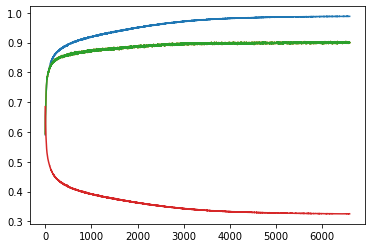

epoch: 0
train_acc: 0.9879513888888889
test_acc: 0.8990277777777778
f1: 0.8990154057054871

epoch: 1
train_acc: 0.9881944444444445
test_acc: 0.9011111111111111
f1: 0.9011007573701603

epoch: 2
train_acc: 0.9880381944444444
test_acc: 0.8972222222222223
f1: 0.897216101479683

epoch: 3
train_acc: 0.9877083333333333
test_acc: 0.9004861111111111
f1: 0.9004822308421507

epoch: 4
train_acc: 0.9881076388888889
test_acc: 0.8970833333333333
f1: 0.8970739776741586

epoch: 5
train_acc: 0.9881770833333333
test_acc: 0.9020833333333333
f1: 0.902064153670687

epoch: 6
train_acc: 0.9880034722222222
test_acc: 0.8975694444444444
f1: 0.897552264121284

epoch: 7
train_acc: 0.9876388888888888
test_acc: 0.8995138888888888
f1: 0.8994955531924249

epoch: 8
train_acc: 0.9880208333333333
test_acc: 0.9005555555555556
f1: 0.900550260691972

epoch: 9
train_acc: 0.9879861111111111
test_acc: 0.8985416666666667
f1: 0.8985405877705095

epoch: 10
train_acc: 0.9880902777777778
test_acc: 0.8985416666666667
f1: 0.898537530

epoch: 91
train_acc: 0.9883680555555555
test_acc: 0.8974305555555555
f1: 0.8974193726526515

epoch: 92
train_acc: 0.9883333333333333
test_acc: 0.9000694444444445
f1: 0.9000602267184956

epoch: 93
train_acc: 0.9880902777777778
test_acc: 0.9009722222222222
f1: 0.9009621348143118

epoch: 94
train_acc: 0.9877777777777778
test_acc: 0.9005555555555556
f1: 0.900546515539403

epoch: 95
train_acc: 0.9878993055555556
test_acc: 0.899375
f1: 0.8993605691176769

epoch: 96
train_acc: 0.9882291666666667
test_acc: 0.9009027777777778
f1: 0.900892822397166

epoch: 97
train_acc: 0.9880381944444444
test_acc: 0.8965277777777778
f1: 0.8965163452126619

epoch: 98
train_acc: 0.9884548611111111
test_acc: 0.9018055555555555
f1: 0.901789612991839

epoch: 99
train_acc: 0.988125
test_acc: 0.9011805555555555
f1: 0.9011709026420573

epoch: 100
train_acc: 0.9880208333333333
test_acc: 0.8970138888888889
f1: 0.8970052000202574

epoch: 101
train_acc: 0.9884027777777777
test_acc: 0.8979166666666667
f1: 0.8979021965393108

epoch: 181
train_acc: 0.9881770833333333
test_acc: 0.8971527777777778
f1: 0.8971290809025411

epoch: 182
train_acc: 0.9882638888888889
test_acc: 0.9002083333333334
f1: 0.9001991284186783

epoch: 183
train_acc: 0.9882986111111111
test_acc: 0.901875
f1: 0.9018711738869218

epoch: 184
train_acc: 0.9882986111111111
test_acc: 0.8966666666666666
f1: 0.8966632479769494

epoch: 185
train_acc: 0.9880034722222222
test_acc: 0.8977777777777778
f1: 0.8977676509584763

epoch: 186
train_acc: 0.988125
test_acc: 0.9003472222222222
f1: 0.900327507775325

epoch: 187
train_acc: 0.9880902777777778
test_acc: 0.8986805555555556
f1: 0.8986624471194862

epoch: 188
train_acc: 0.9884375
test_acc: 0.9003472222222222
f1: 0.9003360650506708

epoch: 189
train_acc: 0.9882638888888889
test_acc: 0.9014583333333334
f1: 0.9014537685619411

epoch: 190
train_acc: 0.9881597222222223
test_acc: 0.9003472222222222
f1: 0.9003393183277523

epoch: 191
train_acc: 0.9884722222222222
test_acc: 0.9016666666666666
f1: 0.90164890833190

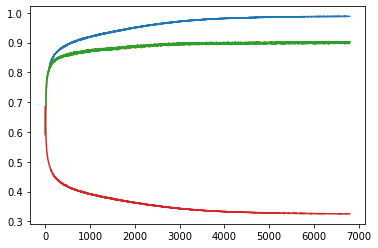

epoch: 0
train_acc: 0.9883854166666667
test_acc: 0.8979861111111112
f1: 0.8979752840312034

epoch: 1
train_acc: 0.988125
test_acc: 0.9004166666666666
f1: 0.9004128706224698

epoch: 2
train_acc: 0.9882118055555555
test_acc: 0.9032638888888889
f1: 0.9032604491201953

epoch: 3
train_acc: 0.9881076388888889
test_acc: 0.9015972222222223
f1: 0.9015862050012545

epoch: 4
train_acc: 0.9881076388888889
test_acc: 0.9005555555555556
f1: 0.9005315799025355

epoch: 5
train_acc: 0.9882118055555555
test_acc: 0.9008333333333334
f1: 0.9008226654115656

epoch: 6
train_acc: 0.9882638888888889
test_acc: 0.8990972222222222
f1: 0.8990865130683038

epoch: 7
train_acc: 0.9883680555555555
test_acc: 0.89875
f1: 0.8987432963117039

epoch: 8
train_acc: 0.9882118055555555
test_acc: 0.9013888888888889
f1: 0.90138383815429

epoch: 9
train_acc: 0.9884548611111111
test_acc: 0.9007638888888889
f1: 0.9007527783675322

epoch: 10
train_acc: 0.9884027777777777
test_acc: 0.8988888888888888
f1: 0.8988755457546417

epoch: 11


epoch: 90
train_acc: 0.9883680555555555
test_acc: 0.9003472222222222
f1: 0.9003366457350421

epoch: 91
train_acc: 0.9881597222222223
test_acc: 0.8975694444444444
f1: 0.8975582766842659

epoch: 92
train_acc: 0.9884895833333334
test_acc: 0.8994444444444445
f1: 0.8994365935974256

epoch: 93
train_acc: 0.98828125
test_acc: 0.9020833333333333
f1: 0.9020684618623559

epoch: 94
train_acc: 0.9882465277777778
test_acc: 0.9018055555555555
f1: 0.9017968887281205

epoch: 95
train_acc: 0.98859375
test_acc: 0.8985416666666667
f1: 0.8985361603431564

epoch: 96
train_acc: 0.9884027777777777
test_acc: 0.8990972222222222
f1: 0.8990884482495586

epoch: 97
train_acc: 0.98828125
test_acc: 0.8991666666666667
f1: 0.8991499356871824

epoch: 98
train_acc: 0.9884027777777777
test_acc: 0.89875
f1: 0.8987297707543659

epoch: 99
train_acc: 0.9884027777777777
test_acc: 0.9017361111111111
f1: 0.9017242220993489

epoch: 100
train_acc: 0.9884375
test_acc: 0.8976388888888889
f1: 0.8976306423080579

epoch: 101
train_acc

epoch: 181
train_acc: 0.9883333333333333
test_acc: 0.9015277777777778
f1: 0.9015243584384964

epoch: 182
train_acc: 0.98859375
test_acc: 0.9005555555555556
f1: 0.9005521024569301

epoch: 183
train_acc: 0.9882638888888889
test_acc: 0.8988888888888888
f1: 0.8988812424185328

epoch: 184
train_acc: 0.9884722222222222
test_acc: 0.9008333333333334
f1: 0.9008182720137901

epoch: 185
train_acc: 0.98828125
test_acc: 0.9001388888888889
f1: 0.9001233771652128

epoch: 186
train_acc: 0.9885069444444444
test_acc: 0.9009027777777778
f1: 0.9008898586383025

epoch: 187
train_acc: 0.9884895833333334
test_acc: 0.90125
f1: 0.9012396608008202

epoch: 188
train_acc: 0.9884375
test_acc: 0.9011805555555555
f1: 0.9011660518182727

epoch: 189
train_acc: 0.9885763888888889
test_acc: 0.9
f1: 0.8999819406765115

epoch: 190
train_acc: 0.9885763888888889
test_acc: 0.9021527777777778
f1: 0.9021349235992582

epoch: 191
train_acc: 0.9884722222222222
test_acc: 0.9002777777777777
f1: 0.9002622876281264

epoch: 192
train_

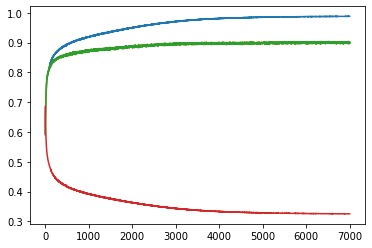

epoch: 0
train_acc: 0.9883159722222222
test_acc: 0.899375
f1: 0.8993640290952551

epoch: 1
train_acc: 0.9884895833333334
test_acc: 0.9001388888888889
f1: 0.9001208546477942

epoch: 2
train_acc: 0.9882465277777778
test_acc: 0.9009722222222222
f1: 0.9009575202269386

epoch: 3
train_acc: 0.9883159722222222
test_acc: 0.8990972222222222
f1: 0.8990824127139495

epoch: 4
train_acc: 0.9884201388888889
test_acc: 0.9000694444444445
f1: 0.9000653705650659

epoch: 5
train_acc: 0.9884027777777777
test_acc: 0.8977777777777778
f1: 0.8977737016824249

epoch: 6
train_acc: 0.9884722222222222
test_acc: 0.9014583333333334
f1: 0.9014475895694735

epoch: 7
train_acc: 0.98828125
test_acc: 0.8996527777777777
f1: 0.8996279293635268

epoch: 8
train_acc: 0.9882465277777778
test_acc: 0.9019444444444444
f1: 0.9019256179325218

epoch: 9
train_acc: 0.9885763888888889
test_acc: 0.8990972222222222
f1: 0.8990850139295786

epoch: 10
train_acc: 0.9884722222222222
test_acc: 0.8988194444444444
f1: 0.8988130864811863

epoch

epoch: 92
train_acc: 0.9885069444444444
test_acc: 0.8997916666666667
f1: 0.8997839661821551

epoch: 93
train_acc: 0.9885590277777778
test_acc: 0.9022222222222223
f1: 0.9022140977587934

epoch: 94
train_acc: 0.9886111111111111
test_acc: 0.9
f1: 0.8999830464324201

epoch: 95
train_acc: 0.9886284722222223
test_acc: 0.9017361111111111
f1: 0.9017270471206889

epoch: 96
train_acc: 0.9886458333333333
test_acc: 0.8999305555555556
f1: 0.8999213250183129

epoch: 97
train_acc: 0.9884201388888889
test_acc: 0.8990277777777778
f1: 0.8990131280756967

epoch: 98
train_acc: 0.9884201388888889
test_acc: 0.8990972222222222
f1: 0.8990847024142676

epoch: 99
train_acc: 0.9884722222222222
test_acc: 0.9001388888888889
f1: 0.9001320478874458

epoch: 100
train_acc: 0.9884027777777777
test_acc: 0.9005555555555556
f1: 0.9005470374232517

epoch: 101
train_acc: 0.9886631944444444
test_acc: 0.8999305555555556
f1: 0.8999199348461294

epoch: 102
train_acc: 0.9886979166666666
test_acc: 0.9015277777777778
f1: 0.9015128

epoch: 182
train_acc: 0.9885590277777778
test_acc: 0.9013888888888889
f1: 0.9013777023096867

epoch: 183
train_acc: 0.9887152777777778
test_acc: 0.8991666666666667
f1: 0.8991436464166574

epoch: 184
train_acc: 0.9885069444444444
test_acc: 0.9004861111111111
f1: 0.9004592410120279

epoch: 185
train_acc: 0.9887152777777778
test_acc: 0.9020833333333333
f1: 0.902075444813

epoch: 186
train_acc: 0.9885763888888889
test_acc: 0.9022916666666667
f1: 0.9022853082192371

epoch: 187
train_acc: 0.9884027777777777
test_acc: 0.898125
f1: 0.8981192587951692

epoch: 188
train_acc: 0.9885069444444444
test_acc: 0.9001388888888889
f1: 0.9001219588679307

epoch: 189
train_acc: 0.9885243055555556
test_acc: 0.9011805555555555
f1: 0.9011582024836486

epoch: 190
train_acc: 0.98875
test_acc: 0.8986805555555556
f1: 0.8986635615952226

epoch: 191
train_acc: 0.9885590277777778
test_acc: 0.9018055555555555
f1: 0.9017925973194115

epoch: 192
train_acc: 0.9884722222222222
test_acc: 0.8986111111111111
f1: 0.898606119

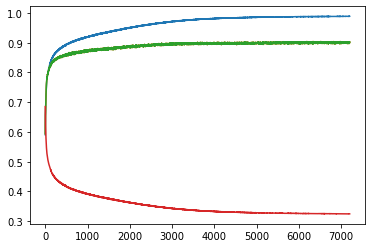

epoch: 0
train_acc: 0.98859375
test_acc: 0.9013888888888889
f1: 0.9013739119464861

epoch: 1
train_acc: 0.9885243055555556
test_acc: 0.9004166666666666
f1: 0.9004008502719782

epoch: 2
train_acc: 0.9885763888888889
test_acc: 0.8995833333333333
f1: 0.8995719419294417

epoch: 3
train_acc: 0.9887673611111111
test_acc: 0.9029166666666667
f1: 0.9029129659206504

epoch: 4
train_acc: 0.98875
test_acc: 0.89875
f1: 0.8987455954461078

epoch: 5
train_acc: 0.9884895833333334
test_acc: 0.9002777777777777
f1: 0.9002743150336254

epoch: 6
train_acc: 0.9884201388888889
test_acc: 0.9008333333333334
f1: 0.9008226654115656

epoch: 7
train_acc: 0.9885763888888889
test_acc: 0.9015277777777778
f1: 0.901502742233236

epoch: 8
train_acc: 0.9886111111111111
test_acc: 0.8995833333333333
f1: 0.8995628733108358

epoch: 9
train_acc: 0.9884548611111111
test_acc: 0.9015277777777778
f1: 0.901516312447953

epoch: 10
train_acc: 0.9885243055555556
test_acc: 0.8963194444444444
f1: 0.8963142375728113

epoch: 11
train_acc

epoch: 91
train_acc: 0.9888715277777778
test_acc: 0.9023611111111111
f1: 0.9023482261888913

epoch: 92
train_acc: 0.9886111111111111
test_acc: 0.9009722222222222
f1: 0.9009694102075789

epoch: 93
train_acc: 0.9885590277777778
test_acc: 0.8988194444444444
f1: 0.8988190711618399

epoch: 94
train_acc: 0.9889409722222222
test_acc: 0.9007638888888889
f1: 0.9007608426632937

epoch: 95
train_acc: 0.9888368055555555
test_acc: 0.8976388888888889
f1: 0.8976253807983116

epoch: 96
train_acc: 0.9885590277777778
test_acc: 0.8995833333333333
f1: 0.8995564486627513

epoch: 97
train_acc: 0.9886631944444444
test_acc: 0.8994444444444445
f1: 0.8994193236772583

epoch: 98
train_acc: 0.9886284722222223
test_acc: 0.9010416666666666
f1: 0.9010247097146475

epoch: 99
train_acc: 0.9886631944444444
test_acc: 0.900625
f1: 0.9006209487690126

epoch: 100
train_acc: 0.9887152777777778
test_acc: 0.8989583333333333
f1: 0.8989550718433528

epoch: 101
train_acc: 0.9887847222222222
test_acc: 0.9007638888888889
f1: 0.900

epoch: 180
train_acc: 0.9888368055555555
test_acc: 0.8979166666666667
f1: 0.8978954592487154

epoch: 181
train_acc: 0.9887326388888888
test_acc: 0.9000694444444445
f1: 0.9000488843452839

epoch: 182
train_acc: 0.9888715277777778
test_acc: 0.9009027777777778
f1: 0.9008898586383025

epoch: 183
train_acc: 0.98875
test_acc: 0.90125
f1: 0.9012436847428248

epoch: 184
train_acc: 0.9886805555555556
test_acc: 0.9005555555555556
f1: 0.9005498462844694

epoch: 185
train_acc: 0.9888888888888889
test_acc: 0.9000694444444445
f1: 0.900062482524325

epoch: 186
train_acc: 0.9889409722222222
test_acc: 0.8996527777777777
f1: 0.8996393742537719

epoch: 187
train_acc: 0.9887152777777778
test_acc: 0.899375
f1: 0.8993622001151014

epoch: 188
train_acc: 0.98875
test_acc: 0.8990972222222222
f1: 0.8990889661014181

epoch: 189
train_acc: 0.9889236111111112
test_acc: 0.9004166666666666
f1: 0.9004041554098411

epoch: 190
train_acc: 0.9889409722222222
test_acc: 0.8991666666666667
f1: 0.8991513522157025

epoch: 191

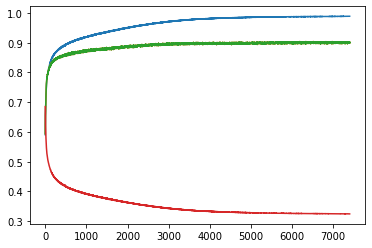

epoch: 0
train_acc: 0.9888194444444445
test_acc: 0.8992361111111111
f1: 0.8992184753141749

epoch: 1
train_acc: 0.9889236111111112
test_acc: 0.9013888888888889
f1: 0.9013749109427355

epoch: 2
train_acc: 0.9888020833333333
test_acc: 0.9007638888888889
f1: 0.9007533566239547

epoch: 3
train_acc: 0.98875
test_acc: 0.8994444444444445
f1: 0.8994353034225246

epoch: 4
train_acc: 0.9889583333333334
test_acc: 0.9021527777777778
f1: 0.9021409391787863

epoch: 5
train_acc: 0.9889409722222222
test_acc: 0.8985416666666667
f1: 0.8985277858290877

epoch: 6
train_acc: 0.9888715277777778
test_acc: 0.9002777777777777
f1: 0.9002642965808468

epoch: 7
train_acc: 0.9888368055555555
test_acc: 0.8991666666666667
f1: 0.8991520371154825

epoch: 8
train_acc: 0.9887673611111111
test_acc: 0.8990972222222222
f1: 0.8990913216706372

epoch: 9
train_acc: 0.9889756944444444
test_acc: 0.9015277777777778
f1: 0.9015177469612162

epoch: 10
train_acc: 0.9886631944444444
test_acc: 0.8972222222222223
f1: 0.8972128791887684

epoch: 91
train_acc: 0.9888194444444445
test_acc: 0.9
f1: 0.8999808001578127

epoch: 92
train_acc: 0.9888715277777778
test_acc: 0.9020138888888889
f1: 0.9019921327950442

epoch: 93
train_acc: 0.98890625
test_acc: 0.9002777777777777
f1: 0.9002574592492116

epoch: 94
train_acc: 0.9890277777777777
test_acc: 0.9008333333333334
f1: 0.9008154245042073

epoch: 95
train_acc: 0.9889583333333334
test_acc: 0.8988194444444444
f1: 0.8988081162221794

epoch: 96
train_acc: 0.9888194444444445
test_acc: 0.8984722222222222
f1: 0.8984594666730736

epoch: 97
train_acc: 0.9888020833333333
test_acc: 0.9
f1: 0.8999942588335446

epoch: 98
train_acc: 0.9890625
test_acc: 0.898125
f1: 0.8981135940274104

epoch: 99
train_acc: 0.98875
test_acc: 0.8995138888888888
f1: 0.8995023398273804

epoch: 100
train_acc: 0.9890798611111111
test_acc: 0.8975694444444444
f1: 0.897552264121284

epoch: 101
train_acc: 0.9891666666666666
test_acc: 0.9004861111111111
f1: 0.9004787059082389

epoch: 102
train_acc: 0.9888541666666667
tes

epoch: 182
train_acc: 0.9889930555555555
test_acc: 0.8996527777777777
f1: 0.899646247602557

epoch: 183
train_acc: 0.9887673611111111
test_acc: 0.8980555555555556
f1: 0.8980448818956428

epoch: 184
train_acc: 0.9891145833333334
test_acc: 0.9009027777777778
f1: 0.9008790995722923

epoch: 185
train_acc: 0.9888715277777778
test_acc: 0.8991666666666667
f1: 0.8991343822569616

epoch: 186
train_acc: 0.9888368055555555
test_acc: 0.90125
f1: 0.9012244535543563

epoch: 187
train_acc: 0.9889236111111112
test_acc: 0.9004166666666666
f1: 0.9004038422003742

epoch: 188
train_acc: 0.9889583333333334
test_acc: 0.9002083333333334
f1: 0.9002031215385679

epoch: 189
train_acc: 0.9891319444444444
test_acc: 0.8985416666666667
f1: 0.8985391550702386

epoch: 190
train_acc: 0.9891493055555556
test_acc: 0.9009027777777778
f1: 0.9008946693921016

epoch: 191
train_acc: 0.98890625
test_acc: 0.9011111111111111
f1: 0.9010905673266466

epoch: 192
train_acc: 0.9891145833333334
test_acc: 0.8993055555555556
f1: 0.8992

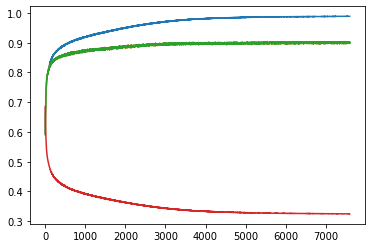

epoch: 0
train_acc: 0.9889409722222222
test_acc: 0.9004861111111111
f1: 0.9004850528919509

epoch: 1
train_acc: 0.9889236111111112
test_acc: 0.9014583333333334
f1: 0.9014580268135525

epoch: 2
train_acc: 0.9886805555555556
test_acc: 0.8989583333333333
f1: 0.8989567325887088

epoch: 3
train_acc: 0.9890798611111111
test_acc: 0.8997222222222222
f1: 0.8997117230635614

epoch: 4
train_acc: 0.9889930555555555
test_acc: 0.9015972222222223
f1: 0.9015634721565419

epoch: 5
train_acc: 0.9888020833333333
test_acc: 0.9015277777777778
f1: 0.901507320554203

epoch: 6
train_acc: 0.98875
test_acc: 0.8979166666666667
f1: 0.8979059784649829

epoch: 7
train_acc: 0.9891319444444444
test_acc: 0.9004166666666666
f1: 0.900414407523435

epoch: 8
train_acc: 0.9887673611111111
test_acc: 0.9013194444444445
f1: 0.901313460613724

epoch: 9
train_acc: 0.9890104166666667
test_acc: 0.9004861111111111
f1: 0.9004766630117025

epoch: 10
train_acc: 0.9887847222222222
test_acc: 0.9
f1: 0.8999775888042427

epoch: 11
train_

epoch: 91
train_acc: 0.9889409722222222
test_acc: 0.9009722222222222
f1: 0.9009642441867644

epoch: 92
train_acc: 0.9891145833333334
test_acc: 0.9009722222222222
f1: 0.9009642441867644

epoch: 93
train_acc: 0.9892881944444445
test_acc: 0.8997916666666667
f1: 0.8997818780832669

epoch: 94
train_acc: 0.9888020833333333
test_acc: 0.89875
f1: 0.8987396862266948

epoch: 95
train_acc: 0.9888541666666667
test_acc: 0.8990972222222222
f1: 0.899083744491855

epoch: 96
train_acc: 0.9889930555555555
test_acc: 0.9004166666666666
f1: 0.9004032042457759

epoch: 97
train_acc: 0.9891319444444444
test_acc: 0.8986805555555556
f1: 0.8986709360321521

epoch: 98
train_acc: 0.9889236111111112
test_acc: 0.8996527777777777
f1: 0.8996396956778886

epoch: 99
train_acc: 0.9891493055555556
test_acc: 0.9003472222222222
f1: 0.9003377609363524

epoch: 100
train_acc: 0.9891145833333334
test_acc: 0.9013888888888889
f1: 0.9013725266362252

epoch: 101
train_acc: 0.9890625
test_acc: 0.9008333333333334
f1: 0.90081960385404

epoch: 181
train_acc: 0.9891493055555556
test_acc: 0.901875
f1: 0.9018493950725499

epoch: 182
train_acc: 0.9891145833333334
test_acc: 0.9020833333333333
f1: 0.9020580024695093

epoch: 183
train_acc: 0.9889930555555555
test_acc: 0.8988888888888888
f1: 0.8988774187062705

epoch: 184
train_acc: 0.9891145833333334
test_acc: 0.8996527777777777
f1: 0.8996483190880891

epoch: 185
train_acc: 0.9892013888888889
test_acc: 0.9001388888888889
f1: 0.9001366234440025

epoch: 186
train_acc: 0.9892534722222223
test_acc: 0.9014583333333334
f1: 0.901454829362209

epoch: 187
train_acc: 0.9892361111111111
test_acc: 0.8996527777777777
f1: 0.8996333171313763

epoch: 188
train_acc: 0.9890625
test_acc: 0.9022222222222223
f1: 0.9022011167149647

epoch: 189
train_acc: 0.9890451388888889
test_acc: 0.8997222222222222
f1: 0.8997033541494878

epoch: 190
train_acc: 0.9889409722222222
test_acc: 0.8984027777777778
f1: 0.8983942060887635

epoch: 191
train_acc: 0.9890451388888889
test_acc: 0.9002777777777777
f1: 0.9002

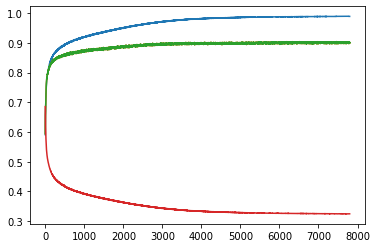

epoch: 0
train_acc: 0.9891145833333334
test_acc: 0.8997916666666667
f1: 0.8997786026734903

epoch: 1
train_acc: 0.98921875
test_acc: 0.900625
f1: 0.9006057278996535

epoch: 2
train_acc: 0.9892708333333333
test_acc: 0.8988888888888888
f1: 0.8988755457546417

epoch: 3
train_acc: 0.9890972222222222
test_acc: 0.8988888888888888
f1: 0.8988706289062505

epoch: 4
train_acc: 0.9890798611111111
test_acc: 0.9045138888888888
f1: 0.9045080987641594

epoch: 5
train_acc: 0.9890277777777777
test_acc: 0.9011805555555555
f1: 0.9011689005947255

epoch: 6
train_acc: 0.9890451388888889
test_acc: 0.9004861111111111
f1: 0.9004683253750674

epoch: 7
train_acc: 0.989375
test_acc: 0.89875
f1: 0.8987293701847846

epoch: 8
train_acc: 0.98921875
test_acc: 0.9000694444444445
f1: 0.9000591238401501

epoch: 9
train_acc: 0.9890798611111111
test_acc: 0.8988194444444444
f1: 0.8988095608921137

epoch: 10
train_acc: 0.9892534722222223
test_acc: 0.9006944444444445
f1: 0.9006885304837479

epoch: 11
train_acc: 0.98907986111

epoch: 91
train_acc: 0.98921875
test_acc: 0.9017361111111111
f1: 0.9017242220993489

epoch: 92
train_acc: 0.9891319444444444
test_acc: 0.9001388888888889
f1: 0.9001287165939554

epoch: 93
train_acc: 0.9890798611111111
test_acc: 0.9002083333333334
f1: 0.900196259474745

epoch: 94
train_acc: 0.9890104166666667
test_acc: 0.8986111111111111
f1: 0.8985970739684213

epoch: 95
train_acc: 0.9892361111111111
test_acc: 0.8989583333333333
f1: 0.898943503440328

epoch: 96
train_acc: 0.9892013888888889
test_acc: 0.901875
f1: 0.9018628248529664

epoch: 97
train_acc: 0.9891493055555556
test_acc: 0.9002777777777777
f1: 0.9002718390032601

epoch: 98
train_acc: 0.9890625
test_acc: 0.9000694444444445
f1: 0.9000615185182129

epoch: 99
train_acc: 0.9892534722222223
test_acc: 0.9005555555555556
f1: 0.9005427489755481

epoch: 100
train_acc: 0.9891493055555556
test_acc: 0.8997222222222222
f1: 0.8997093083245052

epoch: 101
train_acc: 0.9892013888888889
test_acc: 0.8971527777777778
f1: 0.897133229254974

epoch

epoch: 182
train_acc: 0.9892361111111111
test_acc: 0.8982638888888889
f1: 0.8982533818108548

epoch: 183
train_acc: 0.9890277777777777
test_acc: 0.9019444444444444
f1: 0.9019398080781209

epoch: 184
train_acc: 0.9891840277777778
test_acc: 0.9011805555555555
f1: 0.9011636224027674

epoch: 185
train_acc: 0.9890451388888889
test_acc: 0.9000694444444445
f1: 0.9000515842391642

epoch: 186
train_acc: 0.9893229166666667
test_acc: 0.8985416666666667
f1: 0.8985187166750602

epoch: 187
train_acc: 0.9892881944444445
test_acc: 0.9008333333333334
f1: 0.900821787147868

epoch: 188
train_acc: 0.9892534722222223
test_acc: 0.8988194444444444
f1: 0.8988087058090288

epoch: 189
train_acc: 0.9893055555555555
test_acc: 0.9014583333333334
f1: 0.9014467111341641

epoch: 190
train_acc: 0.9892013888888889
test_acc: 0.9004166666666666
f1: 0.9004117640208494

epoch: 191
train_acc: 0.9891840277777778
test_acc: 0.9019444444444444
f1: 0.9019333208882236

epoch: 192
train_acc: 0.9893055555555555
test_acc: 0.90131944

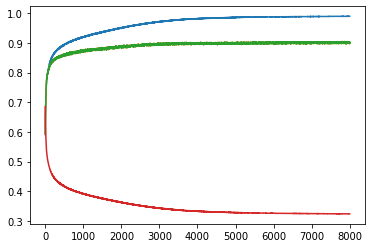

epoch: 0
train_acc: 0.9891666666666666
test_acc: 0.9
f1: 0.8999889510780088

epoch: 1
train_acc: 0.9891666666666666
test_acc: 0.9009027777777778
f1: 0.9008961033431114

epoch: 2
train_acc: 0.9892361111111111
test_acc: 0.9004861111111111
f1: 0.900476390362662

epoch: 3
train_acc: 0.9891493055555556
test_acc: 0.9006944444444445
f1: 0.9006893581412919

epoch: 4
train_acc: 0.98921875
test_acc: 0.8985416666666667
f1: 0.8985306049055678

epoch: 5
train_acc: 0.9892534722222223
test_acc: 0.9013194444444445
f1: 0.9013065796251071

epoch: 6
train_acc: 0.9891666666666666
test_acc: 0.9016666666666666
f1: 0.9016536901020414

epoch: 7
train_acc: 0.9892881944444445
test_acc: 0.9022916666666667
f1: 0.9022738378311969

epoch: 8
train_acc: 0.9893923611111111
test_acc: 0.9017361111111111
f1: 0.9017126320215794

epoch: 9
train_acc: 0.9891840277777778
test_acc: 0.8999305555555556
f1: 0.8999181391458774

epoch: 10
train_acc: 0.9891840277777778
test_acc: 0.8991666666666667
f1: 0.8991599905655653

epoch: 11
t

epoch: 91
train_acc: 0.9892881944444445
test_acc: 0.9005555555555556
f1: 0.9005506597474591

epoch: 92
train_acc: 0.9893229166666667
test_acc: 0.9
f1: 0.8999898135572293

epoch: 93
train_acc: 0.9894791666666667
test_acc: 0.8997222222222222
f1: 0.8997089890588615

epoch: 94
train_acc: 0.9892361111111111
test_acc: 0.8976388888888889
f1: 0.8976215350287411

epoch: 95
train_acc: 0.9894097222222222
test_acc: 0.8979861111111112
f1: 0.8979690006740109

epoch: 96
train_acc: 0.9892881944444445
test_acc: 0.9018055555555555
f1: 0.901789612991839

epoch: 97
train_acc: 0.9891493055555556
test_acc: 0.9007638888888889
f1: 0.9007450267423077

epoch: 98
train_acc: 0.9891666666666666
test_acc: 0.9011111111111111
f1: 0.9010983760762433

epoch: 99
train_acc: 0.9893923611111111
test_acc: 0.8974305555555555
f1: 0.8974190718326416

epoch: 100
train_acc: 0.9893923611111111
test_acc: 0.9025
f1: 0.9024861795518315

epoch: 101
train_acc: 0.9893576388888888
test_acc: 0.9003472222222222
f1: 0.9003443170034292

epo

epoch: 182
train_acc: 0.9893229166666667
test_acc: 0.9002777777777777
f1: 0.9002678986252527

epoch: 183
train_acc: 0.9894444444444445
test_acc: 0.9011805555555555
f1: 0.9011650335386139

epoch: 184
train_acc: 0.989375
test_acc: 0.90125
f1: 0.9012314193909775

epoch: 185
train_acc: 0.9893576388888888
test_acc: 0.9022916666666667
f1: 0.9022766585604169

epoch: 186
train_acc: 0.9893576388888888
test_acc: 0.8994444444444445
f1: 0.89943867138262

epoch: 187
train_acc: 0.9893576388888888
test_acc: 0.8994444444444445
f1: 0.8994360891723955

epoch: 188
train_acc: 0.9893229166666667
test_acc: 0.9002083333333334
f1: 0.9002004184229826

epoch: 189
train_acc: 0.9893923611111111
test_acc: 0.9005555555555556
f1: 0.9005414594859137

epoch: 190
train_acc: 0.9892534722222223
test_acc: 0.9009722222222222
f1: 0.9009591540151912

epoch: 191
train_acc: 0.9895486111111111
test_acc: 0.9024305555555555
f1: 0.9024152298817656

epoch: 192
train_acc: 0.9893923611111111
test_acc: 0.8994444444444445
f1: 0.8994277

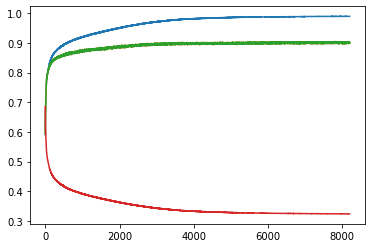

epoch: 0
train_acc: 0.9893923611111111
test_acc: 0.899375
f1: 0.8993605691176769

epoch: 1
train_acc: 0.9892361111111111
test_acc: 0.9002083333333334
f1: 0.9001983081883166

epoch: 2
train_acc: 0.9892708333333333
test_acc: 0.9011805555555555
f1: 0.9011736710438597

epoch: 3
train_acc: 0.98921875
test_acc: 0.9023611111111111
f1: 0.9023485370528077

epoch: 4
train_acc: 0.9894097222222222
test_acc: 0.8988888888888888
f1: 0.8988735322493546

epoch: 5
train_acc: 0.9893576388888888
test_acc: 0.8995833333333333
f1: 0.8995694307933817

epoch: 6
train_acc: 0.9894444444444445
test_acc: 0.899375
f1: 0.8993598895188539

epoch: 7
train_acc: 0.9892534722222223
test_acc: 0.9003472222222222
f1: 0.9003351651678909

epoch: 8
train_acc: 0.9893229166666667
test_acc: 0.8990277777777778
f1: 0.8990087790397195

epoch: 9
train_acc: 0.9892534722222223
test_acc: 0.9005555555555556
f1: 0.9005379669402035

epoch: 10
train_acc: 0.9894444444444445
test_acc: 0.8998611111111111
f1: 0.8998478962762313

epoch: 11
train

epoch: 91
train_acc: 0.9893576388888888
test_acc: 0.9028472222222222
f1: 0.9028413310334973

epoch: 92
train_acc: 0.9895138888888889
test_acc: 0.8996527777777777
f1: 0.8996435216179474

epoch: 93
train_acc: 0.9893923611111111
test_acc: 0.9003472222222222
f1: 0.9003297808930676

epoch: 94
train_acc: 0.9893402777777778
test_acc: 0.8985416666666667
f1: 0.8985133354655606

epoch: 95
train_acc: 0.989375
test_acc: 0.9027777777777778
f1: 0.9027567921881754

epoch: 96
train_acc: 0.9893229166666667
test_acc: 0.9009722222222222
f1: 0.900966536872663

epoch: 97
train_acc: 0.9894791666666667
test_acc: 0.8989583333333333
f1: 0.8989526390913233

epoch: 98
train_acc: 0.9893055555555555
test_acc: 0.8986805555555556
f1: 0.8986727696879863

epoch: 99
train_acc: 0.9893576388888888
test_acc: 0.8996527777777777
f1: 0.8996380498084358

epoch: 100
train_acc: 0.9892881944444445
test_acc: 0.9013888888888889
f1: 0.9013687967506133

epoch: 101
train_acc: 0.9894444444444445
test_acc: 0.9013194444444445
f1: 0.9012

epoch: 180
train_acc: 0.9893576388888888
test_acc: 0.8984722222222222
f1: 0.8984650300297705

epoch: 181
train_acc: 0.9894097222222222
test_acc: 0.9008333333333334
f1: 0.9008232317775858

epoch: 182
train_acc: 0.989375
test_acc: 0.9005555555555556
f1: 0.9005390550303343

epoch: 183
train_acc: 0.9893576388888888
test_acc: 0.9024305555555555
f1: 0.9024141905697654

epoch: 184
train_acc: 0.9893923611111111
test_acc: 0.8994444444444445
f1: 0.8994365935974256

epoch: 185
train_acc: 0.9894444444444445
test_acc: 0.9034722222222222
f1: 0.9034708535958095

epoch: 186
train_acc: 0.9894618055555555
test_acc: 0.9
f1: 0.8999909094809638

epoch: 187
train_acc: 0.9894618055555555
test_acc: 0.8983333333333333
f1: 0.8983113884024918

epoch: 188
train_acc: 0.9892534722222223
test_acc: 0.8986111111111111
f1: 0.8985830346298224

epoch: 189
train_acc: 0.9894965277777777
test_acc: 0.8990972222222222
f1: 0.8990722362388958

epoch: 190
train_acc: 0.9893923611111111
test_acc: 0.8997916666666667
f1: 0.899786019

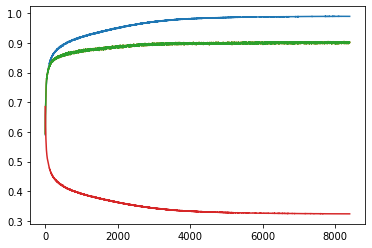

epoch: 0
train_acc: 0.98921875
test_acc: 0.8994444444444445
f1: 0.8994344827363271

epoch: 1
train_acc: 0.9892534722222223
test_acc: 0.9010416666666666
f1: 0.9010224753717724

epoch: 2
train_acc: 0.9896180555555556
test_acc: 0.9002083333333334
f1: 0.9001943531663313

epoch: 3
train_acc: 0.9893576388888888
test_acc: 0.8995138888888888
f1: 0.8994984541129517

epoch: 4
train_acc: 0.9892881944444445
test_acc: 0.9018055555555555
f1: 0.9017973964708336

epoch: 5
train_acc: 0.9894618055555555
test_acc: 0.9002083333333334
f1: 0.9001988588610025

epoch: 6
train_acc: 0.9894444444444445
test_acc: 0.8998611111111111
f1: 0.8998360944355017

epoch: 7
train_acc: 0.9893229166666667
test_acc: 0.9009027777777778
f1: 0.9008782388939464

epoch: 8
train_acc: 0.9894097222222222
test_acc: 0.9025
f1: 0.9024851918118778

epoch: 9
train_acc: 0.9894791666666667
test_acc: 0.9011111111111111
f1: 0.9011058458277709

epoch: 10
train_acc: 0.9892534722222223
test_acc: 0.8966666666666666
f1: 0.8966666367668455

epoch: 

epoch: 91
train_acc: 0.9893923611111111
test_acc: 0.9002777777777777
f1: 0.9002718390032601

epoch: 92
train_acc: 0.9896180555555556
test_acc: 0.9002777777777777
f1: 0.9002642965808468

epoch: 93
train_acc: 0.9894444444444445
test_acc: 0.9034722222222222
f1: 0.9034575616940954

epoch: 94
train_acc: 0.98953125
test_acc: 0.9004166666666666
f1: 0.9004032042457759

epoch: 95
train_acc: 0.9894270833333333
test_acc: 0.9025
f1: 0.9024892273010586

epoch: 96
train_acc: 0.9894270833333333
test_acc: 0.9011805555555555
f1: 0.9011689005947255

epoch: 97
train_acc: 0.9895486111111111
test_acc: 0.9013888888888889
f1: 0.9013836383956704

epoch: 98
train_acc: 0.9895486111111111
test_acc: 0.9004861111111111
f1: 0.9004794086129495

epoch: 99
train_acc: 0.9895659722222222
test_acc: 0.9002777777777777
f1: 0.9002586312684854

epoch: 100
train_acc: 0.9895659722222222
test_acc: 0.9019444444444444
f1: 0.9019263672813647

epoch: 101
train_acc: 0.9896354166666667
test_acc: 0.9003472222222222
f1: 0.9003322577360

epoch: 181
train_acc: 0.9893055555555555
test_acc: 0.8978472222222222
f1: 0.8978393723173597

epoch: 182
train_acc: 0.989375
test_acc: 0.8988194444444444
f1: 0.8988092797706172

epoch: 183
train_acc: 0.9896180555555556
test_acc: 0.9029166666666667
f1: 0.9028945025416576

epoch: 184
train_acc: 0.9893229166666667
test_acc: 0.8972222222222223
f1: 0.8971996149600571

epoch: 185
train_acc: 0.9896180555555556
test_acc: 0.8999305555555556
f1: 0.8999070738092958

epoch: 186
train_acc: 0.9894097222222222
test_acc: 0.8991666666666667
f1: 0.8991580295660345

epoch: 187
train_acc: 0.98953125
test_acc: 0.9010416666666666
f1: 0.9010384724239021

epoch: 188
train_acc: 0.9893576388888888
test_acc: 0.901875
f1: 0.9018711738869218

epoch: 189
train_acc: 0.9894791666666667
test_acc: 0.9022916666666667
f1: 0.9022779783611887

epoch: 190
train_acc: 0.9894618055555555
test_acc: 0.9022222222222223
f1: 0.902206692596196

epoch: 191
train_acc: 0.98953125
test_acc: 0.9034027777777778
f1: 0.9033851516867056

epo

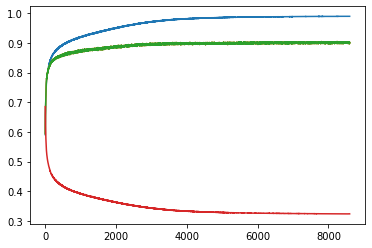

epoch: 0
train_acc: 0.9895833333333334
test_acc: 0.900625
f1: 0.9006120446470994

epoch: 1
train_acc: 0.9896701388888889
test_acc: 0.8997222222222222
f1: 0.8997143930626261

epoch: 2
train_acc: 0.9896006944444444
test_acc: 0.900625
f1: 0.9006104147237864

epoch: 3
train_acc: 0.9894791666666667
test_acc: 0.8997916666666667
f1: 0.8997650655204829

epoch: 4
train_acc: 0.9896006944444444
test_acc: 0.9019444444444444
f1: 0.9019195148330954

epoch: 5
train_acc: 0.9894791666666667
test_acc: 0.8998611111111111
f1: 0.8998485300564789

epoch: 6
train_acc: 0.989375
test_acc: 0.9000694444444445
f1: 0.9000687287854944

epoch: 7
train_acc: 0.9894444444444445
test_acc: 0.898125
f1: 0.8981224780890079

epoch: 8
train_acc: 0.9895659722222222
test_acc: 0.9027083333333333
f1: 0.9026930512913549

epoch: 9
train_acc: 0.9895138888888889
test_acc: 0.8991666666666667
f1: 0.8991423561581575

epoch: 10
train_acc: 0.9893576388888888
test_acc: 0.8992361111111111
f1: 0.8992161768515656

epoch: 11
train_acc: 0.9896

epoch: 92
train_acc: 0.9896006944444444
test_acc: 0.8977083333333333
f1: 0.8977021305306231

epoch: 93
train_acc: 0.9894965277777777
test_acc: 0.9002777777777777
f1: 0.9002528651937451

epoch: 94
train_acc: 0.9896006944444444
test_acc: 0.8974305555555555
f1: 0.8973937725487394

epoch: 95
train_acc: 0.98953125
test_acc: 0.9002777777777777
f1: 0.9002655588673173

epoch: 96
train_acc: 0.9894270833333333
test_acc: 0.9010416666666666
f1: 0.9010352268744939

epoch: 97
train_acc: 0.9895833333333334
test_acc: 0.898125
f1: 0.8981176628226926

epoch: 98
train_acc: 0.9896354166666667
test_acc: 0.9009722222222222
f1: 0.9009654383084128

epoch: 99
train_acc: 0.9895659722222222
test_acc: 0.8990277777777778
f1: 0.89900760403076

epoch: 100
train_acc: 0.9894791666666667
test_acc: 0.899375
f1: 0.8993542970231526

epoch: 101
train_acc: 0.9896180555555556
test_acc: 0.8989583333333333
f1: 0.898943503440328

epoch: 102
train_acc: 0.9895659722222222
test_acc: 0.899375
f1: 0.899367752849408

epoch: 103
train

epoch: 183
train_acc: 0.9896527777777778
test_acc: 0.9001388888888889
f1: 0.9001237220979202

epoch: 184
train_acc: 0.9896875
test_acc: 0.9005555555555556
f1: 0.9005485109457124

epoch: 185
train_acc: 0.9893576388888888
test_acc: 0.9014583333333334
f1: 0.9014514681737436

epoch: 186
train_acc: 0.9897222222222222
test_acc: 0.9039583333333333
f1: 0.9039439111142683

epoch: 187
train_acc: 0.9896006944444444
test_acc: 0.9002777777777777
f1: 0.900247804869188

epoch: 188
train_acc: 0.9895833333333334
test_acc: 0.8979861111111112
f1: 0.8979642994317067

epoch: 189
train_acc: 0.9894965277777777
test_acc: 0.8983333333333333
f1: 0.8983223964723615

epoch: 190
train_acc: 0.9897569444444444
test_acc: 0.9035416666666667
f1: 0.9035317046657181

epoch: 191
train_acc: 0.9896006944444444
test_acc: 0.9010416666666666
f1: 0.9010311638832299

epoch: 192
train_acc: 0.9894791666666667
test_acc: 0.9029166666666667
f1: 0.9029118870998238

epoch: 193
train_acc: 0.9894791666666667
test_acc: 0.9029166666666667


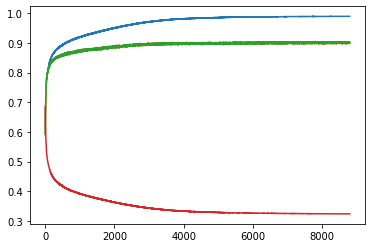

epoch: 0
train_acc: 0.9897222222222222
test_acc: 0.9005555555555556
f1: 0.9005451436475207

epoch: 1
train_acc: 0.98953125
test_acc: 0.9004166666666666
f1: 0.9004056637818505

epoch: 2
train_acc: 0.9896180555555556
test_acc: 0.9023611111111111
f1: 0.9023459445718284

epoch: 3
train_acc: 0.9895833333333334
test_acc: 0.9031944444444444
f1: 0.9031762296983282

epoch: 4
train_acc: 0.98953125
test_acc: 0.9011805555555555
f1: 0.9011524996439583

epoch: 5
train_acc: 0.9897395833333333
test_acc: 0.9034722222222222
f1: 0.9034585395847904

epoch: 6
train_acc: 0.9895659722222222
test_acc: 0.9016666666666666
f1: 0.9016603780561463

epoch: 7
train_acc: 0.9897048611111111
test_acc: 0.905
f1: 0.9049956895540595

epoch: 8
train_acc: 0.9894097222222222
test_acc: 0.9004166666666666
f1: 0.9004150318739448

epoch: 9
train_acc: 0.9896527777777778
test_acc: 0.9009027777777778
f1: 0.9008861565430996

epoch: 10
train_acc: 0.9897222222222222
test_acc: 0.9018055555555555
f1: 0.9017874527874288

epoch: 11
train_

epoch: 92
train_acc: 0.9896875
test_acc: 0.8998611111111111
f1: 0.8998441339969094

epoch: 93
train_acc: 0.9895486111111111
test_acc: 0.9002083333333334
f1: 0.9001991284186783

epoch: 94
train_acc: 0.98953125
test_acc: 0.8991666666666667
f1: 0.8991561093409218

epoch: 95
train_acc: 0.9896180555555556
test_acc: 0.9009722222222222
f1: 0.9009624118660241

epoch: 96
train_acc: 0.9896875
test_acc: 0.8988888888888888
f1: 0.8988748902041244

epoch: 97
train_acc: 0.9893576388888888
test_acc: 0.9004166666666666
f1: 0.9004076140247931

epoch: 98
train_acc: 0.9896180555555556
test_acc: 0.9004861111111111
f1: 0.9004766630117025

epoch: 99
train_acc: 0.9895659722222222
test_acc: 0.9004166666666666
f1: 0.9004015420642683

epoch: 100
train_acc: 0.9896527777777778
test_acc: 0.9019444444444444
f1: 0.9019305452472834

epoch: 101
train_acc: 0.9896180555555556
test_acc: 0.9003472222222222
f1: 0.9003335884084469

epoch: 102
train_acc: 0.9895833333333334
test_acc: 0.9022222222222223
f1: 0.9022188269967581



epoch: 182
train_acc: 0.9897222222222222
test_acc: 0.9020833333333333
f1: 0.9020736330512579

epoch: 183
train_acc: 0.9896527777777778
test_acc: 0.9005555555555556
f1: 0.9005364623791582

epoch: 184
train_acc: 0.9894965277777777
test_acc: 0.8989583333333333
f1: 0.8989391279986407

epoch: 185
train_acc: 0.9895659722222222
test_acc: 0.901875
f1: 0.9018555877954944

epoch: 186
train_acc: 0.9897048611111111
test_acc: 0.8998611111111111
f1: 0.8998472470290846

epoch: 187
train_acc: 0.9894965277777777
test_acc: 0.8995833333333333
f1: 0.8995783896611912

epoch: 188
train_acc: 0.9897048611111111
test_acc: 0.8990277777777778
f1: 0.8990141275964841

epoch: 189
train_acc: 0.9897569444444444
test_acc: 0.9034027777777778
f1: 0.9033910904170984

epoch: 190
train_acc: 0.9896527777777778
test_acc: 0.903125
f1: 0.903112370567927

epoch: 191
train_acc: 0.9897222222222222
test_acc: 0.9040277777777778
f1: 0.9040138535079869

epoch: 192
train_acc: 0.9895486111111111
test_acc: 0.9015972222222223
f1: 0.90158

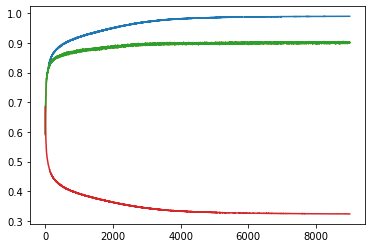

epoch: 0
train_acc: 0.9895659722222222
test_acc: 0.8998611111111111
f1: 0.8998441339969094

epoch: 1
train_acc: 0.9897048611111111
test_acc: 0.9020138888888889
f1: 0.9020065973737089

epoch: 2
train_acc: 0.9895833333333334
test_acc: 0.8990277777777778
f1: 0.8990163233509046

epoch: 3
train_acc: 0.9896354166666667
test_acc: 0.9034027777777778
f1: 0.9033876048153281

epoch: 4
train_acc: 0.9895833333333334
test_acc: 0.9003472222222222
f1: 0.900340510369562

epoch: 5
train_acc: 0.9896354166666667
test_acc: 0.9016666666666666
f1: 0.9016587445781614

epoch: 6
train_acc: 0.9897222222222222
test_acc: 0.901875
f1: 0.9018637223055206

epoch: 7
train_acc: 0.9896180555555556
test_acc: 0.9019444444444444
f1: 0.9019330276280039

epoch: 8
train_acc: 0.9896006944444444
test_acc: 0.9017361111111111
f1: 0.9017251094402086

epoch: 9
train_acc: 0.9896180555555556
test_acc: 0.9008333333333334
f1: 0.9008131279999126

epoch: 10
train_acc: 0.9896180555555556
test_acc: 0.9005555555555556
f1: 0.9005397612199949

epoch: 90
train_acc: 0.9896006944444444
test_acc: 0.8994444444444445
f1: 0.899427396690378

epoch: 91
train_acc: 0.9895659722222222
test_acc: 0.9025694444444444
f1: 0.902556742585521

epoch: 92
train_acc: 0.9896701388888889
test_acc: 0.8976388888888889
f1: 0.8976240376778384

epoch: 93
train_acc: 0.9898611111111111
test_acc: 0.9001388888888889
f1: 0.9001278553126226

epoch: 94
train_acc: 0.9896527777777778
test_acc: 0.9015972222222223
f1: 0.9015843936163103

epoch: 95
train_acc: 0.9896006944444444
test_acc: 0.9003472222222222
f1: 0.9003357689373123

epoch: 96
train_acc: 0.9896006944444444
test_acc: 0.90125
f1: 0.9012325342101742

epoch: 97
train_acc: 0.9896701388888889
test_acc: 0.8997222222222222
f1: 0.8996993288055463

epoch: 98
train_acc: 0.9897048611111111
test_acc: 0.9020138888888889
f1: 0.9019963762067134

epoch: 99
train_acc: 0.9897395833333333
test_acc: 0.9002777777777777
f1: 0.9002711752425286

epoch: 100
train_acc: 0.9897395833333333
test_acc: 0.9002777777777777
f1: 0.9002732

epoch: 180
train_acc: 0.9896875
test_acc: 0.899375
f1: 0.8993581225164341

epoch: 181
train_acc: 0.9896354166666667
test_acc: 0.9019444444444444
f1: 0.9019278205295674

epoch: 182
train_acc: 0.9896875
test_acc: 0.9011111111111111
f1: 0.9010986871015438

epoch: 183
train_acc: 0.9897395833333333
test_acc: 0.9000694444444445
f1: 0.9000504503024359

epoch: 184
train_acc: 0.9897569444444444
test_acc: 0.9042361111111111
f1: 0.9042233197895858

epoch: 185
train_acc: 0.9897222222222222
test_acc: 0.9010416666666666
f1: 0.9010299953250062

epoch: 186
train_acc: 0.9897916666666666
test_acc: 0.9026388888888889
f1: 0.9026295122740357

epoch: 187
train_acc: 0.9897395833333333
test_acc: 0.9020138888888889
f1: 0.9020043173773316

epoch: 188
train_acc: 0.9897743055555556
test_acc: 0.9015972222222223
f1: 0.9015878796145028

epoch: 189
train_acc: 0.9897743055555556
test_acc: 0.9039583333333333
f1: 0.9039509530352879

epoch: 190
train_acc: 0.9896875
test_acc: 0.899375
f1: 0.8993657182175817

epoch: 191
tr

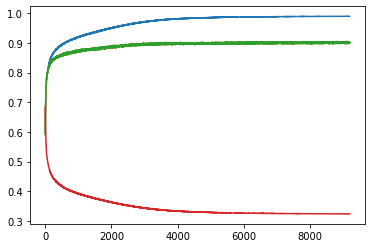

epoch: 0
train_acc: 0.9897743055555556
test_acc: 0.9017361111111111
f1: 0.9017327800466688

epoch: 1
train_acc: 0.9897222222222222
test_acc: 0.903125
f1: 0.9031147183277933

epoch: 2
train_acc: 0.9896006944444444
test_acc: 0.9008333333333334
f1: 0.9008106935833242

epoch: 3
train_acc: 0.9897569444444444
test_acc: 0.8997222222222222
f1: 0.8997025800712567

epoch: 4
train_acc: 0.9897569444444444
test_acc: 0.8991666666666667
f1: 0.8991440687109447

epoch: 5
train_acc: 0.9897395833333333
test_acc: 0.9020833333333333
f1: 0.9020571179906496

epoch: 6
train_acc: 0.9896875
test_acc: 0.9009027777777778
f1: 0.9008973995959508

epoch: 7
train_acc: 0.9897048611111111
test_acc: 0.9011111111111111
f1: 0.9011081523301965

epoch: 8
train_acc: 0.9897743055555556
test_acc: 0.9020138888888889
f1: 0.9020061171849884

epoch: 9
train_acc: 0.9897048611111111
test_acc: 0.8992361111111111
f1: 0.8992169585745897

epoch: 10
train_acc: 0.9896180555555556
test_acc: 0.9015972222222223
f1: 0.9015711003759697

epoch:

epoch: 90
train_acc: 0.9896875
test_acc: 0.8994444444444445
f1: 0.8994365935974256

epoch: 91
train_acc: 0.9899479166666667
test_acc: 0.9002777777777777
f1: 0.9002687125101831

epoch: 92
train_acc: 0.9899826388888889
test_acc: 0.9008333333333334
f1: 0.9008135203273213

epoch: 93
train_acc: 0.9897743055555556
test_acc: 0.8980555555555556
f1: 0.898040764797196

epoch: 94
train_acc: 0.9896354166666667
test_acc: 0.9011111111111111
f1: 0.9010932524467724

epoch: 95
train_acc: 0.9898611111111111
test_acc: 0.9036805555555556
f1: 0.9036716709232477

epoch: 96
train_acc: 0.9898611111111111
test_acc: 0.9003472222222222
f1: 0.9003416062515801

epoch: 97
train_acc: 0.9897743055555556
test_acc: 0.9022222222222223
f1: 0.902219296686037

epoch: 98
train_acc: 0.9898958333333333
test_acc: 0.9013194444444445
f1: 0.9013086855378589

epoch: 99
train_acc: 0.9897222222222222
test_acc: 0.8999305555555556
f1: 0.8999026121874557

epoch: 100
train_acc: 0.9897916666666666
test_acc: 0.9024305555555555
f1: 0.90240

epoch: 180
train_acc: 0.9897395833333333
test_acc: 0.8995138888888888
f1: 0.8994955531924249

epoch: 181
train_acc: 0.9898090277777778
test_acc: 0.9011805555555555
f1: 0.9011663836124598

epoch: 182
train_acc: 0.9898784722222222
test_acc: 0.89875
f1: 0.898744609000625

epoch: 183
train_acc: 0.9897048611111111
test_acc: 0.9013888888888889
f1: 0.9013879758071931

epoch: 184
train_acc: 0.9898263888888889
test_acc: 0.9014583333333334
f1: 0.9014556087869552

epoch: 185
train_acc: 0.9898090277777778
test_acc: 0.8994444444444445
f1: 0.8994353034225246

epoch: 186
train_acc: 0.9896701388888889
test_acc: 0.8981944444444444
f1: 0.8981707719366713

epoch: 187
train_acc: 0.9897569444444444
test_acc: 0.9007638888888889
f1: 0.9007422651085117

epoch: 188
train_acc: 0.9898611111111111
test_acc: 0.9000694444444445
f1: 0.9000433683718327

epoch: 189
train_acc: 0.9897569444444444
test_acc: 0.9014583333333334
f1: 0.901441805280069

epoch: 190
train_acc: 0.9898090277777778
test_acc: 0.9032638888888889
f1:

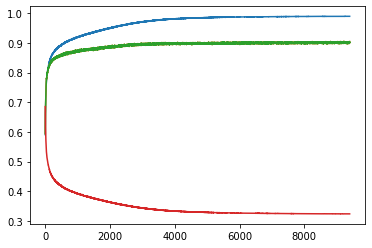

epoch: 0
train_acc: 0.9897222222222222
test_acc: 0.901875
f1: 0.9018715108448211

epoch: 1
train_acc: 0.9898958333333333
test_acc: 0.9017361111111111
f1: 0.9017162845721984

epoch: 2
train_acc: 0.98984375
test_acc: 0.9005555555555556
f1: 0.9005222127423087

epoch: 3
train_acc: 0.98984375
test_acc: 0.9004166666666666
f1: 0.9003837828657579

epoch: 4
train_acc: 0.98984375
test_acc: 0.9049305555555556
f1: 0.9049175488022047

epoch: 5
train_acc: 0.98984375
test_acc: 0.9045833333333333
f1: 0.9045790039819281

epoch: 6
train_acc: 0.9898611111111111
test_acc: 0.9009722222222222
f1: 0.9009707092600154

epoch: 7
train_acc: 0.9899131944444445
test_acc: 0.9011111111111111
f1: 0.901107341538631

epoch: 8
train_acc: 0.9898263888888889
test_acc: 0.9001388888888889
f1: 0.9001335718401227

epoch: 9
train_acc: 0.9898090277777778
test_acc: 0.9000694444444445
f1: 0.9000515842391642

epoch: 10
train_acc: 0.9897743055555556
test_acc: 0.9002083333333334
f1: 0.9001790575572909

epoch: 11
train_acc: 0.9897569

epoch: 92
train_acc: 0.9899652777777778
test_acc: 0.9002083333333334
f1: 0.9002009074599715

epoch: 93
train_acc: 0.9899826388888889
test_acc: 0.9008333333333334
f1: 0.9008192766381876

epoch: 94
train_acc: 0.9899305555555555
test_acc: 0.9030555555555555
f1: 0.9030442681081398

epoch: 95
train_acc: 0.9899479166666667
test_acc: 0.9008333333333334
f1: 0.9008243185686223

epoch: 96
train_acc: 0.9899305555555555
test_acc: 0.8995833333333333
f1: 0.8995719419294417

epoch: 97
train_acc: 0.9897916666666666
test_acc: 0.9023611111111111
f1: 0.902344557836099

epoch: 98
train_acc: 0.9899479166666667
test_acc: 0.9021527777777778
f1: 0.9021461875335978

epoch: 99
train_acc: 0.9898784722222222
test_acc: 0.9004166666666666
f1: 0.9004107361634227

epoch: 100
train_acc: 0.9899652777777778
test_acc: 0.9009722222222222
f1: 0.9009661089134067

epoch: 101
train_acc: 0.9899479166666667
test_acc: 0.9015972222222223
f1: 0.9015914678646201

epoch: 102
train_acc: 0.9900868055555555
test_acc: 0.9009027777777778

epoch: 182
train_acc: 0.9898958333333333
test_acc: 0.9013888888888889
f1: 0.9013764997782248

epoch: 183
train_acc: 0.9899826388888889
test_acc: 0.9004861111111111
f1: 0.9004627597284669

epoch: 184
train_acc: 0.9899826388888889
test_acc: 0.9003472222222222
f1: 0.9003198568383205

epoch: 185
train_acc: 0.9900347222222222
test_acc: 0.9009027777777778
f1: 0.9008831732372048

epoch: 186
train_acc: 0.9901215277777777
test_acc: 0.8998611111111111
f1: 0.8998509105205031

epoch: 187
train_acc: 0.9899479166666667
test_acc: 0.8997222222222222
f1: 0.8997196687575197

epoch: 188
train_acc: 0.9899826388888889
test_acc: 0.9010416666666666
f1: 0.9010372696889459

epoch: 189
train_acc: 0.99
test_acc: 0.8997916666666667
f1: 0.8997722329554159

epoch: 190
train_acc: 0.9900347222222222
test_acc: 0.9017361111111111
f1: 0.9017104699417255

epoch: 191
train_acc: 0.9901388888888889
test_acc: 0.9021527777777778
f1: 0.9021341796220514

epoch: 192
train_acc: 0.9900173611111112
test_acc: 0.8984027777777778
f1: 

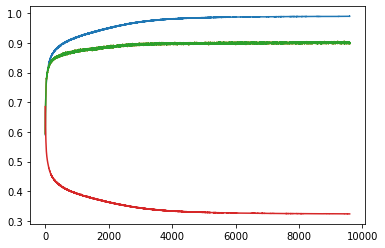

epoch: 0
train_acc: 0.9900868055555555
test_acc: 0.899375
f1: 0.8993598895188539

epoch: 1
train_acc: 0.9901909722222222
test_acc: 0.90125
f1: 0.9012425320873308

epoch: 2
train_acc: 0.9900173611111112
test_acc: 0.9007638888888889
f1: 0.9007361782205928

epoch: 3
train_acc: 0.9899652777777778
test_acc: 0.9014583333333334
f1: 0.9014410864719601

epoch: 4
train_acc: 0.9899479166666667
test_acc: 0.901875
f1: 0.9018563490461029

epoch: 5
train_acc: 0.9898784722222222
test_acc: 0.9011805555555555
f1: 0.9011768739425803

epoch: 6
train_acc: 0.9900347222222222
test_acc: 0.900625
f1: 0.9006191887891822

epoch: 7
train_acc: 0.9901215277777777
test_acc: 0.9004166666666666
f1: 0.9004044647741875

epoch: 8
train_acc: 0.9900347222222222
test_acc: 0.9016666666666666
f1: 0.9016446289908385

epoch: 9
train_acc: 0.9900173611111112
test_acc: 0.899375
f1: 0.8993505217189964

epoch: 10
train_acc: 0.9899131944444445
test_acc: 0.9022222222222223
f1: 0.9021994862802409

epoch: 11
train_acc: 0.990052083333333

epoch: 92
train_acc: 0.9899826388888889
test_acc: 0.899375
f1: 0.8993473676367431

epoch: 93
train_acc: 0.9900173611111112
test_acc: 0.9004861111111111
f1: 0.9004704800146407

epoch: 94
train_acc: 0.9900694444444444
test_acc: 0.9025
f1: 0.9024823921595988

epoch: 95
train_acc: 0.9898784722222222
test_acc: 0.8994444444444445
f1: 0.8994239561231607

epoch: 96
train_acc: 0.9900347222222222
test_acc: 0.8992361111111111
f1: 0.8992268165173991

epoch: 97
train_acc: 0.9898958333333333
test_acc: 0.9002083333333334
f1: 0.9002024977568519

epoch: 98
train_acc: 0.9900520833333334
test_acc: 0.9018055555555555
f1: 0.9017783636757322

epoch: 99
train_acc: 0.9899652777777778
test_acc: 0.9014583333333334
f1: 0.9014368608740225

epoch: 100
train_acc: 0.9900520833333334
test_acc: 0.8985416666666667
f1: 0.8985219905390593

epoch: 101
train_acc: 0.99
test_acc: 0.9
f1: 0.8999823131242272

epoch: 102
train_acc: 0.9900694444444444
test_acc: 0.9
f1: 0.8999931494839513

epoch: 103
train_acc: 0.9897743055555556

epoch: 182
train_acc: 0.9901041666666667
test_acc: 0.90125
f1: 0.9012427702416881

epoch: 183
train_acc: 0.9901041666666667
test_acc: 0.9016666666666666
f1: 0.9016648171718156

epoch: 184
train_acc: 0.9900694444444444
test_acc: 0.9034027777777778
f1: 0.9033988397887467

epoch: 185
train_acc: 0.9900520833333334
test_acc: 0.9019444444444444
f1: 0.9019336103626031

epoch: 186
train_acc: 0.9901215277777777
test_acc: 0.9026388888888889
f1: 0.9026213061308813

epoch: 187
train_acc: 0.9900694444444444
test_acc: 0.9002777777777777
f1: 0.9002676196306814

epoch: 188
train_acc: 0.9899652777777778
test_acc: 0.8988888888888888
f1: 0.8988713781729394

epoch: 189
train_acc: 0.9900520833333334
test_acc: 0.8989583333333333
f1: 0.8989467204207592

epoch: 190
train_acc: 0.9899479166666667
test_acc: 0.9003472222222222
f1: 0.9003312193239437

epoch: 191
train_acc: 0.9900347222222222
test_acc: 0.8990972222222222
f1: 0.8990887091230169

epoch: 192
train_acc: 0.9900347222222222
test_acc: 0.9025
f1: 0.9024889

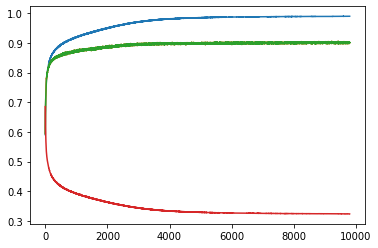

epoch: 0
train_acc: 0.9900694444444444
test_acc: 0.9016666666666666
f1: 0.9016407857906826

epoch: 1
train_acc: 0.9901388888888889
test_acc: 0.9016666666666666
f1: 0.9016527280950095

epoch: 2
train_acc: 0.9900347222222222
test_acc: 0.9022222222222223
f1: 0.9022175989900807

epoch: 3
train_acc: 0.9900694444444444
test_acc: 0.8989583333333333
f1: 0.8989566156368776

epoch: 4
train_acc: 0.9901388888888889
test_acc: 0.8996527777777777
f1: 0.8996479357735637

epoch: 5
train_acc: 0.9901388888888889
test_acc: 0.901875
f1: 0.9018581858433663

epoch: 6
train_acc: 0.9900694444444444
test_acc: 0.8997222222222222
f1: 0.8997048558253602

epoch: 7
train_acc: 0.9899652777777778
test_acc: 0.9005555555555556
f1: 0.9005340902953334

epoch: 8
train_acc: 0.9902083333333334
test_acc: 0.9013194444444445
f1: 0.9012999223336147

epoch: 9
train_acc: 0.9900173611111112
test_acc: 0.9004166666666666
f1: 0.9003947620626498

epoch: 10
train_acc: 0.9901041666666667
test_acc: 0.9011805555555555
f1: 0.901167356099043

epoch: 91
train_acc: 0.9901388888888889
test_acc: 0.9005555555555556
f1: 0.9005448577516539

epoch: 92
train_acc: 0.9902256944444444
test_acc: 0.9002777777777777
f1: 0.9002709462909402

epoch: 93
train_acc: 0.9901041666666667
test_acc: 0.9019444444444444
f1: 0.9019344560713942

epoch: 94
train_acc: 0.99015625
test_acc: 0.9014583333333334
f1: 0.9014368608740225

epoch: 95
train_acc: 0.9901041666666667
test_acc: 0.9009027777777778
f1: 0.9008936369195923

epoch: 96
train_acc: 0.9901388888888889
test_acc: 0.8999305555555556
f1: 0.8999196452217134

epoch: 97
train_acc: 0.9902083333333334
test_acc: 0.9008333333333334
f1: 0.9008245806957257

epoch: 98
train_acc: 0.9902604166666666
test_acc: 0.9009027777777778
f1: 0.9008954035806399

epoch: 99
train_acc: 0.99015625
test_acc: 0.9004861111111111
f1: 0.9004755493646796

epoch: 100
train_acc: 0.9901736111111111
test_acc: 0.9006944444444445
f1: 0.9006834722510781

epoch: 101
train_acc: 0.9901909722222222
test_acc: 0.9
f1: 0.8999851536653516

epoch:

epoch: 182
train_acc: 0.9901215277777777
test_acc: 0.9025
f1: 0.9024900682182986

epoch: 183
train_acc: 0.9901736111111111
test_acc: 0.8997222222222222
f1: 0.899705221561399

epoch: 184
train_acc: 0.9902951388888889
test_acc: 0.9036111111111111
f1: 0.9035947697556937

epoch: 185
train_acc: 0.9901388888888889
test_acc: 0.9022222222222223
f1: 0.9022148278333063

epoch: 186
train_acc: 0.9901736111111111
test_acc: 0.8993055555555556
f1: 0.8992922674067513

epoch: 187
train_acc: 0.9902604166666666
test_acc: 0.9013194444444445
f1: 0.9013159355346716

epoch: 188
train_acc: 0.9902951388888889
test_acc: 0.9016666666666666
f1: 0.9016612279725299

epoch: 189
train_acc: 0.9901041666666667
test_acc: 0.9034722222222222
f1: 0.9034588580932229

epoch: 190
train_acc: 0.9901388888888889
test_acc: 0.8989583333333333
f1: 0.8989387380111781

epoch: 191
train_acc: 0.9901041666666667
test_acc: 0.9011111111111111
f1: 0.901097742570422

epoch: 192
train_acc: 0.9901736111111111
test_acc: 0.8994444444444445
f1: 

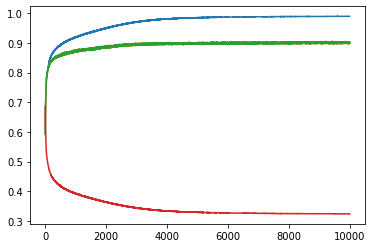

In [10]:
for i in range(50):
    for epoch in range(epochs):
        y_pred = net.forward(X_train)

        train_pred = y_pred.cpu().detach().numpy()
        train_pred = [np.argmax(sample) for sample in train_pred]
        train_accuracy = accuracy_score(y_train.cpu(), train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = net.predict(X_test)
        test_accuracy = accuracy_score(y_test.cpu(), test_pred)
        test_accuracies.append(test_accuracy)
        
        f1 = f1_score(y_test.cpu(), test_pred, average='weighted')
        f1s.append(f1)

        loss = criterion(y_pred, y_train)
        losses.append(loss)
        
        print("epoch:", epoch)
        print("train_acc:", train_accuracy)
        print("test_acc:", test_accuracy)
        print("f1:", f1)
        print()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.plot(f1s)
    plt.plot(losses)
    plt.show()
    
    torch.save(net.state_dict(), 'torch_has_chiral_dict.dict')

In [11]:
from sklearn.metrics import confusion_matrix
test_pred = net.predict(X_test)
confusion_matrix(y_test.cpu(), test_pred)

array([[6593,  621],
       [ 759, 6427]])

In [6]:
torch.save(net, 'torch_has_chiral.mdl')